# **Dengue-T-Cell-Epitope-Prediction**

## IMPORT THE NECESSARY LIBRARIES

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from featurewiz import featurewiz
from sklearn.metrics import roc_curve, roc_auc_score
import joblib

Imported 0.1.996 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



## **LOAD THE DATASET**

In [6]:
df = pd.read_csv('combined file.csv')
df.head()

Epitope Description  Class  Peptidecount         PI   Molecular Weight  \
0     ADVKKDLISYGGGWK      1            15   9.220135         1636.86804   
1    AGIFMATATPPGSRDP      1            16   6.338725         1588.79864   
2          AIIGPGLQAK      1            10   9.700016          967.17634   
3           AIKRGLRTL      1             9  12.516461         1027.27834   
4           ALSELPETL      1             9   3.613696          972.10324   

     Charge  Aliphatic Index  Instability index  BomanIndex  \
0  0.976213        78.000000          20.773333    1.119333   
1 -0.023315        43.125000          35.856250    0.913750   
2  0.975736       137.000000          41.600000   -0.917000   
3  2.975730       141.111111          47.644444    2.272222   
4 -2.021591       141.111111          71.000000    0.335556   

    kideraFactors    KF1(Helix/bend preference)  ...   ProtFP2   ProtFP3  \
0                                      0.196000  ... -0.972667  0.299333   
1                                      0.263125  ... -2.400000  0.362500   
2                                     -0.145000  ... -2.654000  0.073000   
3                                     -0.283333  ... -0.180000 -0.160000   
4                                     -0.494444  ... -1.240000 -1.373333   

    ProtFP4   ProtFP5   ProtFP6   ProtFP7   ProtFP8  PP1(Polarity)  \
0 -0.132000 -0.412000  0.776000  0.425333  0.324000      -0.124000   
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875      -0.416875   
2  0.803000 -0.733000  0.651000  0.150000  0.058000      -0.589000   
3  1.206667 -0.141111  0.760000  0.192222  0.231111      -0.220000   
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111      -0.197778   

   PP2(Hydrophobicity)  PP3(H-bonding)  
0            -0.339333        0.141333  
1            -0.461250        0.135000  
2            -0.419000        0.155000  
3            -0.114444        0.387778  
4            -0.401111       -0.168889  

[5 rows x 55 columns]

## **BUSINESS CASE** : The goal of the project "Dengue-T-Cell-Epitope-Prediction" likely revolves around predicting T-cell epitopes associated with the Dengue virus.

### BASIC CHECKS

In [7]:
df.shape

(2228, 55)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2228 entries, 0 to 2227
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Epitope Description                           2228 non-null   object 
 1   Class                                         2228 non-null   int64  
 2   Peptidecount                                  2228 non-null   int64  
 3   PI                                            2228 non-null   float64
 4    Molecular Weight                             2228 non-null   float64
 5   Charge                                        2228 non-null   float64
 6   Aliphatic Index                               2228 non-null   float64
 7   Instability index                             2228 non-null   float64
 8   BomanIndex                                    2228 non-null   float64
 9    kideraFactors    KF1(Helix/bend preference)  2228 non-null   f

In [9]:
df.isnull().sum()

Epitope Description                             0
Class                                           0
Peptidecount                                    0
PI                                              0
 Molecular Weight                               0
Charge                                          0
Aliphatic Index                                 0
Instability index                               0
BomanIndex                                      0
 kideraFactors    KF1(Helix/bend preference)    0
KF2(Side-chain size)                            0
KF3(Extended structure preference)              0
KF4(Hydrophobicity)                             0
KF5(Double-bend preference)                     0
KF6 (Partial specific volume)                   0
KF7(Flat extended preference)                   0
KF8(Occurrence in alpha region)                 0
KF9( pK-C)                                      0
KF10(Surrounding hydrophobicity)                0
BLOSUM1                                         0


In [10]:
df.nunique()

Epitope Description                             2090
Class                                              2
Peptidecount                                      13
PI                                               458
 Molecular Weight                               2005
Charge                                           464
Aliphatic Index                                  173
Instability index                               1021
BomanIndex                                      1876
 kideraFactors    KF1(Helix/bend preference)    1390
KF2(Side-chain size)                            1389
KF3(Extended structure preference)              1445
KF4(Hydrophobicity)                             1428
KF5(Double-bend preference)                     1362
KF6 (Partial specific volume)                   1400
KF7(Flat extended preference)                   1374
KF8(Occurrence in alpha region)                 1409
KF9( pK-C)                                      1350
KF10(Surrounding hydrophobicity)              

- Unique values before removing duplicate values.

### Removing Duplicate values

In [11]:
df.drop_duplicates(subset = 'Epitope Description', keep = False, inplace = True)
df.head()

Epitope Description  Class  Peptidecount         PI   Molecular Weight  \
0     ADVKKDLISYGGGWK      1            15   9.220135         1636.86804   
1    AGIFMATATPPGSRDP      1            16   6.338725         1588.79864   
3           AIKRGLRTL      1             9  12.516461         1027.27834   
4           ALSELPETL      1             9   3.613696          972.10324   
5     AVSLDFSPGTSGSPI      1            15   3.749972         1434.56574   

     Charge  Aliphatic Index  Instability index  BomanIndex  \
0  0.976213        78.000000          20.773333    1.119333   
1 -0.023315        43.125000          35.856250    0.913750   
3  2.975730       141.111111          47.644444    2.272222   
4 -2.021591       141.111111          71.000000    0.335556   
5 -1.023312        78.000000          57.233333    0.289333   

    kideraFactors    KF1(Helix/bend preference)  ...   ProtFP2   ProtFP3  \
0                                      0.196000  ... -0.972667  0.299333   
1                                      0.263125  ... -2.400000  0.362500   
3                                     -0.283333  ... -0.180000 -0.160000   
4                                     -0.494444  ... -1.240000 -1.373333   
5                                      0.456000  ... -2.874000  0.074000   

    ProtFP4   ProtFP5   ProtFP6   ProtFP7   ProtFP8  PP1(Polarity)  \
0 -0.132000 -0.412000  0.776000  0.425333  0.324000      -0.124000   
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875      -0.416875   
3  1.206667 -0.141111  0.760000  0.192222  0.231111      -0.220000   
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111      -0.197778   
5  0.257333 -0.294667 -0.455333  0.176667  0.305333      -0.332667   

   PP2(Hydrophobicity)  PP3(H-bonding)  
0            -0.339333        0.141333  
1            -0.461250        0.135000  
3            -0.114444        0.387778  
4            -0.401111       -0.168889  
5            -0.556000        0.110667  

[5 rows x 55 columns]

In [12]:
df.shape

(1952, 55)

- After removing duplicate values we got 1952 rows.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 2227
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Epitope Description                           1952 non-null   object 
 1   Class                                         1952 non-null   int64  
 2   Peptidecount                                  1952 non-null   int64  
 3   PI                                            1952 non-null   float64
 4    Molecular Weight                             1952 non-null   float64
 5   Charge                                        1952 non-null   float64
 6   Aliphatic Index                               1952 non-null   float64
 7   Instability index                             1952 non-null   float64
 8   BomanIndex                                    1952 non-null   float64
 9    kideraFactors    KF1(Helix/bend preference)  1952 non-null   f

In [14]:
df.nunique()

Epitope Description                             1952
Class                                              2
Peptidecount                                      13
PI                                               445
 Molecular Weight                               1881
Charge                                           451
Aliphatic Index                                  169
Instability index                                981
BomanIndex                                      1769
 kideraFactors    KF1(Helix/bend preference)    1320
KF2(Side-chain size)                            1327
KF3(Extended structure preference)              1385
KF4(Hydrophobicity)                             1365
KF5(Double-bend preference)                     1294
KF6 (Partial specific volume)                   1334
KF7(Flat extended preference)                   1305
KF8(Occurrence in alpha region)                 1356
KF9( pK-C)                                      1282
KF10(Surrounding hydrophobicity)              

- Unique values in the Data.

- In Class we have 2 unique values 0 and 1.
- 1 is for Positive Data.
- 0 is for Negative Data.

- We have to predict whether Epitope is belonging to Positive or Negative class.

### Data Description

In [15]:
df.describe()

Class  Peptidecount           PI   Molecular Weight       Charge  \
count  1952.000000   1952.000000  1952.000000        1952.000000  1952.000000   
mean      0.358607     13.159836     7.478476        1490.786709     0.261304   
std       0.479714      2.707520     2.925964         319.342700     1.843455   
min       0.000000      8.000000     3.141021         795.977240    -6.019540   
25%       0.000000     10.000000     4.258173        1150.435890    -1.022058   
50%       0.000000     15.000000     6.494317        1596.844190    -0.022371   
75%       1.000000     15.000000    10.397760        1738.362465     0.977146   
max       1.000000     25.000000    13.102061        2610.939240     5.976974   

       Aliphatic Index  Instability index   BomanIndex  \
count      1952.000000        1952.000000  1952.000000   
mean        111.081295          34.543884     0.538280   
std          50.583813          33.838330     1.776696   
min           0.000000         -47.530000    -3.428889   
25%          78.000000          10.388889    -0.834833   
50%         107.000000          30.288889     0.654167   
75%         142.833333          52.800000     1.814667   
max         279.333333         221.222222     6.900000   

        kideraFactors    KF1(Helix/bend preference)  KF2(Side-chain size)  \
count                                   1952.000000           1952.000000   
mean                                      -0.235561             -0.200540   
std                                        0.307135              0.286332   
min                                       -1.009000             -0.964444   
25%                                       -0.444667             -0.418333   
50%                                       -0.245167             -0.193667   
75%                                       -0.045833              0.004000   
max                                        1.000000              0.672222   

       ...      ProtFP2      ProtFP3      ProtFP4      ProtFP5      ProtFP6  \
count  ...  1952.000000  1952.000000  1952.000000  1952.000000  1952.000000   
mean   ...    -0.775870    -0.511945     0.393004    -0.298761     0.167201   
std    ...     1.165173     0.609645     0.494453     0.359706     0.384006   
min    ...    -4.477778    -2.147778    -1.742222    -1.606000    -1.212222   
25%    ...    -1.691167    -0.950750     0.082667    -0.518750    -0.092056   
50%    ...    -0.786667    -0.556167     0.451222    -0.306667     0.174222   
75%    ...     0.081667    -0.094611     0.749083    -0.068000     0.435667   
max    ...     2.513000     1.721000     1.642222     0.925556     1.472222   

           ProtFP7      ProtFP8  PP1(Polarity)  PP2(Hydrophobicity)  \
count  1952.000000  1952.000000    1952.000000          1952.000000   
mean      0.080074     0.087993      -0.254793            -0.256782   
std       0.346316     0.261503       0.264577             0.138798   
min      -1.222000    -1.011111      -0.908889            -0.661111   
25%      -0.161500    -0.076750      -0.459500            -0.351028   
50%       0.076333     0.095000      -0.228778            -0.252833   
75%       0.304889     0.258000      -0.071333            -0.161167   
max       1.288000     0.866667       0.631000             0.200000   

       PP3(H-bonding)  
count     1952.000000  
mean         0.026901  
std          0.164952  
min         -0.552222  
25%         -0.072833  
50%          0.028500  
75%          0.131500  
max          0.556667  

[8 rows x 54 columns]

In [16]:
df.corr()

Class  Peptidecount  \
Class                                         1.000000     -0.178327   
Peptidecount                                 -0.178327      1.000000   
PI                                            0.116313      0.004139   
 Molecular Weight                            -0.117731      0.937164   
Charge                                        0.131183     -0.012499   
Aliphatic Index                              -0.167752      0.103830   
Instability index                             0.074901     -0.045267   
BomanIndex                                    0.181362     -0.028503   
 kideraFactors    KF1(Helix/bend preference)  0.150102     -0.111591   
KF2(Side-chain size)                          0.173773     -0.052324   
KF3(Extended structure preference)           -0.065188      0.001508   
KF4(Hydrophobicity)                           0.131987     -0.002450   
KF5(Double-bend preference)                   0.013039     -0.119735   
KF6 (Partial specific volume)                 0.072396     -0.057019   
KF7(Flat extended preference)                 0.104398     -0.003390   
KF8(Occurrence in alpha region)               0.033899      0.127528   
KF9( pK-C)                                   -0.010533      0.034358   
KF10(Surrounding hydrophobicity)              0.082362     -0.086803   
BLOSUM1                                       0.131168     -0.015863   
BLOSUM2                                       0.169738     -0.013530   
BLOSUM3                                       0.022995     -0.002399   
BLOSUM4                                      -0.099817      0.063352   
BLOSUM5                                       0.109611     -0.012262   
BLOSUM6                                      -0.076242      0.161830   
BLOSUM7                                       0.044633     -0.044430   
BLOSUM8                                       0.051586      0.111383   
BLOSUM9                                      -0.094856      0.036540   
BLOSUM10                                     -0.163874      0.065001   
FasgaiVectors(F1)                            -0.100087      0.008555   
F2                                           -0.091710      0.083253   
F3                                            0.053822     -0.005744   
F4                                           -0.168743      0.116459   
F5                                            0.004129     -0.131591   
F6                                            0.066484     -0.032376   
AACOMP percentage(Tiny)                      -0.085928     -0.006299   
Small                                        -0.073953     -0.027307   
Aliphatic                                    -0.186079      0.110663   
Aromatic                                      0.075090     -0.032961   
NonPolar                                     -0.101725      0.008944   
Polar                                         0.101725     -0.008944   
Charged                                       0.171843      0.001875   
Basic                                         0.208469     -0.042157   
Acidic                                        0.023953      0.047854   
ProtFP1                                      -0.122226      0.024911   
ProtFP2                                       0.175838     -0.045401   
ProtFP3                                       0.201721     -0.118574   
ProtFP4                                      -0.029942     -0.041991   
ProtFP5                                       0.017668      0.002092   
ProtFP6                                       0.012070      0.166326   
ProtFP7                                      -0.034805      0.057052   
ProtFP8                                       0.010495     -0.095352   
PP1(Polarity)                                 0.140304     -0.021857   
PP2(Hydrophobicity)                           0.138798     -0.040248   
PP3(H-bonding)                                0.101744     -0.069546   

                                                    PI   Molecular Weight  \
Class      

### Multi-Collinearity Check

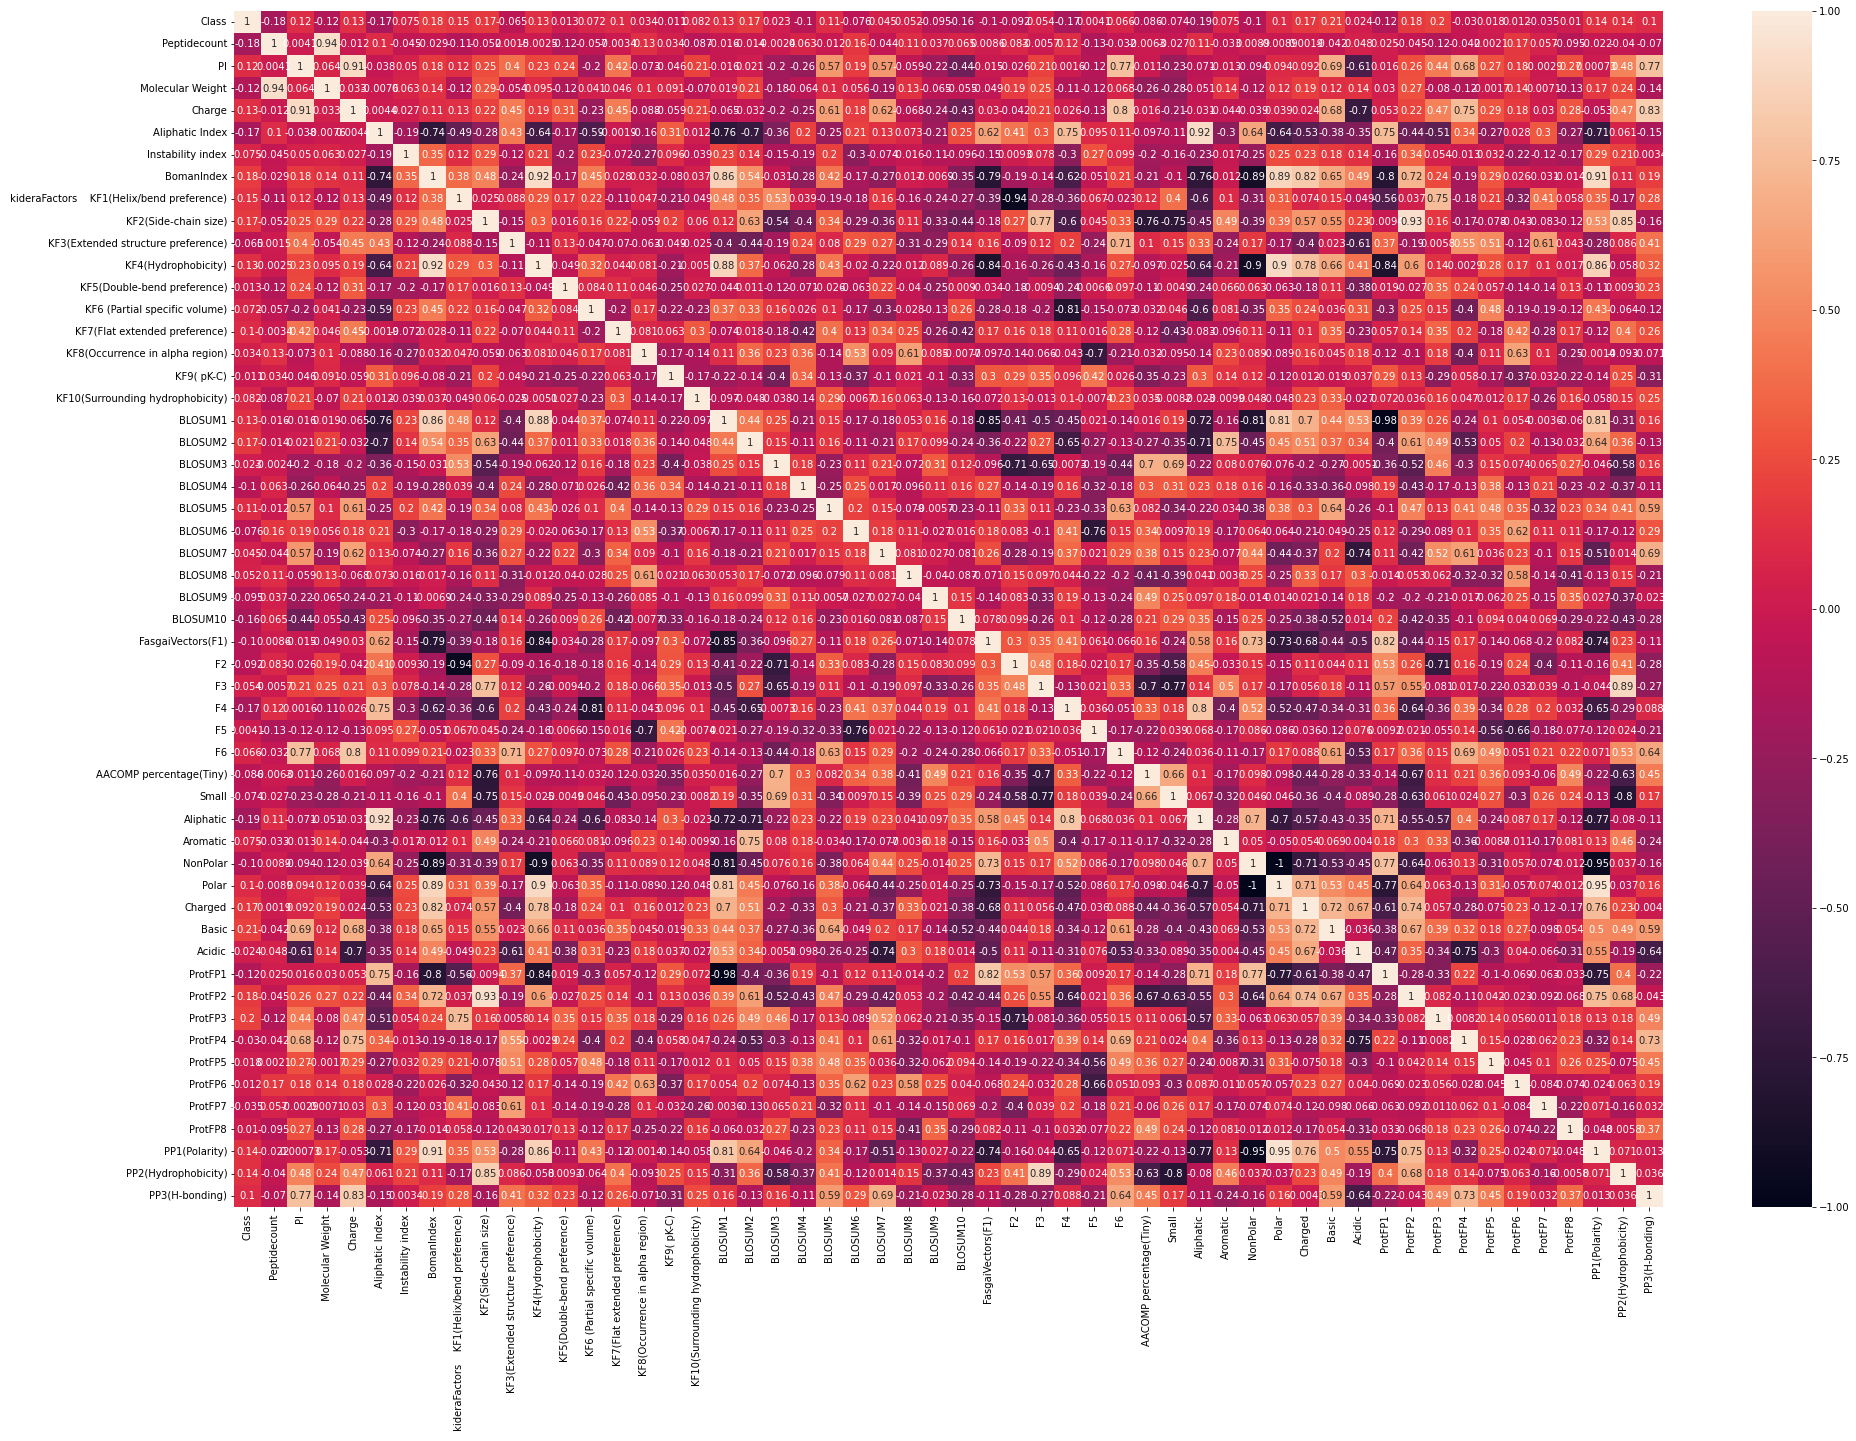

In [17]:
rcParams['figure.figsize']= 32,22
sns.heatmap(df.corr(), annot = True)
plt.show()

In [18]:
df = df.drop(['Peptidecount', 'PI', 'Charge', 'KF2(Side-chain size)', 'KF4(Hydrophobicity)', 'BLOSUM1' , 'Aliphatic', 'Polar', 'ProtFP2', 'PP1(Polarity)', 'PP2(Hydrophobicity)'], axis = 1)
df.head()

Epitope Description  Class   Molecular Weight  Aliphatic Index  \
0     ADVKKDLISYGGGWK      1         1636.86804        78.000000   
1    AGIFMATATPPGSRDP      1         1588.79864        43.125000   
3           AIKRGLRTL      1         1027.27834       141.111111   
4           ALSELPETL      1          972.10324       141.111111   
5     AVSLDFSPGTSGSPI      1         1434.56574        78.000000   

   Instability index  BomanIndex  \
0          20.773333    1.119333   
1          35.856250    0.913750   
3          47.644444    2.272222   
4          71.000000    0.335556   
5          57.233333    0.289333   

    kideraFactors    KF1(Helix/bend preference)  \
0                                      0.196000   
1                                      0.263125   
3                                     -0.283333   
4                                     -0.494444   
5                                      0.456000   

   KF3(Extended structure preference)  KF5(Double-bend preference)  \
0                           -0.112000                     0.012667   
1                           -0.215000                    -0.081250   
3                            0.425556                    -0.492222   
4                           -0.521111                    -0.514444   
5                           -0.015333                    -0.080000   

   KF6 (Partial specific volume)  ...   Basic  Acidic   ProtFP1   ProtFP3  \
0                      -0.602667  ...  20.000  13.333 -1.474000  0.299333   
1                      -0.160625  ...   6.250   6.250 -1.417500  0.362500   
3                      -0.605556  ...  33.333   0.000 -0.030000 -0.160000   
4                      -0.755556  ...   0.000  22.222 -0.378889 -1.373333   
5                      -0.460000  ...   0.000   6.667 -1.459333  0.074000   

    ProtFP4   ProtFP5   ProtFP6   ProtFP7   ProtFP8  PP3(H-bonding)  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000        0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875        0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111        0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111       -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333        0.110667  

[5 rows x 44 columns]

- Epitope Description is not useful for us so we'll drop that as well from our Dataset.

#### Checking Data collinearity again.

In [19]:
df.corr()

Class   Molecular Weight  \
Class                                         1.000000          -0.117731   
 Molecular Weight                            -0.117731           1.000000   
Aliphatic Index                              -0.167752          -0.007588   
Instability index                             0.074901           0.062563   
BomanIndex                                    0.181362           0.136710   
 kideraFactors    KF1(Helix/bend preference)  0.150102          -0.115601   
KF3(Extended structure preference)           -0.065188          -0.053756   
KF5(Double-bend preference)                   0.013039          -0.121570   
KF6 (Partial specific volume)                 0.072396           0.040878   
KF7(Flat extended preference)                 0.104398           0.046267   
KF8(Occurrence in alpha region)               0.033899           0.100637   
KF9( pK-C)                                   -0.010533           0.090762   
KF10(Surrounding hydrophobicity)              0.082362          -0.069593   
BLOSUM2                                       0.169738           0.206635   
BLOSUM3                                       0.022995          -0.182208   
BLOSUM4                                      -0.099817          -0.063986   
BLOSUM5                                       0.109611           0.103998   
BLOSUM6                                      -0.076242           0.056455   
BLOSUM7                                       0.044633          -0.190032   
BLOSUM8                                       0.051586           0.133707   
BLOSUM9                                      -0.094856          -0.065110   
BLOSUM10                                     -0.163874          -0.055271   
FasgaiVectors(F1)                            -0.100087          -0.049006   
F2                                           -0.091710           0.186471   
F3                                            0.053822           0.251155   
F4                                           -0.168743          -0.113500   
F5                                            0.004129          -0.120347   
F6                                            0.066484           0.067865   
AACOMP percentage(Tiny)                      -0.085928          -0.256333   
Small                                        -0.073953          -0.275003   
Aromatic                                      0.075090           0.143463   
NonPolar                                     -0.101725          -0.124361   
Charged                                       0.171843           0.188537   
Basic                                         0.208469           0.122742   
Acidic                                        0.023953           0.139795   
ProtFP1                                      -0.122226           0.030109   
ProtFP3                                       0.201721          -0.080034   
ProtFP4                                      -0.029942          -0.122771   
ProtFP5                                       0.017668          -0.001688   
ProtFP6                                       0.012070           0.135098   
ProtFP7                                      -0.034805           0.007117   
ProtFP8                                       0.010495          -0.129386   
PP3(H-bonding)                                0.101744          -0.143894   

                                              Aliphatic Index  \
Class                                               -0.167752   
 Molecular Weight                                   -0.007588   
Aliphatic Index                                      1.000000   
Instability index                                   -0.187167   
BomanIndex                                          -0.738860   
 kideraFactors    KF1(Helix/bend preference)        -0.488827   
KF3(Extended structure preference)                   0.434651   
KF5(Double-bend preference)                         -0.174714   
KF6 (Partial specific volume)                       -0.593493   
KF7(Flat e

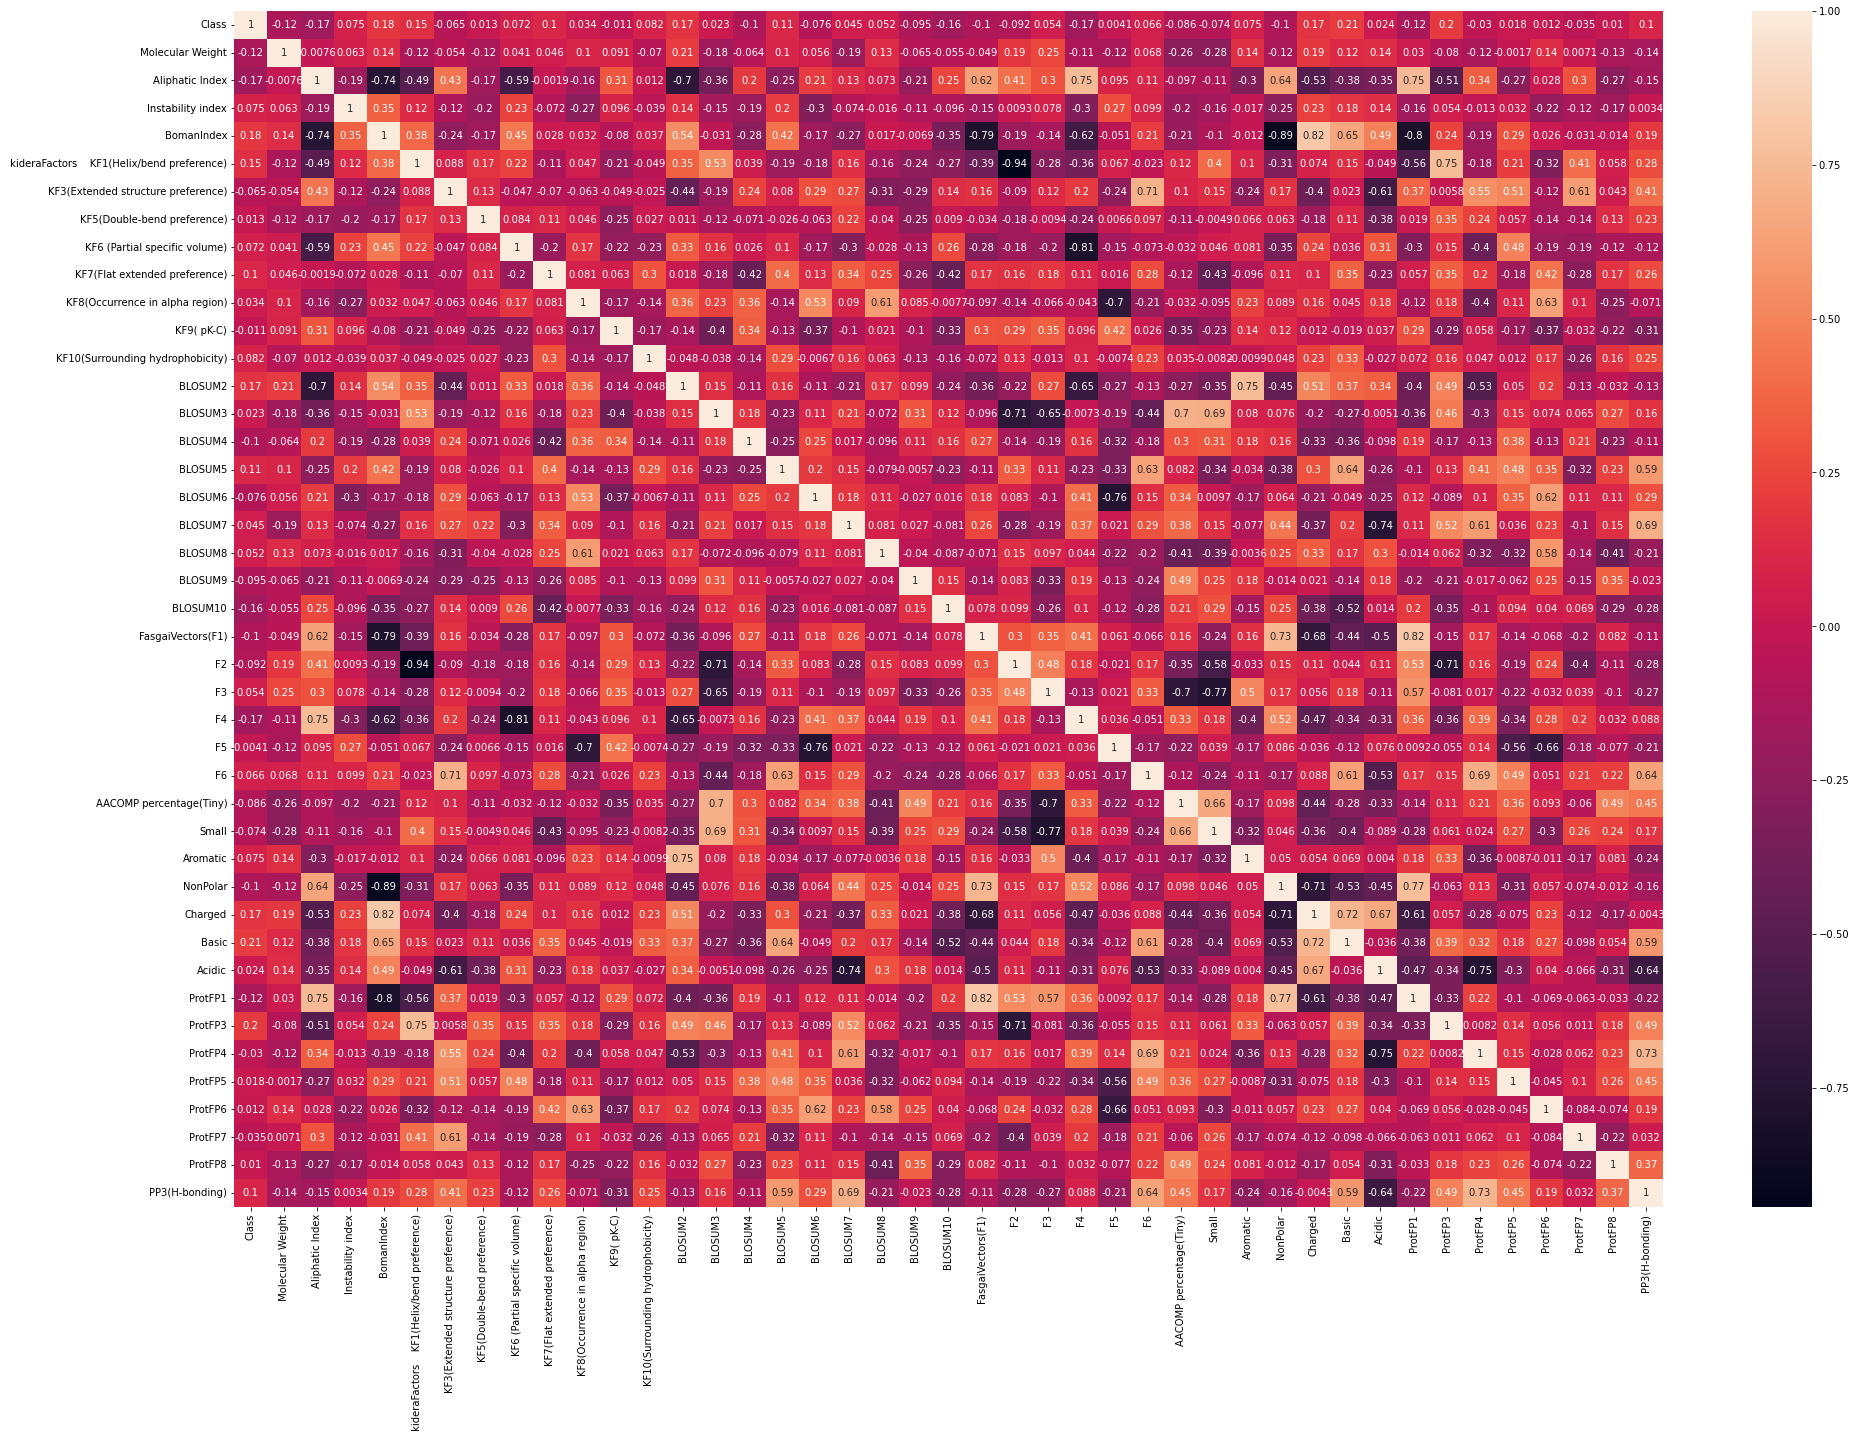

In [20]:
sns.heatmap(df.corr(), annot=True)
plt.show()

### Checking outliers in the Data

- Dropping unneccesary columns

In [21]:
df.drop('Epitope Description', axis = 1, inplace=True)
df

Class   Molecular Weight  Aliphatic Index  Instability index  \
0         1         1636.86804        78.000000          20.773333   
1         1         1588.79864        43.125000          35.856250   
3         1         1027.27834       141.111111          47.644444   
4         1          972.10324       141.111111          71.000000   
5         1         1434.56574        78.000000          57.233333   
...     ...                ...              ...                ...   
2223      0         1775.15674        97.333333          40.526667   
2224      0         1761.12994        90.666667          40.526667   
2225      0         1567.75644       104.000000          -7.646667   
2226      0         1539.66464        90.666667          21.913333   
2227      0         1567.71844       103.333333          27.573333   

      BomanIndex   kideraFactors    KF1(Helix/bend preference)  \
0       1.119333                                      0.196000   
1       0.913750                                      0.263125   
3       2.272222                                     -0.283333   
4       0.335556                                     -0.494444   
5       0.289333                                      0.456000   
...          ...                                           ...   
2223   -0.472667                                     -0.006667   
2224   -0.414000                                     -0.007333   
2225    0.656667                                     -0.210000   
2226    0.264000                                      0.374000   
2227    0.115333                                      0.428667   

      KF3(Extended structure preference)  KF5(Double-bend preference)  \
0                              -0.112000                     0.012667   
1                              -0.215000                    -0.081250   
3                               0.425556                    -0.492222   
4                              -0.521111                    -0.514444   
5                              -0.015333                    -0.080000   
...                                  ...                          ...   
2223                            0.516667                     0.001333   
2224                            0.533333                     0.070667   
2225                            0.308667                    -0.203333   
2226                            0.464000                    -0.094000   
2227                            0.664667                     0.001333   

      KF6 (Partial specific volume)  KF7(Flat extended preference)  ...  \
0                         -0.602667                       0.036667  ...   
1                         -0.160625                       0.064375  ...   
3                         -0.605556                       0.604444  ...   
4                         -0.755556                       0.156667  ...   
5                         -0.460000                      -0.404667  ...   
...                             ...                            ...  ...   
2223                      -0.030000                       0.052000  ...   
2224                      -0.086000                       0.036000  ...   
2225                      -0.457333                      -0.193333  ...   
2226                      -0.299333                      -0.675333  ...   
2227                      -0.301333                      -0.733333  ...   

       Basic  Acidic   ProtFP1   ProtFP3   ProtFP4   ProtFP5   ProtFP6  \
0     20.000  13.333 -1.474000  0.299333 -0.132000 -0.412000  0.776000   
1      6.250   6.250 -1.417500  0.362500  0.385000 -0.430625 -0.420000   
3     33.333   0.000 -0.030000 -0.160000  1.206667 -0.141111  0.760000   
4      0.000  22.222 -0.378889 -1.373333  0.244444 -1.215556  0.014444   
5      0.000   6.667 -1.459333  0.074000  0.257333 -0.294667 -0.455333   
...      ...     ...       ...       ...       ...       ...       ...   
2223   6.667   0.000  1.910000  0.172667  0.147333  0.031333  0.199333   
22

### Calculating the percentage of each class

In [22]:
(100*df.Class.value_counts())/len(df.Class)

0    64.139344
1    35.860656
Name: Class, dtype: float64

- As we can see that Negative .i.e. 0 is around 62.38% and Positive .i.e. 1 is around 37.61%

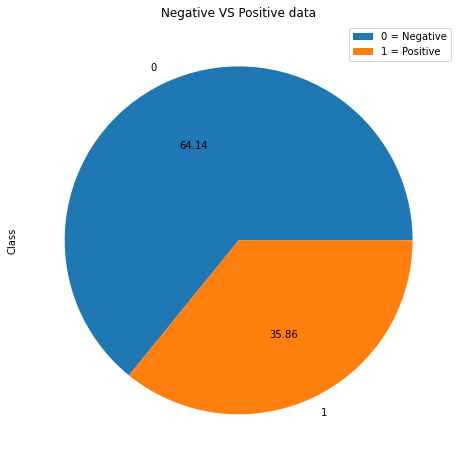

In [23]:
rcParams['figure.figsize']= 10,8
df.Class.value_counts().plot.pie(autopct ='%.2f')
plt.legend(['0 = Negative', '1 = Positive'])
plt.title('Negative VS Positive data')
plt.show()

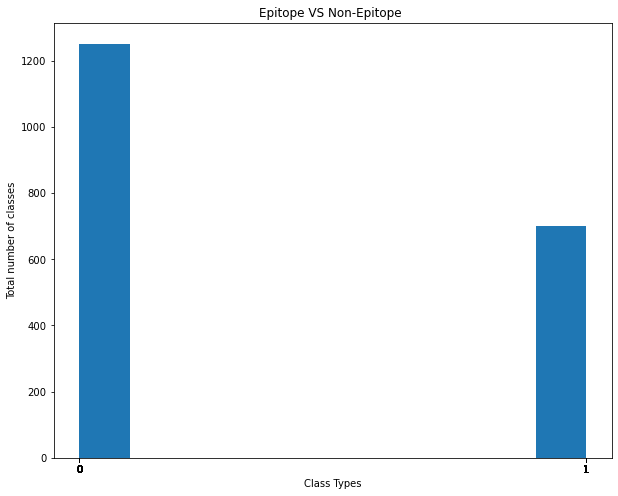

In [24]:
rcParams['figure.figsize']= 10,8
plt.hist(df.Class)
plt.xlabel("Class Types")
plt.xticks(df.Class)
plt.ylabel("Total number of classes")
plt.title("Epitope VS Non-Epitope ")
plt.show()

In [25]:
df.columns

Index(['Class', ' Molecular Weight', 'Aliphatic Index', 'Instability index',
       'BomanIndex', ' kideraFactors    KF1(Helix/bend preference)',
       'KF3(Extended structure preference)', 'KF5(Double-bend preference)',
       'KF6 (Partial specific volume)', 'KF7(Flat extended preference)',
       'KF8(Occurrence in alpha region)', 'KF9( pK-C)',
       'KF10(Surrounding hydrophobicity)', 'BLOSUM2', 'BLOSUM3', 'BLOSUM4',
       'BLOSUM5', 'BLOSUM6', 'BLOSUM7', 'BLOSUM8', 'BLOSUM9', 'BLOSUM10',
       'FasgaiVectors(F1)', 'F2', 'F3', 'F4', 'F5', 'F6',
       'AACOMP percentage(Tiny)', 'Small', 'Aromatic', 'NonPolar', 'Charged',
       'Basic', 'Acidic', 'ProtFP1', 'ProtFP3', 'ProtFP4', 'ProtFP5',
       'ProtFP6', 'ProtFP7', 'ProtFP8', 'PP3(H-bonding)'],
      dtype='object')

In [26]:
df.rename(columns={' Molecular Weight':'F2', 'Charge':'F3', 'Aliphatic Index':'F4', 'Instability index':'F5', 'BomanIndex':'F6',
                  ' kideraFactors    KF1(Helix/bend preference)':'F7_1', 'KF3(Extended structure preference)':'F7_3','KF5(Double-bend preference)':'F7_5',
                  'KF6 (Partial specific volume)':'F7_6', 'KF7(Flat extended preference)':'F7_7', 'KF8(Occurrence in alpha region)':'F7_8','KF9( pK-C)':'F7_9',
                  'KF10(Surrounding hydrophobicity)':'F7_10', 'BLOSUM1':'F8_1', 'BLOSUM2':'F8_2', 'BLOSUM3':'F8_3', 'BLOSUM4':'F8_4', 'BLOSUM5':'F8_5',
                  'BLOSUM6':'F8_6', 'BLOSUM7':'F8_7', 'BLOSUM8':'F8_8', 'BLOSUM9':'F8_9', 'BLOSUM10':'F8_10','FasgaiVectors(F1)':'F9_1',
                  'F2':'F9_2','F3':'F9_3','F4':'F9_4','F5':'F9_5','F6':'F9_6', 'AACOMP percentage(Tiny)':'F10_1', 'Small':'F10_2', 'Aromatic':'F10_4',
                  'NonPolar':'F10_5', 'Charged':'F10_7', 'Basic':'F10_8', 'Acidic':'F10_9', 'ProtFP1':'F11_1', 'ProtFP3':'F11_3', 'ProtFP4':'F11_4', 'ProtFP5':'F11_5',
                  'ProtFP6':'F11_6', 'ProtFP7':'F11_7', 'ProtFP8':'F11_8', 'PP3(H-bonding)':'F12_3'}, inplace=True)

In [27]:
df.head()

Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

# Outlier detection and removal

### F2 Outlier Detection and Removal

Skewness is:  -0.2803519916122835
Kurtosis is:  -0.8908966166224408


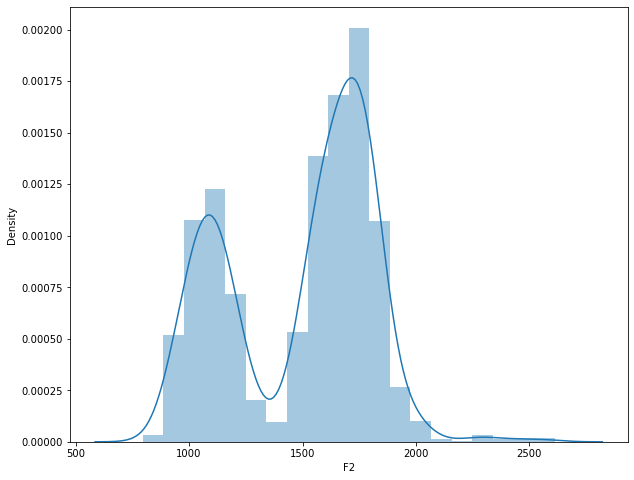

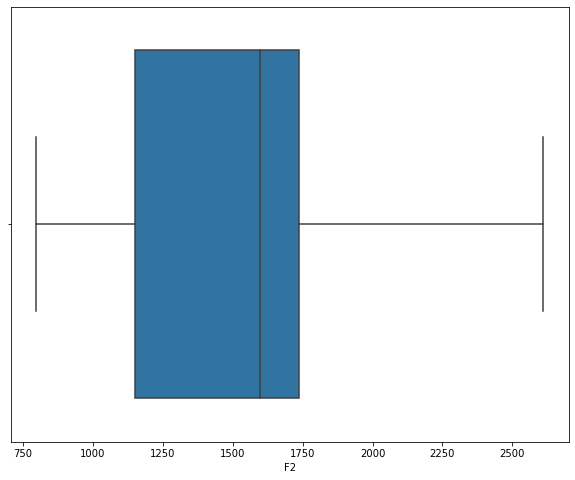

In [28]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F2))
print('Kurtosis is: ', stats.kurtosis(df.F2))

## Data Distribution
sns.distplot(df.F2)
plt.show()

## Outliers Detection
sns.boxplot(df.F2)
plt.show()

- There are no such Outliers detected in F2 and Data is normally distributed falling under the range of Skewness and Kurtosis.

### F4 Outlier Detection and Removal

Skewness is:  0.35654912668535793
Kurtosis is:  -0.01281367597278349


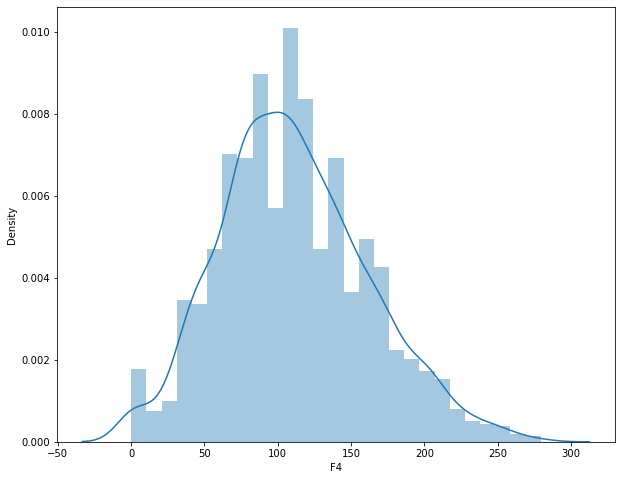

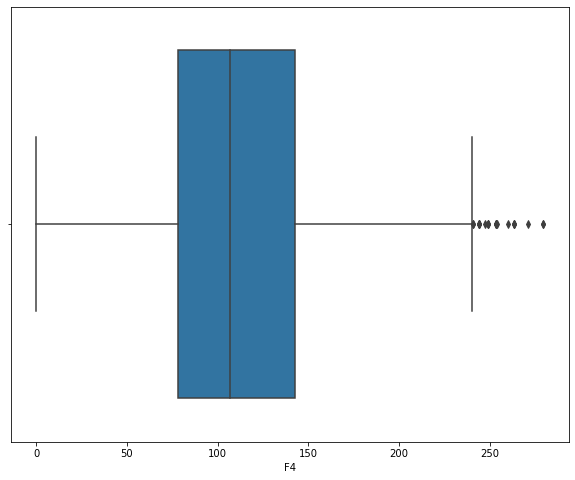

In [29]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F4))
print('Kurtosis is: ', stats.kurtosis(df.F4))

## Data Distribution
sns.distplot(df.F4)
plt.show()

## Outliers Detection
sns.boxplot(df.F4)
plt.show()

In [30]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F4 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F4 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)

Q1:  78.0
Q3:  142.83333333333348
IQR:  64.83333333333348
Lower limit is:  -19.250000000000227
Upper limit is:  240.0833333333337


In [31]:
## Detecting Outliers
df [ (df.F4 < lower_limit) | (df.F4 > upper_limit) ]

Class          F2          F4         F5        F6      F7_1      F7_3  \
41        1  1110.44874  263.000000  19.770000 -1.701000 -0.411000  0.904000   
145       1  1106.41354  248.888889  20.855556 -3.087778 -0.764444  0.511111   
384       1  1027.31504  248.888889  13.588889 -3.260000 -0.297778  1.024444   
413       1  1114.45204  253.000000  -2.850000 -2.585000 -0.646000  0.664000   
504       1  1048.33104  248.888889  51.688889 -2.595556 -0.345556  1.127778   
727       1  1671.17994  279.333333  35.013333 -3.260000 -0.394667  0.987333   
908       0  1073.38414  244.000000  28.260000 -3.267000 -0.839000  0.381000   
992       0  1219.57294  263.000000  19.770000 -3.271000 -0.792000  0.436000   
996       0  1140.47444  263.000000  13.230000 -3.426000 -0.341000  1.101000   
997       0  1126.44764  253.000000  13.230000 -3.338000 -0.342000  1.126000   
1015      0  1041.33944  254.000000   9.000000 -2.800000 -0.853000  0.107000   
1037      0  1002.30534  260.000000  30.288889 -3.428889 -0.758889  0.531111   
1043      0  1125.41954  244.000000  68.130000 -2.746000 -0.778000  0.145000   
1067      0   926.20754  271.111111   8.888889 -3.298889 -0.977778  0.012222   
1182      0  1071.36574  244.000000   9.000000 -2.362000 -0.702000  0.122000   
1188      0  1027.31264  244.000000   9.000000 -2.712000 -0.854000  0.132000   
1345      0  1671.18004  279.333333  35.013333 -3.259333 -0.596667  0.954667   
1375      0  1686.15124  253.333333  35.013333 -2.562667 -0.377333  0.872667   
1389      0  1808.32644  253.333333  37.960000 -2.373333 -0.364000  0.659333   
1410      0  1587.01874  247.333333  22.173333 -2.848000 -0.670000  0.500000   
1817      0  1542.96564  240.666667  16.513333 -3.078667 -0.606667  0.626000   
1847      0  1623.05484  240.666667  48.753333 -2.705333 -0.752000  0.487333   

          F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
41   -0.447000 -0.631000  0.180000  ...  10.000   0.000  3.157000 -1.020000   
145  -0.343333 -0.671111 -0.028889  ...   0.000  11.111  4.968889 -1.665556   
384  -0.374444 -0.230000 -0.261111  ...   0.000   0.000  4.083333 -0.856667   
413  -0.145000 -0.658000  0.347000  ...   0.000   0.000  3.837000 -1.394000   
504  -0.268889 -0.564444 -0.163333  ...   0.000   0.000  3.937778 -1.347778   
727  -0.336000 -0.613333 -0.048000  ...   0.000   0.000  4.066667 -1.256000   
908  -0.397000 -0.906000  0.066000  ...   0.000   0.000  4.004000 -1.647000   
992  -0.364000 -0.809000  0.070000  ...   0.000  10.000  5.048000 -1.670000   
996  -0.391000 -0.204000 -0.318000  ...   0.000   0.000  4.333000 -1.020000   
997  -0.287000 -0.288000 -0.342000  ...   0.000   0.000  4.179000 -1.000000   
1015 -0.535000 -1.136000  0.405000  ...   0.000   0.000  3.118000 -1.670000   
1037 -0.337778 -0.920000  0.095556  ...   0.000   0.000  4.460000 -1.593333   
1043 -0.249000 -1.021000 -0.062000  ...  10.000   0.000  3.777000 -1.223000   
1067 -0.467778 -1.378889  0.396667  ...   0.000   0.000  3.515556 -1.755556   
1182 -0.453000 -1.245000  0.628000  ...   0.000   0.000  2.846000 -1.449000   
1188 -0.431000 -1.220000  0.381000  ...   0.000   0.000  2.964000 -1.650000   
1345 -0.335333 -0.714000 -0.165333  ...   0.000   0.000  4.337333 -1.663333   
1375 -0.226667 -0.576000  0.063333  ...   0.000   0.000  3.364667 -1.145333   
1389 -0.568667 -0.520000 -0.132667  ...   6.667   0.000  4.172000 -0.754667   
1410 -0.464000 -0.808667 -0.207333  ...   0.000   0.000  3.378000 -1.626667   
1817 -0.373333 -0.704667 -0.128667  ...   0.000   0.000  3.254667 -1.342000   
1847 -0.273333 -0.768667 -0.220667  ...   6.667   0.000  3.591333 -1.488667   

         F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
41    0.828000 -0.364000  0.384000  0.861000 -0.281000  0.045000  
145   0.156667 -0.831111  0.101111  0.601111 -0.374444 -0.367778  
384   0.403333 -0.370000  0.268889  1.212222 -0.271111 -0.078889  
413   0.665000 -0.179000  0.173000  0.554000 -0.166000 -0.124000  
504   0.7422

In [32]:
## Removing Outliers
df = df [ (df.F4 >= lower_limit) & (df.F4 <= upper_limit) ]
df.head()

Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.21066238832752865
Kurtosis after outlier removal is:  -0.30053794523336386


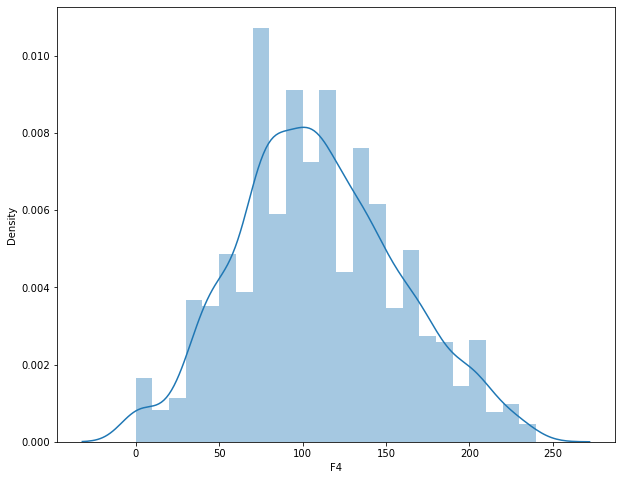

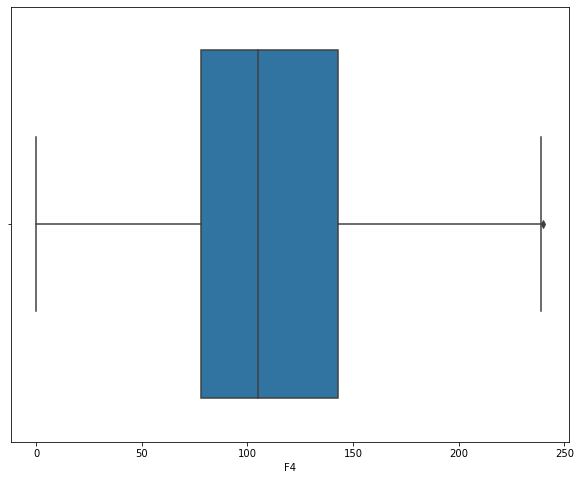

In [33]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F4))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F4))

## Data Distribution
sns.distplot(df.F4)
plt.show()

## Outliers Detection
sns.boxplot(df.F4)
plt.show()

### F5 Outliers Detection and Removal

Skewness is:  1.1121991288773256
Kurtosis is:  2.6068002994928436


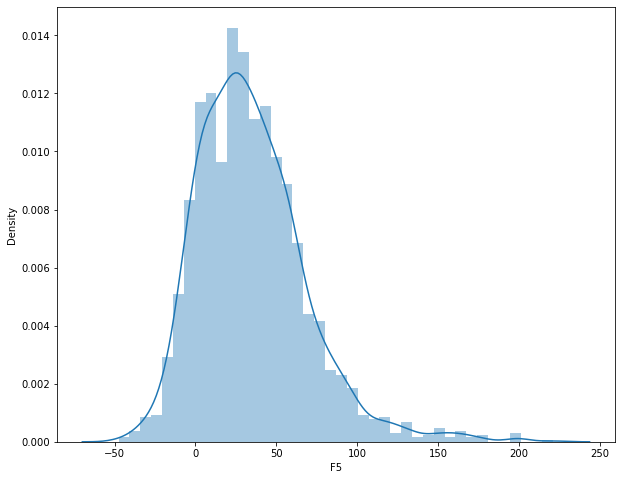

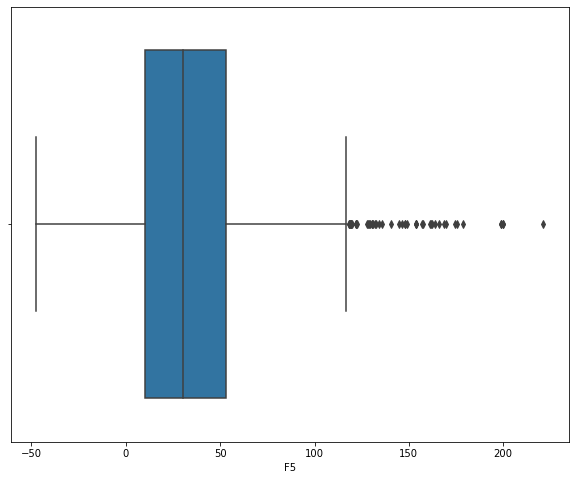

In [34]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F5))
print('Kurtosis is: ', stats.kurtosis(df.F5))

## Data Distribution
sns.distplot(df.F5)
plt.show()

## Outliers Detection
sns.boxplot(df.F5)
plt.show()

In [35]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F5 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F5 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)

Q1:  10.3888888888889
Q3:  52.898333333333355
IQR:  42.509444444444455
Lower limit is:  -53.37527777777778
Upper limit is:  116.66250000000004


In [36]:
## Detecting Outliers
df [ (df.F5 < lower_limit) | (df.F5 > upper_limit) ]

Class          F2          F4          F5        F6      F7_1      F7_3  \
42        1  1343.52544   49.000000  131.210000  3.202000  0.146000  0.203000   
81        1  1230.36604   11.111111  144.677778  4.104444  0.243333  0.026667   
88        1  1260.39234    0.000000  119.422222  4.561111  0.327778  0.173333   
90        1  2372.82624   82.105263  131.826316  4.824737  0.020526  0.429474   
184       1  1205.44054   78.000000  168.380000  2.483000  0.505000  0.258000   
211       1  1135.31514    0.000000  118.500000  1.757778  0.370000 -0.092222   
279       1  1135.15214   43.333333  128.622222  3.920000  0.031111 -0.596667   
294       1  1337.62404    0.000000  162.080000  5.284000 -0.127000  0.008000   
295       1  1164.39754   68.000000  148.740000  1.148000 -0.438000 -0.024000   
299       1  1967.20154    0.000000  118.566667  4.196000  0.120000 -0.119333   
330       1  1260.28724    0.000000  128.533333  3.361111  0.554444 -0.435556   
348       1  1330.41974   39.000000  119.300000  5.323000 -0.292000 -0.362000   
361       1  1133.17964   39.000000  198.600000  2.661000  0.460000 -0.379000   
385       1  1155.37174   97.777778  221.222222  6.360000 -0.116667  0.794444   
389       1  1159.41844   75.555556  157.577778  5.448889 -0.066667  0.814444   
418       1  1099.26424   54.444444  199.822222  6.802222  0.126667  0.570000   
441       1  1147.36414   32.222222  148.144444  6.281111  0.043333  0.750000   
448       1  1147.36414   32.222222  148.144444  6.281111  0.043333  0.750000   
449       1  1085.23744   43.333333  199.822222  6.900000  0.160000  0.823333   
452       1  1212.58054  107.000000  122.320000  1.788000  0.043000  0.383000   
453       1  1386.44304    0.000000  129.590000  4.122000 -0.404000 -0.426000   
464       1  1187.27494   78.000000  164.080000  4.537000 -0.724000 -0.310000   
465       1  1259.57914  107.000000  134.330000  4.005000 -0.283000  0.639000   
512       1  1111.31204  118.888889  119.611111  2.378889  0.224444  0.068889   
524       1  1784.11884   84.666667  166.026667  4.643333  0.052667  0.485333   
797       1  1672.80904   52.000000  174.253333  2.237333  0.069333 -0.422667   
941       0  1317.29334    0.000000  119.560000  4.289000  0.117000 -0.381000   
1164      0  1052.14914   78.000000  198.600000  1.289000  0.220000 -0.377000   
1235      0  1101.22184   97.000000  146.170000  2.069000  0.085000  0.255000   
1327      0  1832.21564   97.333333  127.840000  3.568667 -0.045333  0.558667   
1329      0  1805.19004   97.333333  140.680000  3.352667 -0.067333  0.577333   
1332      0  1925.33204  104.000000  178.866667  5.151333 -0.126000  0.481333   
1369      0  1863.33134   97.333333  122.180000  2.914000 -0.272000  0.473333   
1476      0  1826.17704   90.666667  130.626667  1.828667 -0.356667  0.436667   
1494      0  1820.16134   71.333333  122.180000  4.068000  0.020667  0.520000   
1562      0  1840.20384   97.333333  135.653333  1.770000 -0.356000  0.420000   
1563      0  1838.21654  116.666667  169.593333  2.342667 -0.419333  0.480667   
1592      0  1643.72414   52.000000  161.666667  1.960000 -0.060000 -0.612667   
1604      0  1628.75584   52.000000  161.413333  2.003333  0.149333 -0.518667   
1605      0  1642.78274   52.000000  122.066667  1.876000  0.014000 -0.520667   
1751      0  1761.17124  168.666667  118.120000  0.930000 -0.524667  0.589333   
1798      0  1889.18754   52.000000  118.900000  3.375333  0.229333 -0.028667   
1799      0  1917.20094   52.000000  132.373333  4.000000  0.266667  0.078000   
1820      0  1850.27084  142.666667  175.253333  1.843333 -0.506000  0.384000   
1825      0  1852.25824  116.666667  130.626667  1.274000 -0.480000  0.410000   
1890      0  1891.26524  116.666667  156.753333  3.422667 -0.412667  0.542000   
1980      0  1792.14154   78.000000  153.520000  1.518667 -0.270000 -0.104667   
2107      0  1727.93184   52.000000  153.853333  2.253333 -0.142667 -0.450667   
2222      0  1823.19894   78.000000  

In [37]:
## Removing Outliers
df = df [ (df.F5 >= lower_limit) & (df.F5 <= upper_limit) ]
df.head()

Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

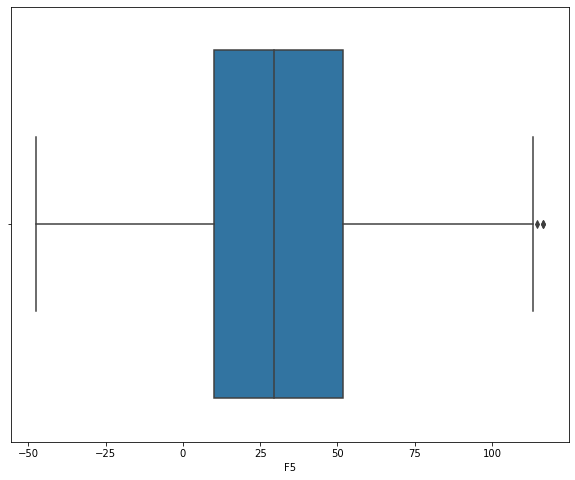

In [38]:
sns.boxplot(df.F5)
plt.show()

- Few Outliers are spotted.

In [39]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F5 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F5 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)

Q1:  9.91333333333334
Q3:  51.6888888888889
IQR:  41.775555555555556
Lower limit is:  -52.74999999999999
Upper limit is:  114.35222222222222


In [40]:
## Detecting Outliers
df [ (df.F5 < lower_limit) | (df.F5 > upper_limit) ]
## Removing Outliers
df = df [ (df.F5 >= lower_limit) & (df.F5 <= upper_limit) ]
df.head()

Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.3204702772315445
Kurtosis after outlier removal is:  -0.25895939370228316


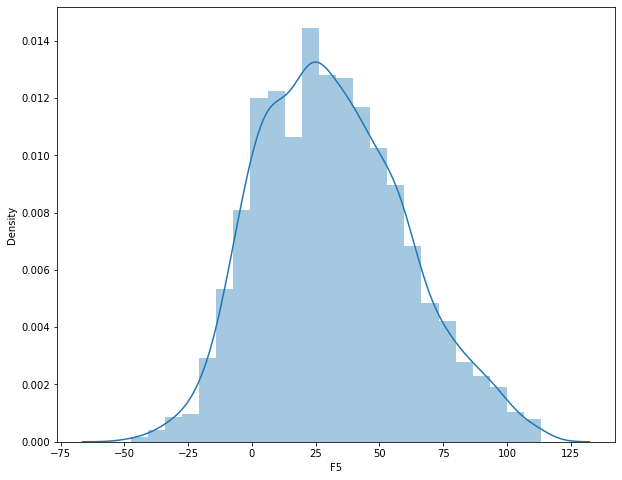

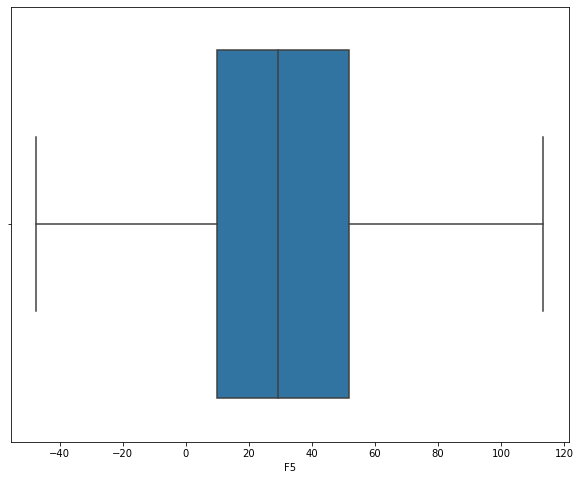

In [41]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F5))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F5))

## Data Distribution
sns.distplot(df.F5)
plt.show()

## Outliers Detection
sns.boxplot(df.F5)
plt.show()

### F6 Outliers Detection and Removal

Skewness is:  0.005914184039313836
Kurtosis is:  -0.6956674589089729


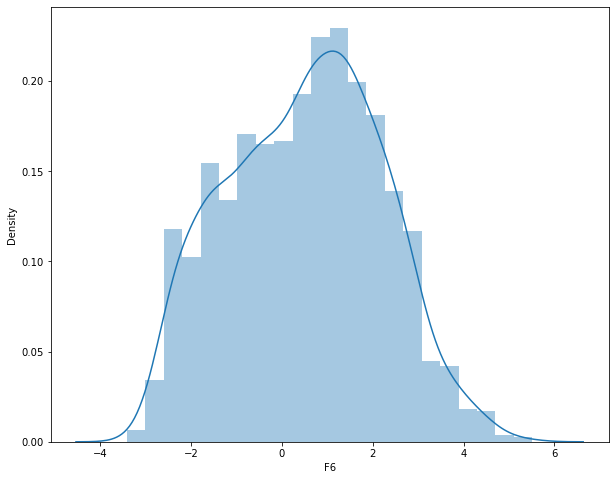

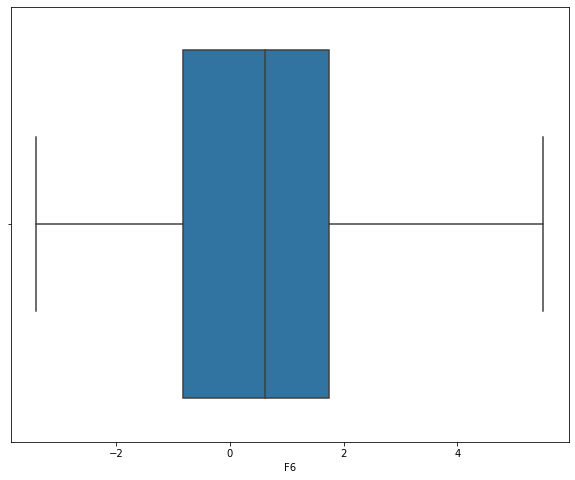

In [42]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F6))
print('Kurtosis is: ', stats.kurtosis(df.F6))

## Data Distribution
sns.distplot(df.F6)
plt.show()

## Outliers Detection
sns.boxplot(df.F6)
plt.show()

- No Outliers are detected in the data.

### F7_1 Outliers Detection and Removal

Skewness is:  0.33765413014876
Kurtosis is:  0.20436165500545478


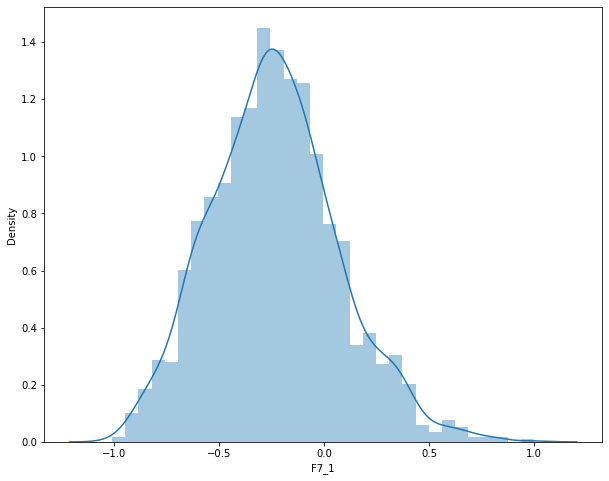

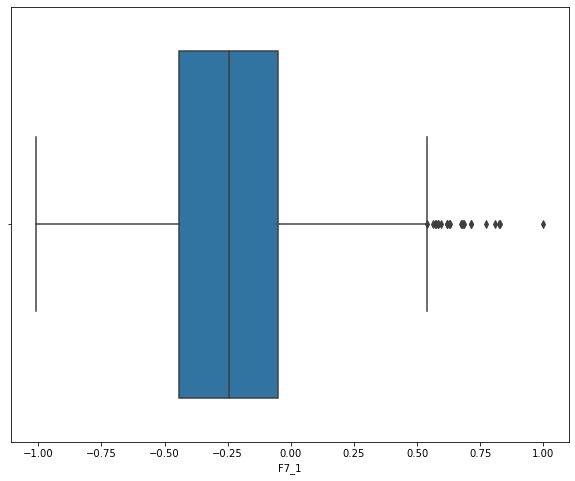

In [43]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F7_1))
print('Kurtosis is: ', stats.kurtosis(df.F7_1))

## Data Distribution
sns.distplot(df.F7_1)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_1)
plt.show()

In [44]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F7_1 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F7_1 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)

Q1:  -0.444666666666667
Q3:  -0.05083333333333335
IQR:  0.39383333333333365
Lower limit is:  -1.0354166666666673
Upper limit is:  0.539916666666667


In [45]:
## Detecting Outliers
df [ (df.F7_1 < lower_limit) | (df.F7_1 > upper_limit) ]
## Removing Outliers
df = df [ (df.F7_1 >= lower_limit) & (df.F7_1 <= upper_limit) ]
df.head()

Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

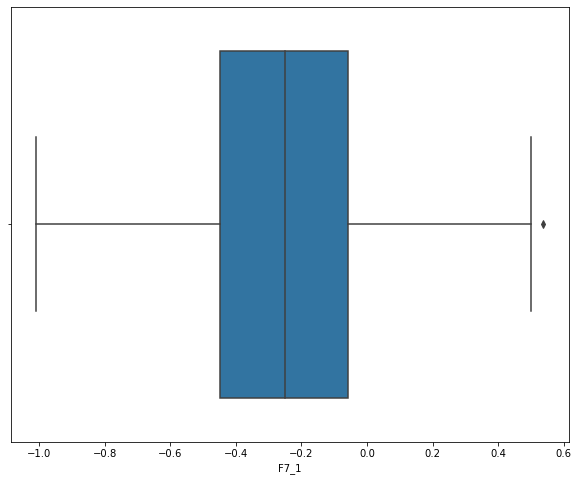

In [46]:
sns.boxplot(df.F7_1)
plt.show()

- Few Outliers are detected.

In [47]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F7_1 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F7_1 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)

Q1:  -0.4475555555555555
Q3:  -0.05716666666666665
IQR:  0.39038888888888884
Lower limit is:  -1.0331388888888888
Upper limit is:  0.5284166666666665


In [48]:
## Detecting Outliers
df [ (df.F7_1 < lower_limit) | (df.F7_1 > upper_limit) ]
## Removing Outliers
df = df [ (df.F7_1 >= lower_limit) & (df.F7_1 <= upper_limit) ]
df.head()

Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.10748082782847955
Kurtosis after outlier removal is:  -0.32305588940404695


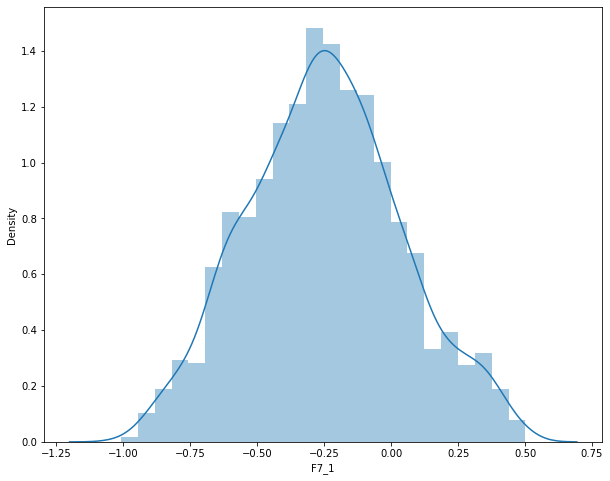

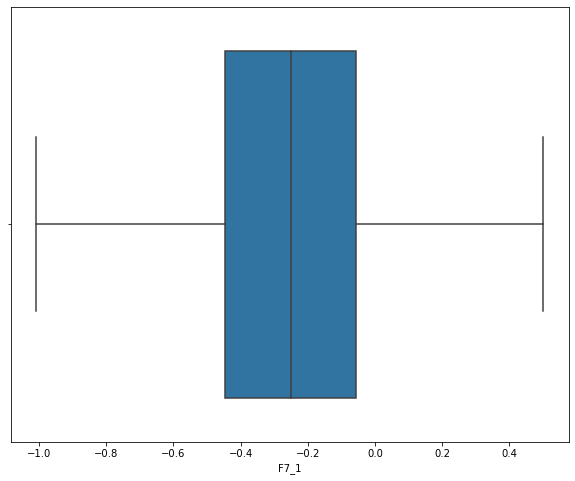

In [49]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F7_1))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F7_1))

## Data Distribution
sns.distplot(df.F7_1)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_1)
plt.show()

### F7_3 Outliers Detection and Removal

Skewness is:  -0.08298821246535018
Kurtosis is:  0.03036248362171179


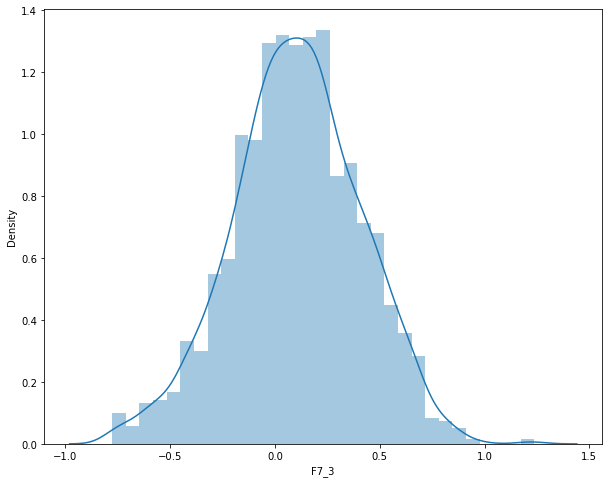

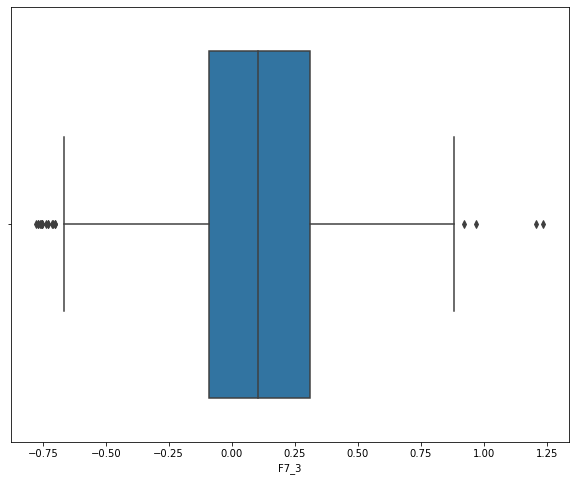

In [50]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F7_3))
print('Kurtosis is: ', stats.kurtosis(df.F7_3))

## Data Distribution
sns.distplot(df.F7_3)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_3)
plt.show()

In [51]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F7_3 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F7_3 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)

Q1:  -0.09
Q3:  0.31183333333333324
IQR:  0.40183333333333326
Lower limit is:  -0.6927499999999999
Upper limit is:  0.9145833333333331


In [52]:
## Detecting Outliers
df [ (df.F7_3 < lower_limit) | (df.F7_3 > upper_limit) ]
## Removing Outliers
df = df [ (df.F7_3 >= lower_limit) & (df.F7_3 <= upper_limit) ]
df.head()

Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.03421503099998256
Kurtosis after outlier removal is:  -0.2823638007127758


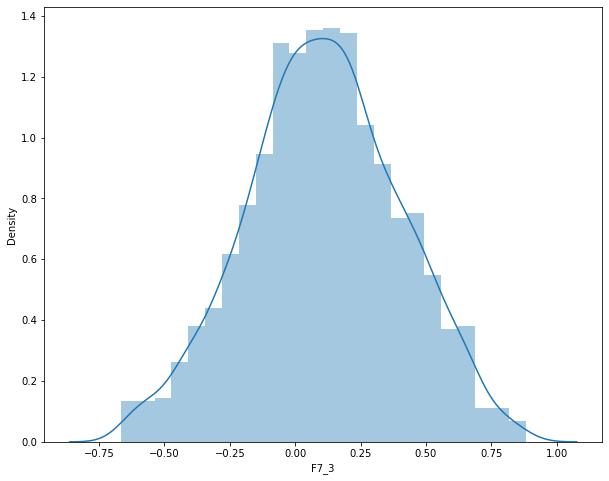

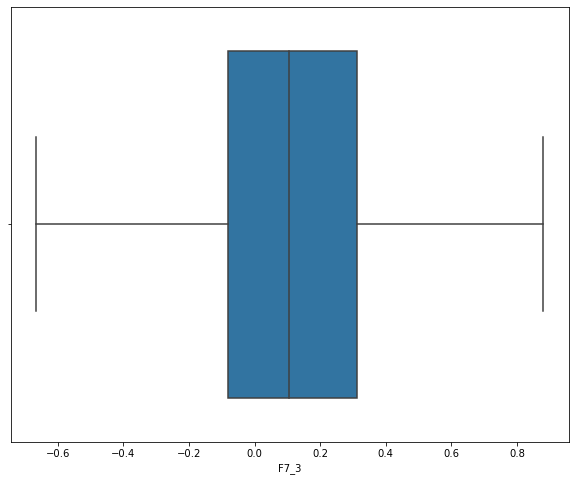

In [53]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F7_3))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F7_3))

## Data Distribution
sns.distplot(df.F7_3)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_3)
plt.show()

### F7_5 Outliers Detection and Removal

Skewness is:  0.11484854826785651
Kurtosis is:  0.17328484106066666


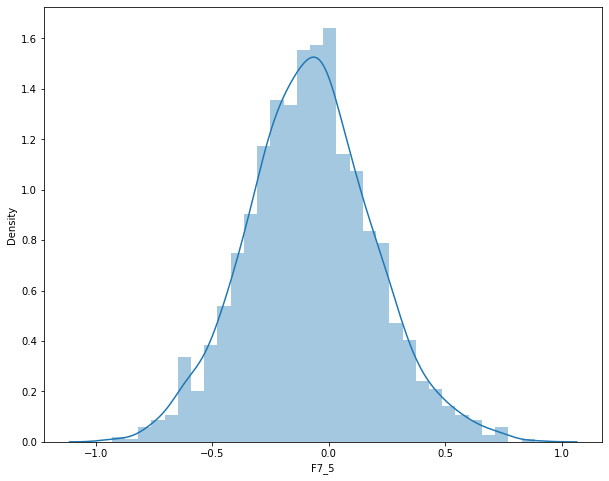

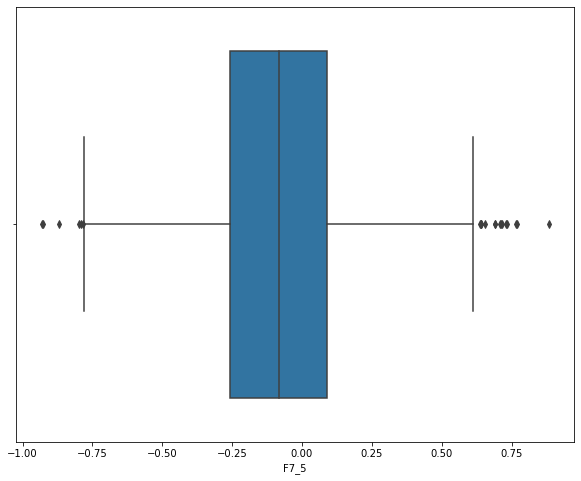

In [54]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F7_5))
print('Kurtosis is: ', stats.kurtosis(df.F7_5))

## Data Distribution
sns.distplot(df.F7_5)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_5)
plt.show()

In [55]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F7_5 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F7_5 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)

Q1:  -0.257333333333333
Q3:  0.091
IQR:  0.34833333333333305
Lower limit is:  -0.7798333333333325
Upper limit is:  0.6134999999999995


In [56]:
## Detecting Outliers
df [ (df.F7_5 < lower_limit) | (df.F7_5 > upper_limit) ]
## Removing Outliers
df = df [ (df.F7_5 >= lower_limit) & (df.F7_5 <= upper_limit) ]
df.head()

Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

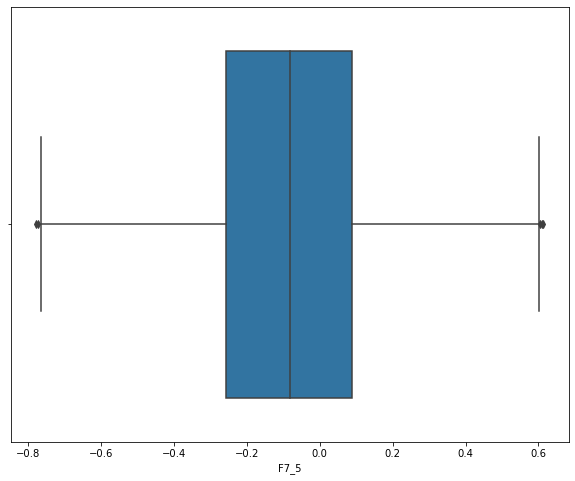

In [57]:
sns.boxplot(df.F7_5)
plt.show()

- Few Outliers are detected.

In [58]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F7_5 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F7_5 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F7_5 < lower_limit) | (df.F7_5 > upper_limit) ]
## Removing Outliers
df = df [ (df.F7_5 >= lower_limit) & (df.F7_5 <= upper_limit) ]
df.head()

Q1:  -0.25716666666666654
Q3:  0.08716666666666666
IQR:  0.3443333333333332
Lower limit is:  -0.7736666666666664
Upper limit is:  0.6036666666666665


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.02447068437447817
Kurtosis after outlier removal is:  -0.20913661218656898


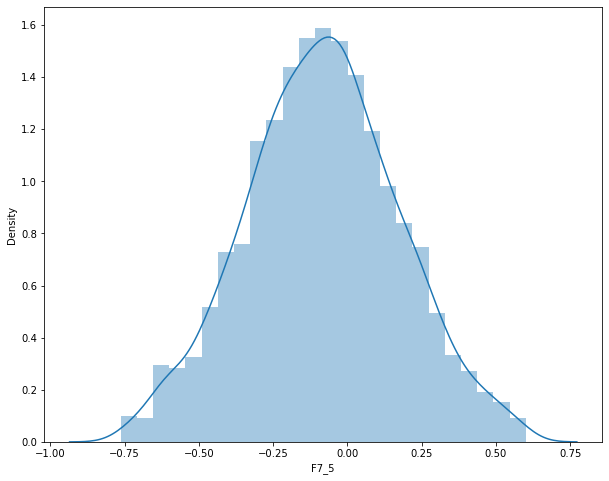

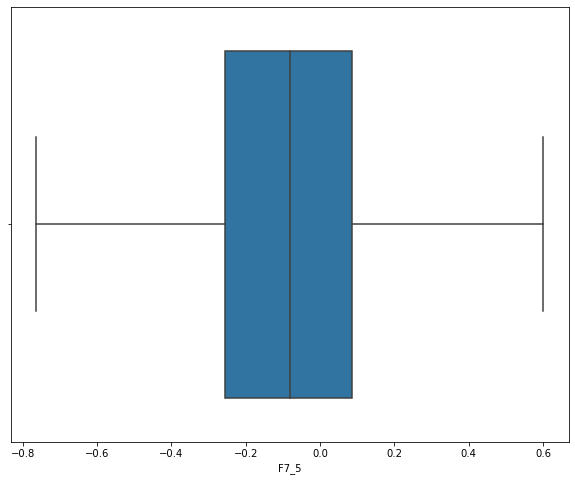

In [59]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F7_5))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F7_5))

## Data Distribution
sns.distplot(df.F7_5)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_5)
plt.show()

### F7_6 Outliers Detection and Removal

Skewness is:  0.17422630036448064
Kurtosis is:  -0.10158566569322192


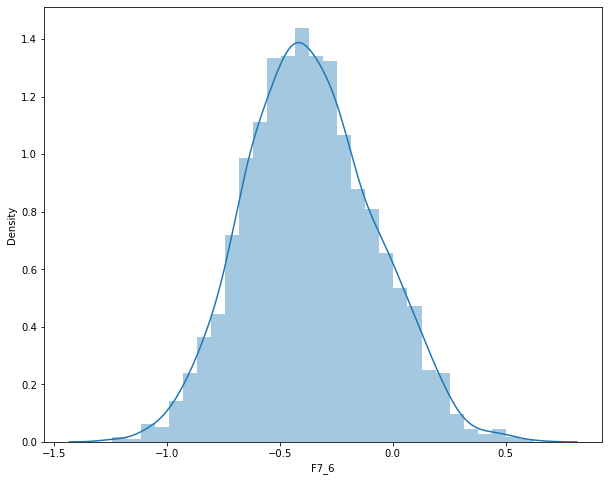

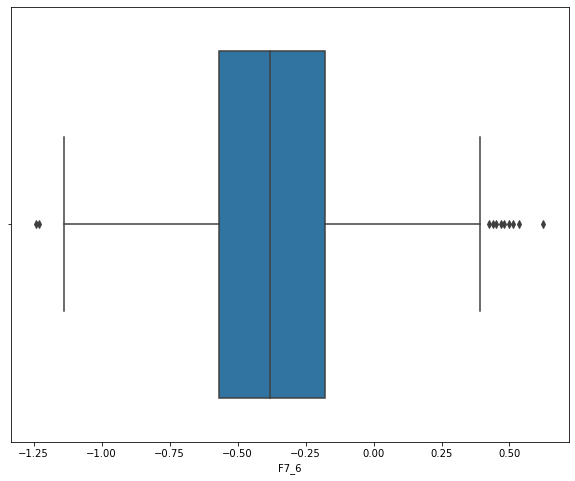

In [60]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F7_6))
print('Kurtosis is: ', stats.kurtosis(df.F7_6))

## Data Distribution
sns.distplot(df.F7_6)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_6)
plt.show()

In [61]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F7_6 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F7_6 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F7_6 < lower_limit) | (df.F7_6 > upper_limit) ]
## Removing Outliers
df = df [ (df.F7_6 >= lower_limit) & (df.F7_6 <= upper_limit) ]
df.head()

Q1:  -0.568666666666667
Q3:  -0.179333333333333
IQR:  0.389333333333334
Lower limit is:  -1.152666666666668
Upper limit is:  0.40466666666666795


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.10831959868947345
Kurtosis after outlier removal is:  -0.34823651075660855


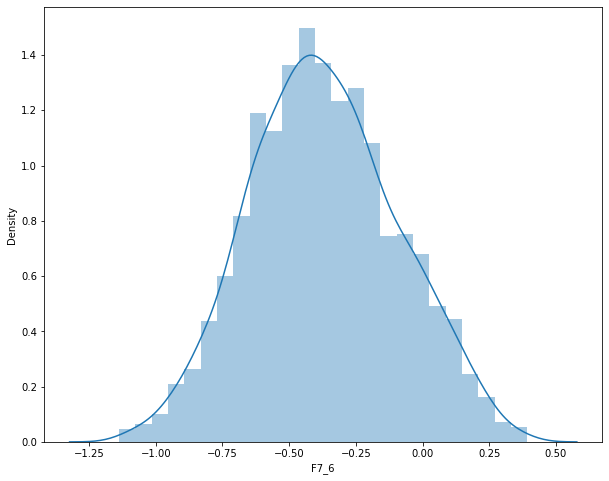

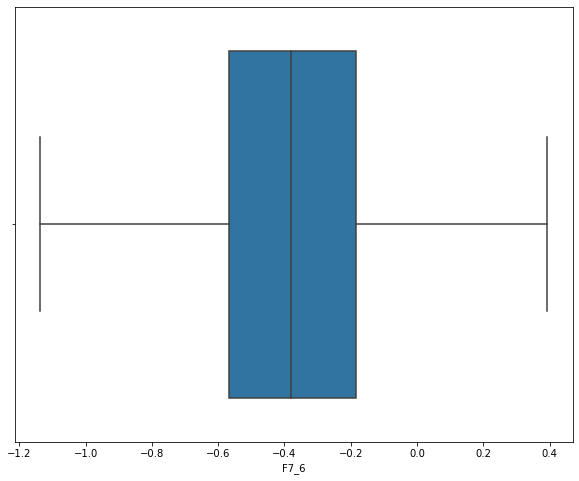

In [62]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F7_6))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F7_6))

## Data Distribution
sns.distplot(df.F7_6)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_6)
plt.show()

### F7_7 Outlier Detection and Removal

Skewness is:  -0.15844174351523022
Kurtosis is:  -0.03494418030326729


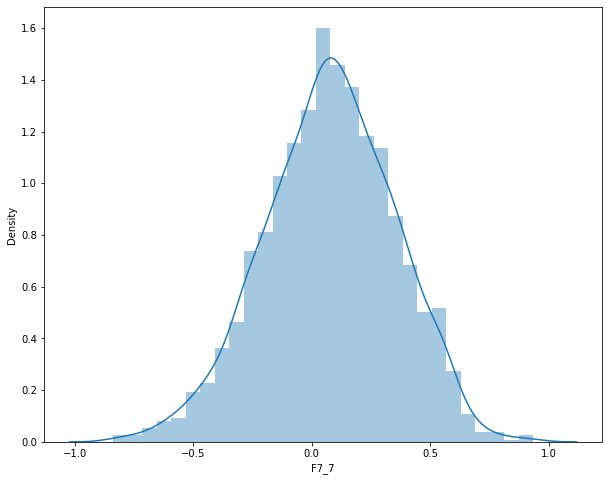

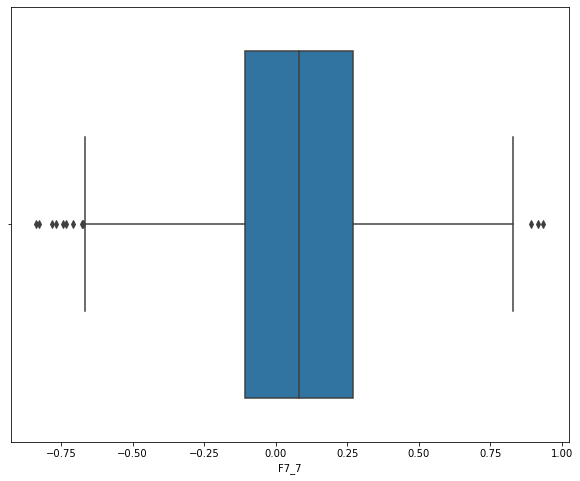

In [63]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F7_7))
print('Kurtosis is: ', stats.kurtosis(df.F7_7))

## Data Distribution
sns.distplot(df.F7_7)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_7)
plt.show()

In [64]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F7_7 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F7_7 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F7_7 < lower_limit) | (df.F7_7 > upper_limit) ]
## Removing Outliers
df = df [ (df.F7_7 >= lower_limit) & (df.F7_7 <= upper_limit) ]
df.head()

Q1:  -0.106
Q3:  0.27
IQR:  0.376
Lower limit is:  -0.67
Upper limit is:  0.8340000000000001


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

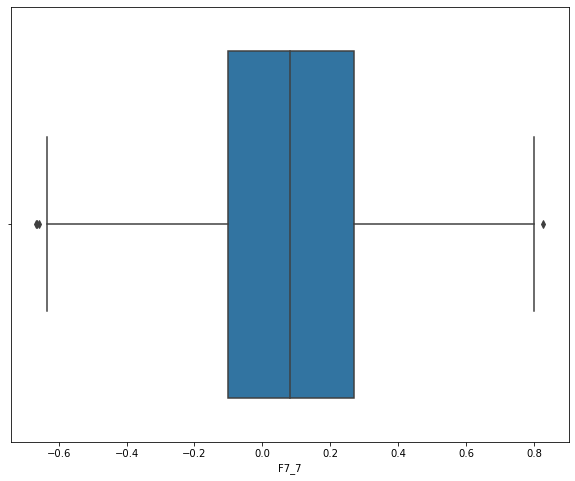

In [65]:
sns.boxplot(df.F7_7)
plt.show()

- Few Outliers are detected

In [66]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F7_7 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F7_7 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F7_7 < lower_limit) | (df.F7_7 > upper_limit) ]
## Removing Outliers
df = df [ (df.F7_7 >= lower_limit) & (df.F7_7 <= upper_limit) ]
df.head()

Q1:  -0.10083333333333325
Q3:  0.27
IQR:  0.37083333333333324
Lower limit is:  -0.6570833333333331
Upper limit is:  0.8262499999999999


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

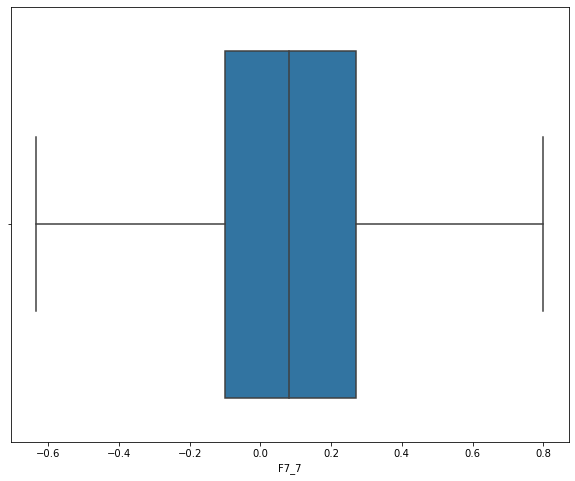

In [67]:
sns.boxplot(df.F7_7)
plt.show()

In [68]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F7_7 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F7_7 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F7_7 < lower_limit) | (df.F7_7 > upper_limit) ]
## Removing Outliers
df = df [ (df.F7_7 >= lower_limit) & (df.F7_7 <= upper_limit) ]
df.head()

Q1:  -0.0993333333333333
Q3:  0.27
IQR:  0.3693333333333333
Lower limit is:  -0.6533333333333332
Upper limit is:  0.824


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.09251934605962546
Kurtosis after outlier removal is:  -0.3380047753362314


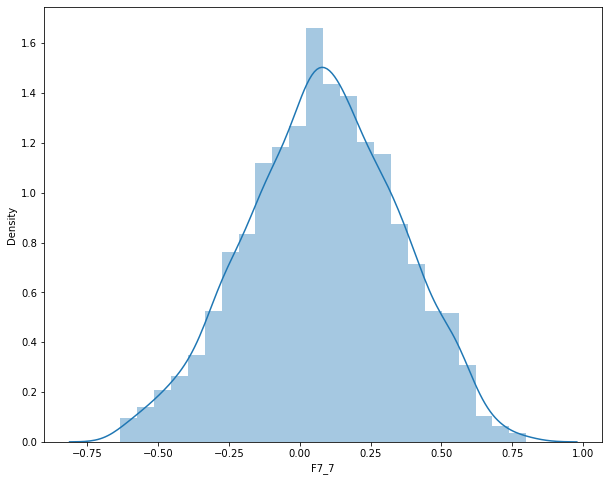

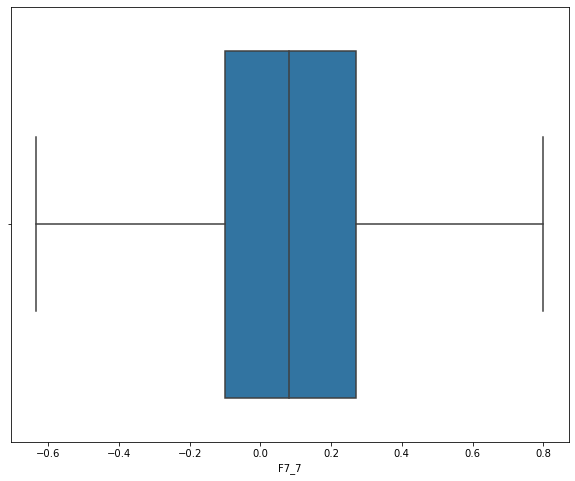

In [69]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F7_7))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F7_7))

## Data Distribution
sns.distplot(df.F7_7)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_7)
plt.show()

### F7_8 Outliers Detection and Removal

Skewness is:  0.0065774382484348505
Kurtosis is:  -0.1389992750858462


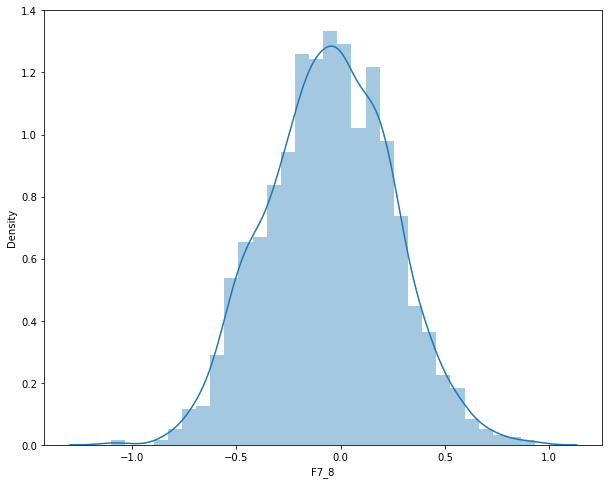

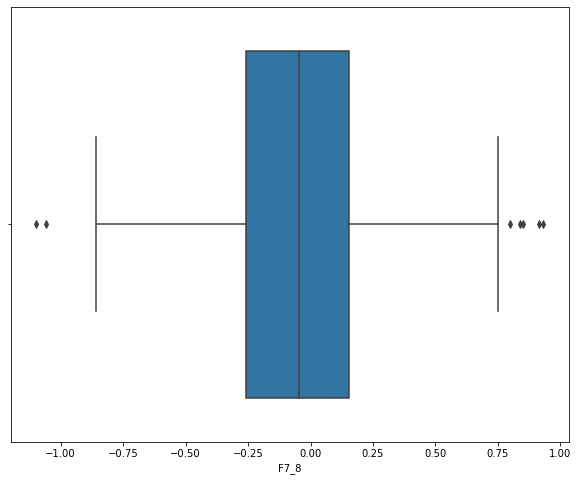

In [70]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F7_8))
print('Kurtosis is: ', stats.kurtosis(df.F7_8))

## Data Distribution
sns.distplot(df.F7_8)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_8)
plt.show()

In [71]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F7_8 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F7_8 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F7_8 < lower_limit) | (df.F7_8 > upper_limit) ]
## Removing Outliers
df = df [ (df.F7_8 >= lower_limit) & (df.F7_8 <= upper_limit) ]
df.head()

Q1:  -0.26
Q3:  0.154
IQR:  0.41400000000000003
Lower limit is:  -0.881
Upper limit is:  0.775


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.018620743360438473
Kurtosis after outlier removal is:  -0.3623216282493327


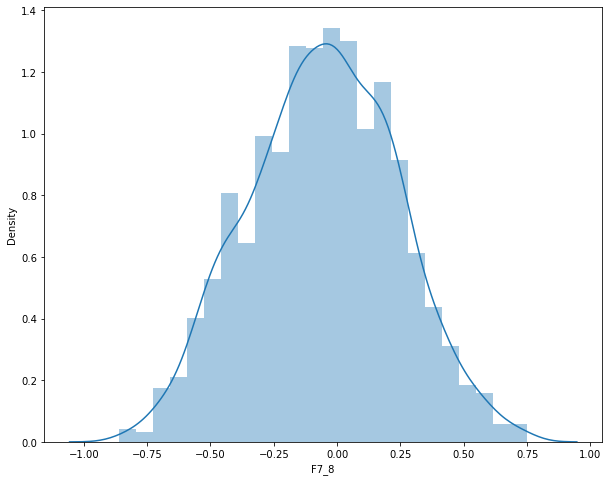

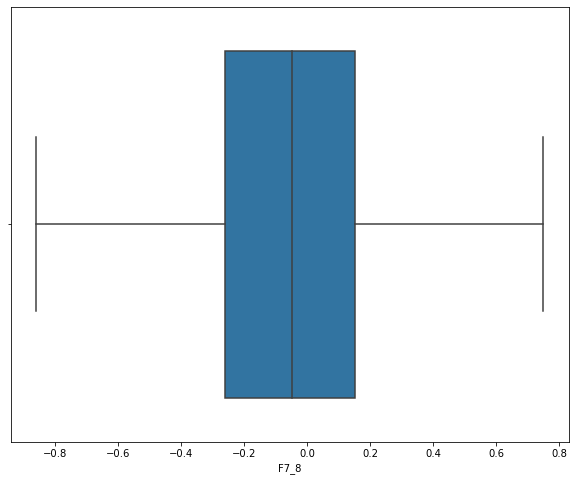

In [72]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F7_8))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F7_8))

## Data Distribution
sns.distplot(df.F7_8)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_8)
plt.show()

### F7_9 Outliers Detection and Removal

Skewness is:  -0.078072499217539
Kurtosis is:  -0.03363879302490913


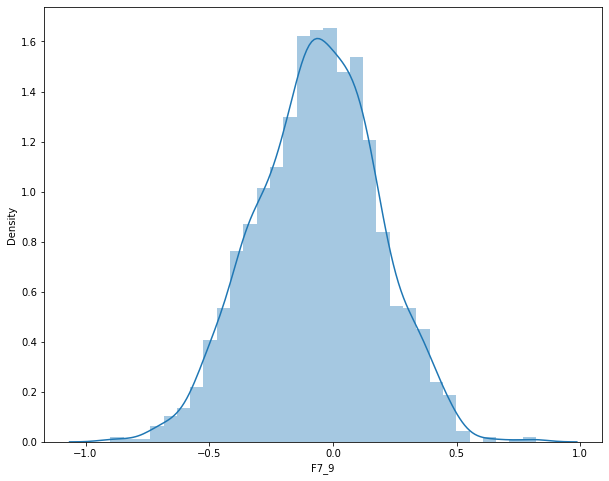

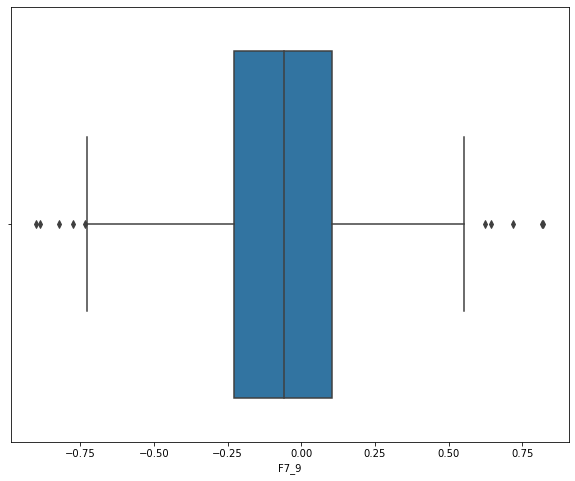

In [73]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F7_9))
print('Kurtosis is: ', stats.kurtosis(df.F7_9))

## Data Distribution
sns.distplot(df.F7_9)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_9)
plt.show()

In [74]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F7_9 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F7_9 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F7_9 < lower_limit) | (df.F7_9 > upper_limit) ]
## Removing Outliers
df = df [ (df.F7_9 >= lower_limit) & (df.F7_9 <= upper_limit) ]
df.head()

Q1:  -0.2295
Q3:  0.105277777777778
IQR:  0.334777777777778
Lower limit is:  -0.731666666666667
Upper limit is:  0.607444444444445


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.09579058221470259
Kurtosis after outlier removal is:  -0.3480449820645979


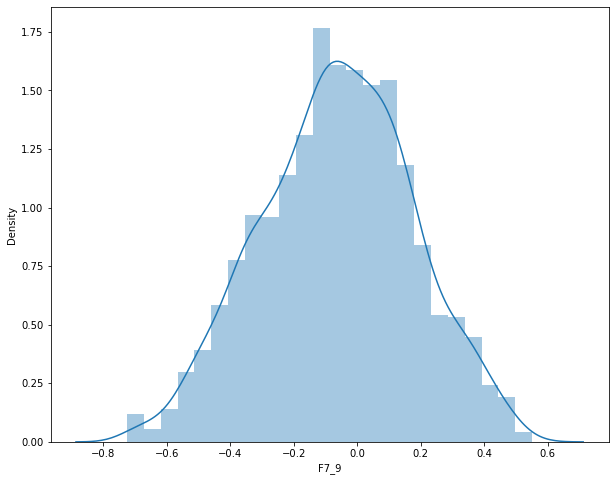

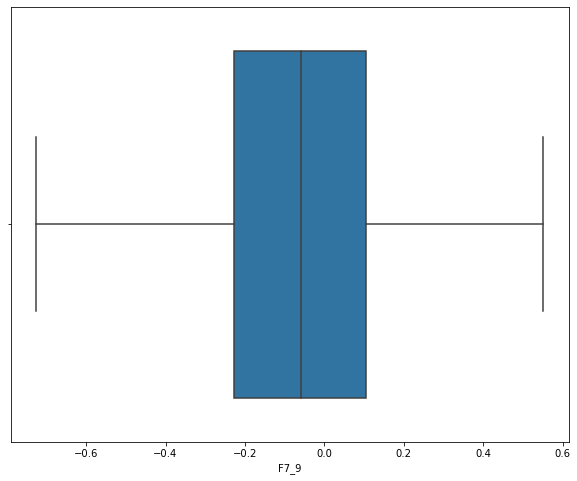

In [75]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F7_9))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F7_9))

## Data Distribution
sns.distplot(df.F7_9)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_9)
plt.show()

### F7_10 Outliers Detection and Removal

Skewness is:  -0.3904274426536764
Kurtosis is:  0.4116070199119526


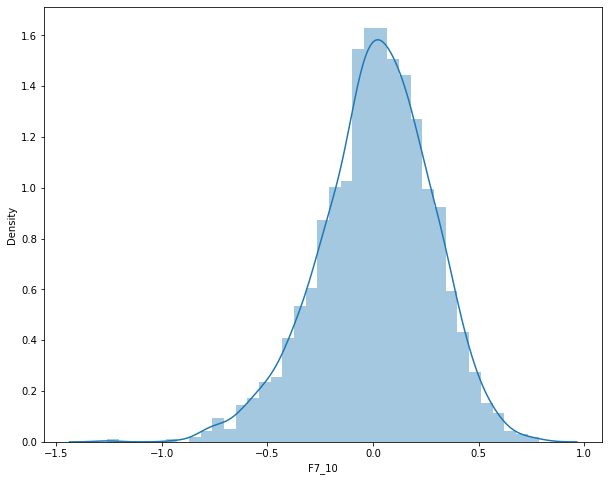

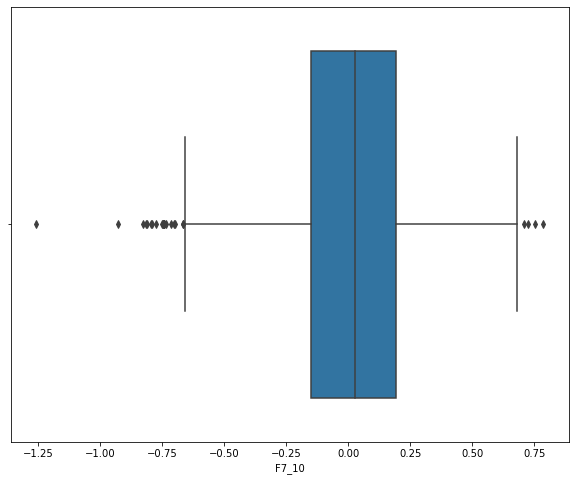

In [76]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F7_10))
print('Kurtosis is: ', stats.kurtosis(df.F7_10))

## Data Distribution
sns.distplot(df.F7_10)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_10)
plt.show()

In [77]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F7_10 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F7_10 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F7_10 < lower_limit) | (df.F7_10 > upper_limit) ]
## Removing Outliers
df = df [ (df.F7_10 >= lower_limit) & (df.F7_10 <= upper_limit) ]
df.head()

Q1:  -0.148888888888889
Q3:  0.193333333333333
IQR:  0.342222222222222
Lower limit is:  -0.6622222222222219
Upper limit is:  0.706666666666666


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

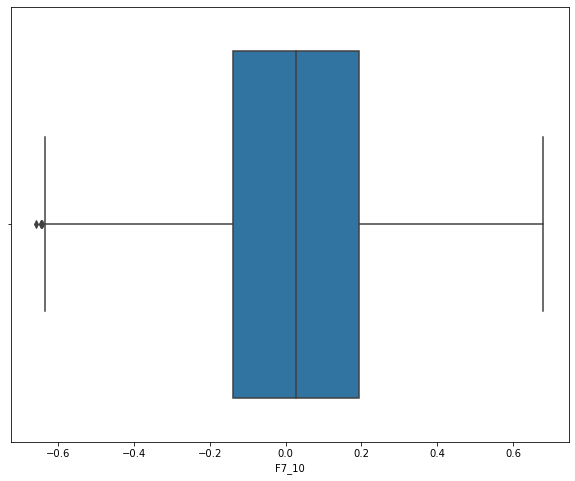

In [78]:
sns.boxplot(df.F7_10)
plt.show()

In [79]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F7_10 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F7_10 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F7_10 < lower_limit) | (df.F7_10 > upper_limit) ]
## Removing Outliers
df = df [ (df.F7_10 >= lower_limit) & (df.F7_10 <= upper_limit) ]
df.head()

Q1:  -0.138
Q3:  0.19361111111111073
IQR:  0.33161111111111075
Lower limit is:  -0.6354166666666661
Upper limit is:  0.6910277777777769


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.1850376225690932
Kurtosis after outlier removal is:  -0.2441237489796486


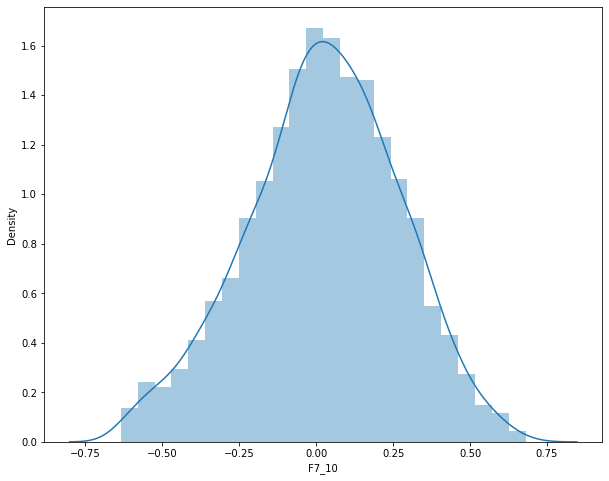

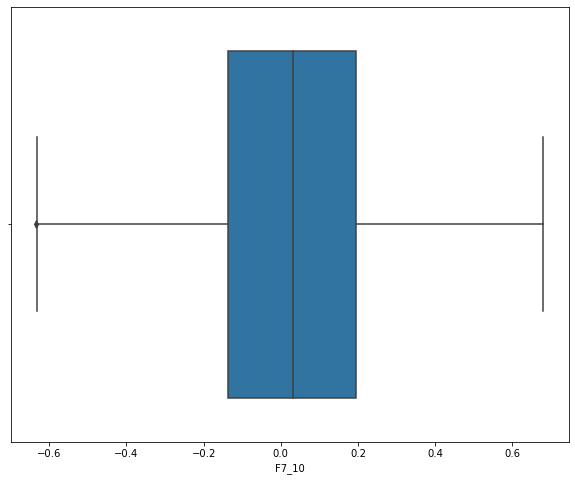

In [80]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F7_10))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F7_10))

## Data Distribution
sns.distplot(df.F7_10)
plt.show()

## Outliers Detection
sns.boxplot(df.F7_10)
plt.show()

### F8_2 Outliers Detection and Removal

Skewness is:  0.4703185763478826
Kurtosis is:  0.38345808709516405


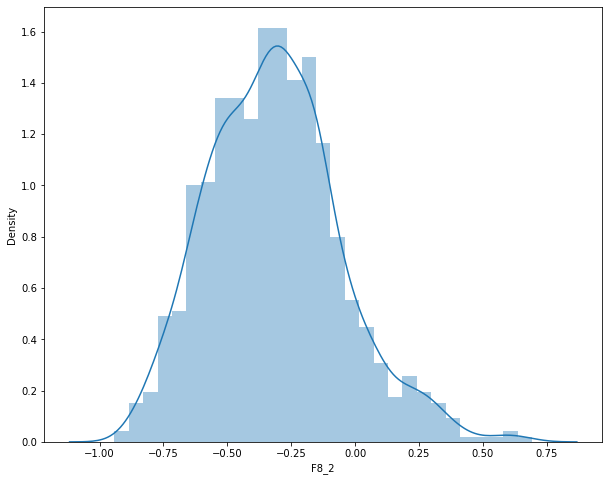

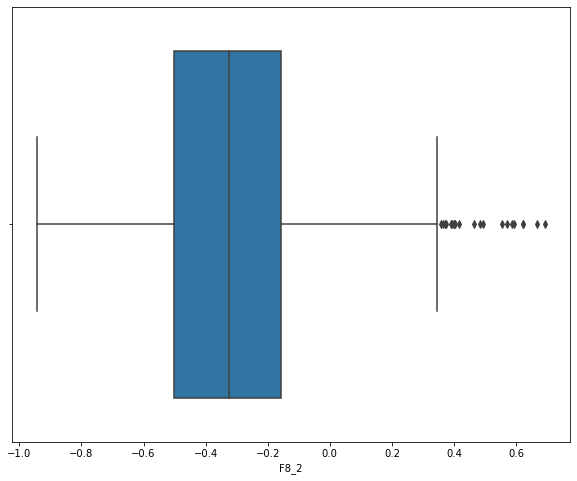

In [81]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F8_2))
print('Kurtosis is: ', stats.kurtosis(df.F8_2))

## Data Distribution
sns.distplot(df.F8_2)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_2)
plt.show()

In [82]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_2 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_2 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_2 < lower_limit) | (df.F8_2 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_2 >= lower_limit) & (df.F8_2 <= upper_limit) ]
df.head()

Q1:  -0.5028333333333335
Q3:  -0.15850000000000025
IQR:  0.3443333333333332
Lower limit is:  -1.0193333333333334
Upper limit is:  0.3579999999999996


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.2339791285123095
Kurtosis after outlier removal is:  -0.22480915963867432


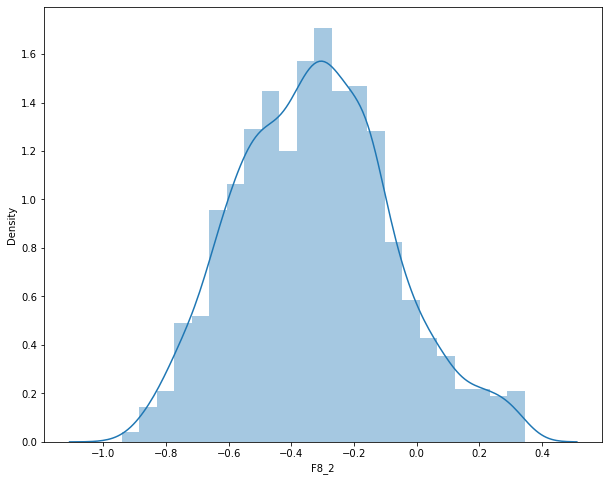

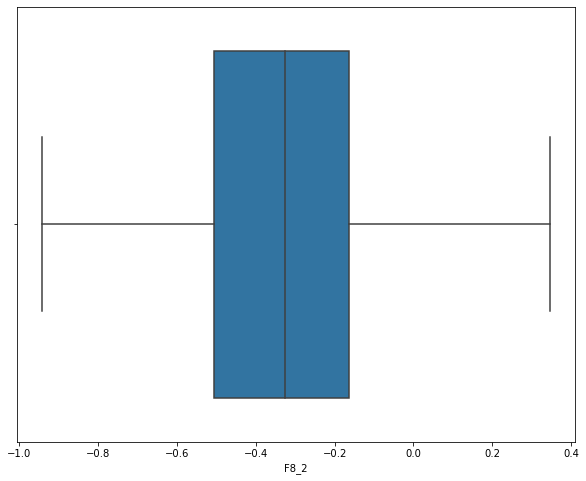

In [83]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F8_2))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F8_2))

## Data Distribution
sns.distplot(df.F8_2)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_2)
plt.show()

### F8_3 Outliers Detection and Removal

Skewness is:  0.3261936503829157
Kurtosis is:  0.21859603221652035


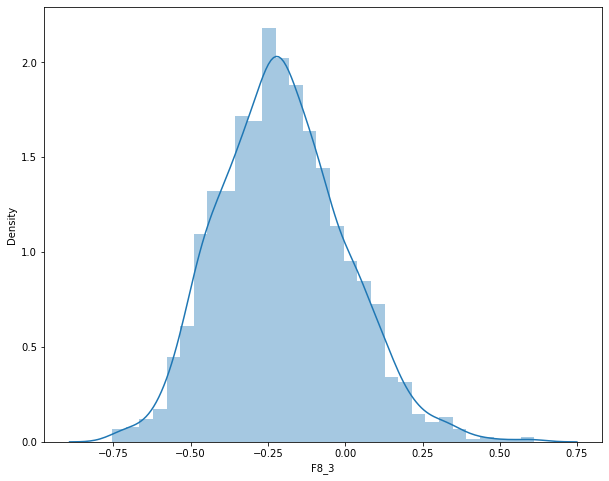

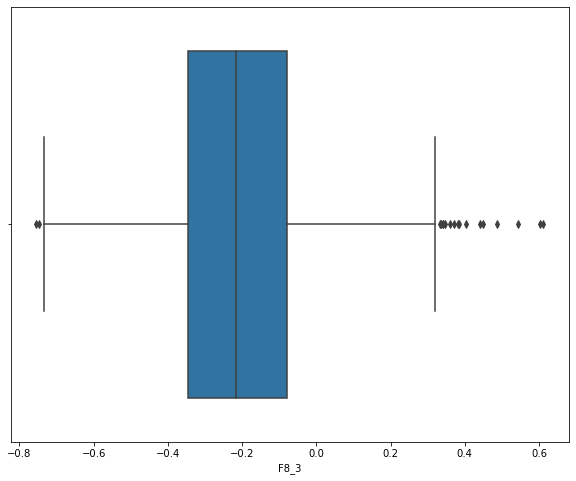

In [84]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F8_3))
print('Kurtosis is: ', stats.kurtosis(df.F8_3))

## Data Distribution
sns.distplot(df.F8_3)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_3)
plt.show()

In [85]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_3 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_3 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_3 < lower_limit) | (df.F8_3 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_3 >= lower_limit) & (df.F8_3 <= upper_limit) ]
df.head()

Q1:  -0.345333333333333
Q3:  -0.079
IQR:  0.266333333333333
Lower limit is:  -0.7448333333333325
Upper limit is:  0.32049999999999945


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

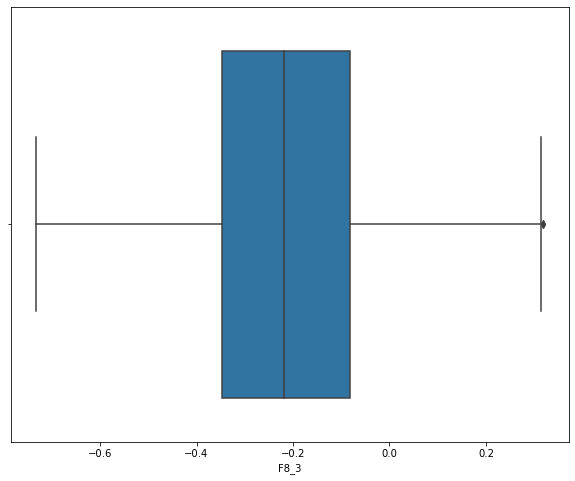

In [86]:
sns.boxplot(df.F8_3)
plt.show()

In [87]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_3 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_3 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_3 < lower_limit) | (df.F8_3 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_3 >= lower_limit) & (df.F8_3 <= upper_limit) ]
df.head()

Q1:  -0.346666666666667
Q3:  -0.0822222222222222
IQR:  0.2644444444444448
Lower limit is:  -0.7433333333333343
Upper limit is:  0.314444444444445


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.13633905217815961
Kurtosis after outlier removal is:  -0.3243952795959033


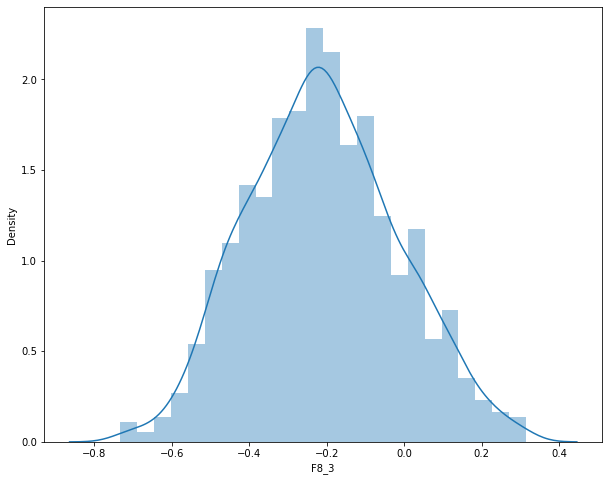

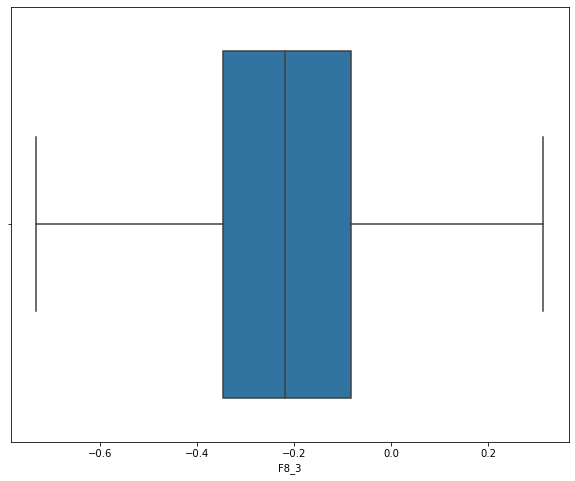

In [88]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F8_3))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F8_3))

## Data Distribution
sns.distplot(df.F8_3)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_3)
plt.show()

### F8_4 Outliers Detection and Removal

Skewness is:  -0.17971666867795463
Kurtosis is:  -0.12693304542634198


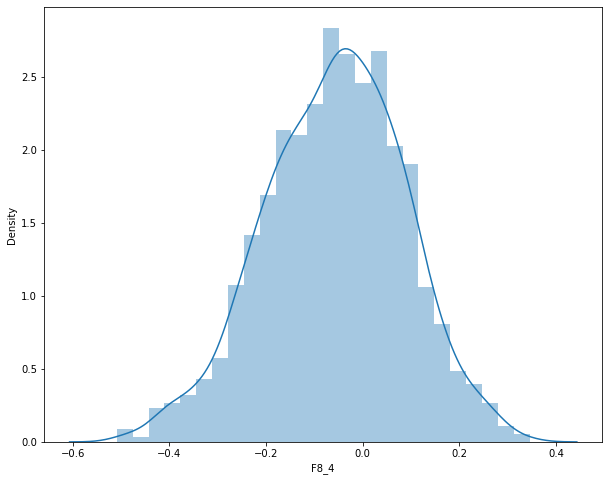

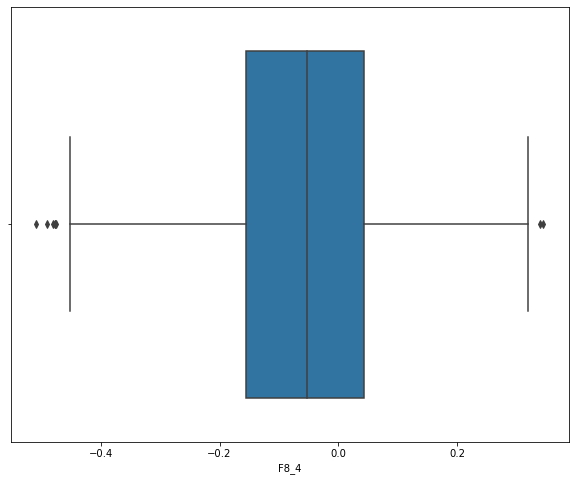

In [89]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F8_4))
print('Kurtosis is: ', stats.kurtosis(df.F8_4))

## Data Distribution
sns.distplot(df.F8_4)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_4)
plt.show()

In [90]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_4 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_4 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_4 < lower_limit) | (df.F8_4 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_4 >= lower_limit) & (df.F8_4 <= upper_limit) ]
df.head()

Q1:  -0.156
Q3:  0.04233333333333335
IQR:  0.19833333333333336
Lower limit is:  -0.4535
Upper limit is:  0.3398333333333334


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

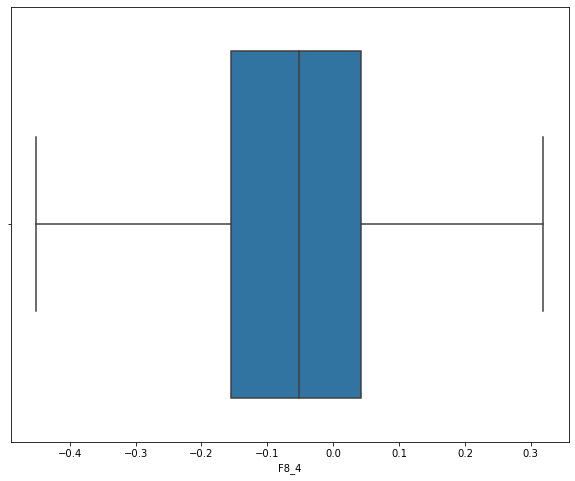

In [91]:
sns.boxplot(df.F8_4)
plt.show()

In [92]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_4 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_4 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_4 < lower_limit) | (df.F8_4 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_4 >= lower_limit) & (df.F8_4 <= upper_limit) ]
df.head()

Q1:  -0.1551666666666665
Q3:  0.04233333333333335
IQR:  0.19749999999999984
Lower limit is:  -0.4514166666666663
Upper limit is:  0.3385833333333331


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.14183966214802066
Kurtosis after outlier removal is:  -0.26396514242090596


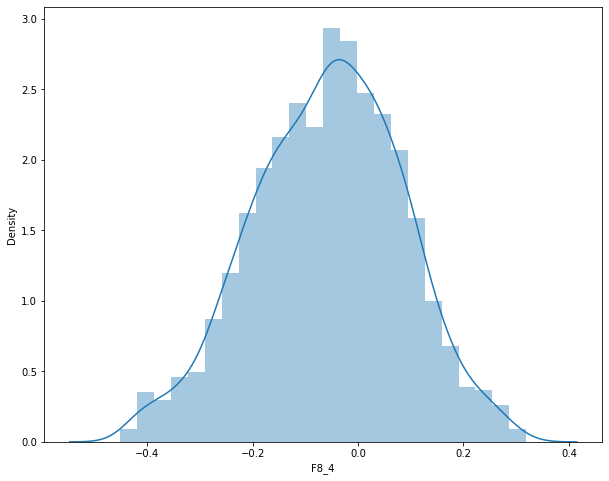

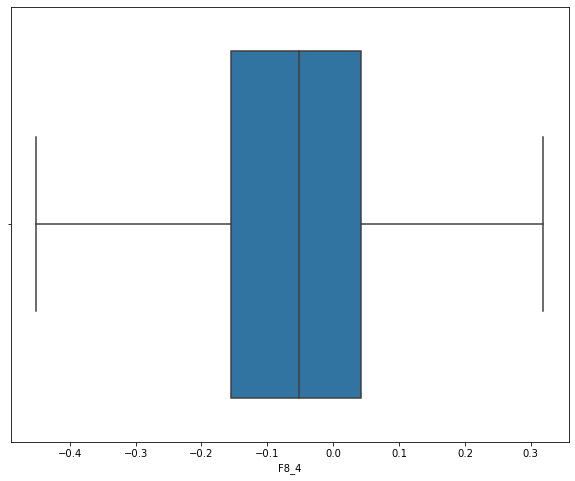

In [93]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F8_4))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F8_4))

## Data Distribution
sns.distplot(df.F8_4)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_4)
plt.show()

### F8_5 Outliers Detection and Removal

Skewness is:  -0.202866187236724
Kurtosis is:  0.559231075157788


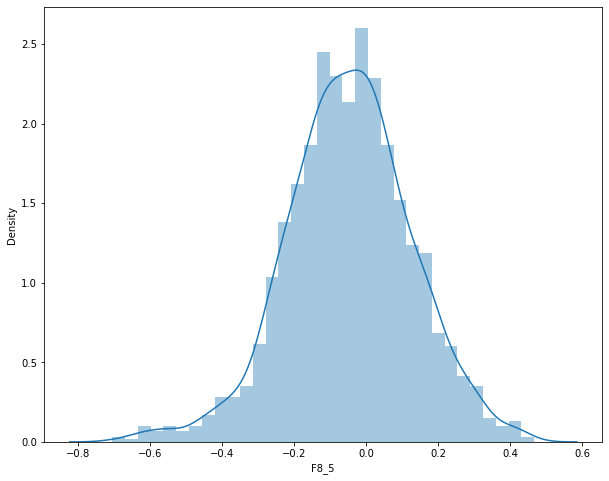

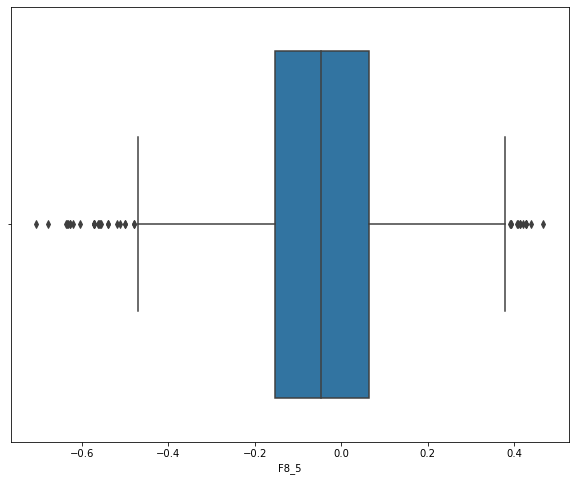

In [94]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F8_5))
print('Kurtosis is: ', stats.kurtosis(df.F8_5))

## Data Distribution
sns.distplot(df.F8_5)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_5)
plt.show()

In [95]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_5 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_5 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_5 < lower_limit) | (df.F8_5 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_5 >= lower_limit) & (df.F8_5 <= upper_limit) ]
df.head()

Q1:  -0.153333333333333
Q3:  0.06366666666666665
IQR:  0.21699999999999964
Lower limit is:  -0.47883333333333244
Upper limit is:  0.3891666666666661


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

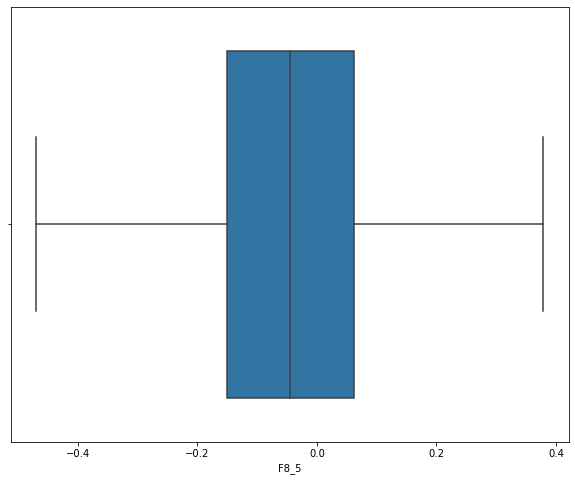

In [96]:
sns.boxplot(df.F8_5)
plt.show()

In [97]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_5 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_5 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_5 < lower_limit) | (df.F8_5 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_5 >= lower_limit) & (df.F8_5 <= upper_limit) ]
df.head()

Q1:  -0.151111111111111
Q3:  0.062
IQR:  0.213111111111111
Lower limit is:  -0.4707777777777775
Upper limit is:  0.3816666666666665


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.015342235374520922
Kurtosis after outlier removal is:  -0.23377250669105898


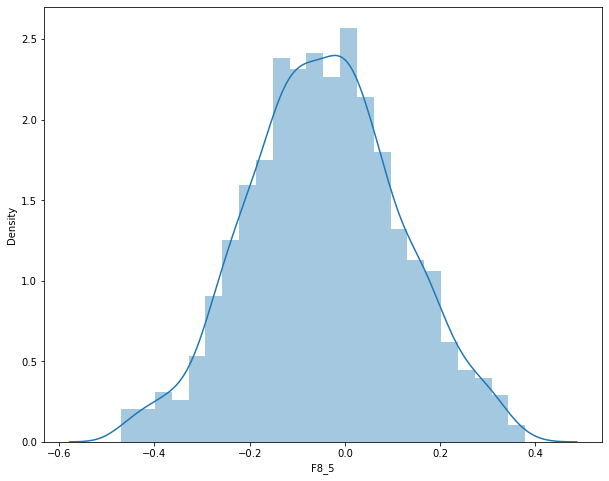

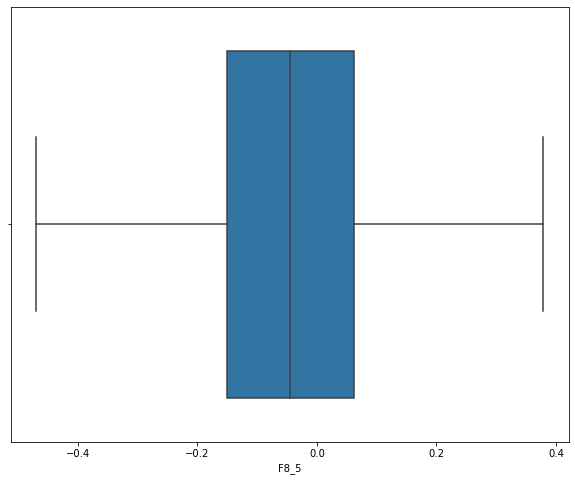

In [98]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F8_5))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F8_5))

## Data Distribution
sns.distplot(df.F8_5)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_5)
plt.show()

### F8_6 Outliers Detection and Removal

Skewness is:  -0.49369851780438734
Kurtosis is:  0.20510356562158494


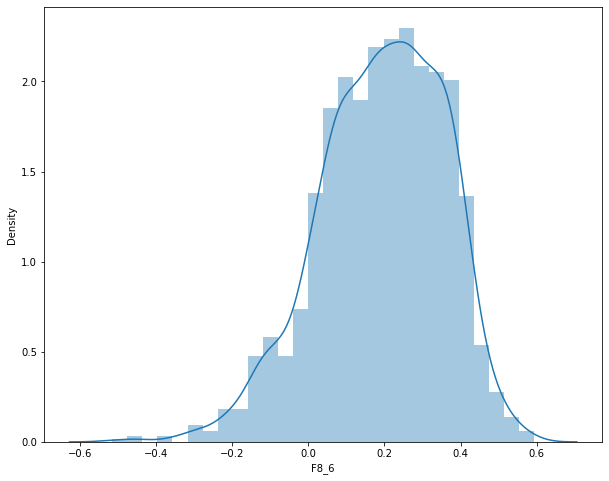

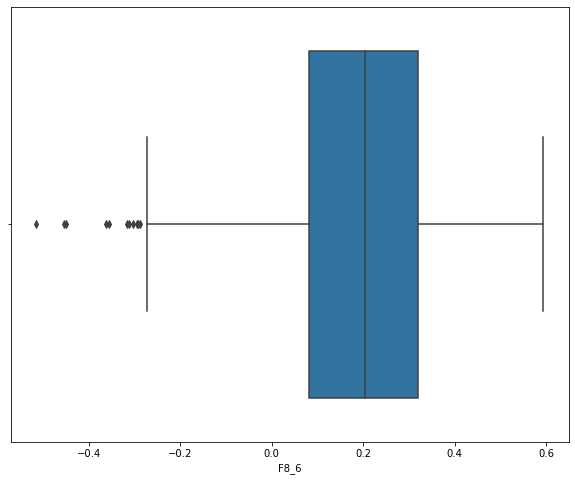

In [99]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F8_6))
print('Kurtosis is: ', stats.kurtosis(df.F8_6))

## Data Distribution
sns.distplot(df.F8_6)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_6)
plt.show()

In [100]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_6 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_6 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_6 < lower_limit) | (df.F8_6 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_6 >= lower_limit) & (df.F8_6 <= upper_limit) ]
df.head()

Q1:  0.0813333333333333
Q3:  0.319333333333333
IQR:  0.2379999999999997
Lower limit is:  -0.2756666666666662
Upper limit is:  0.6763333333333326


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

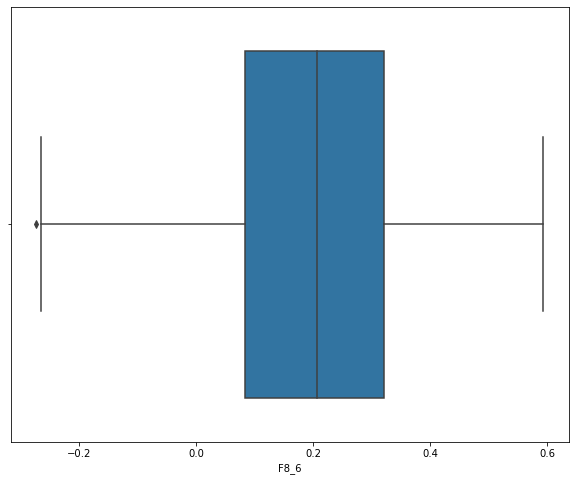

In [101]:
sns.boxplot(df.F8_6)
plt.show()

In [102]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_6 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_6 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_6 < lower_limit) | (df.F8_6 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_6 >= lower_limit) & (df.F8_6 <= upper_limit) ]
df.head()

Q1:  0.0833333333333333
Q3:  0.32050000000000023
IQR:  0.23716666666666691
Lower limit is:  -0.27241666666666703
Upper limit is:  0.6762500000000006


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.3157637712539305
Kurtosis after outlier removal is:  -0.3670999983274177


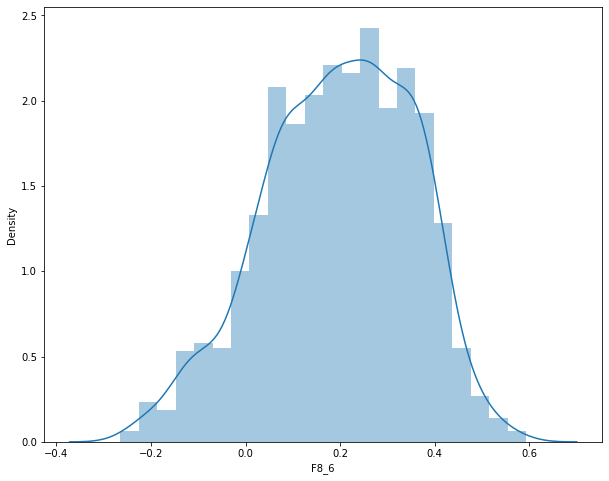

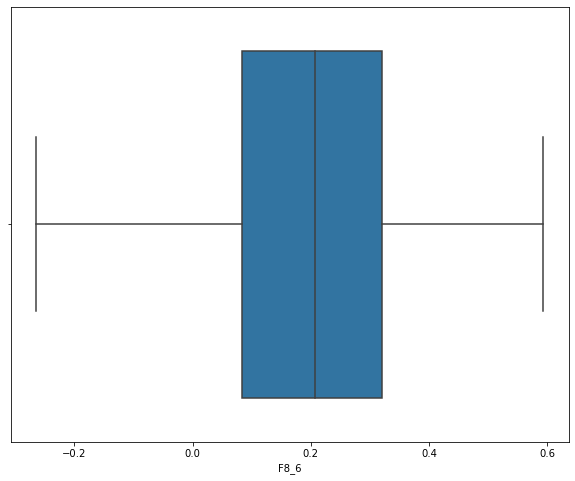

In [103]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F8_6))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F8_6))

## Data Distribution
sns.distplot(df.F8_6)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_6)
plt.show()

### F8_7 Outliers Detection and Removal

Skewness is:  -0.4190293159078972
Kurtosis is:  0.2553025142562304


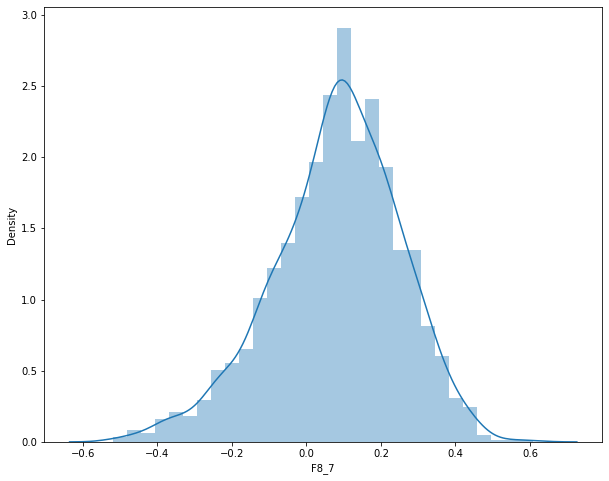

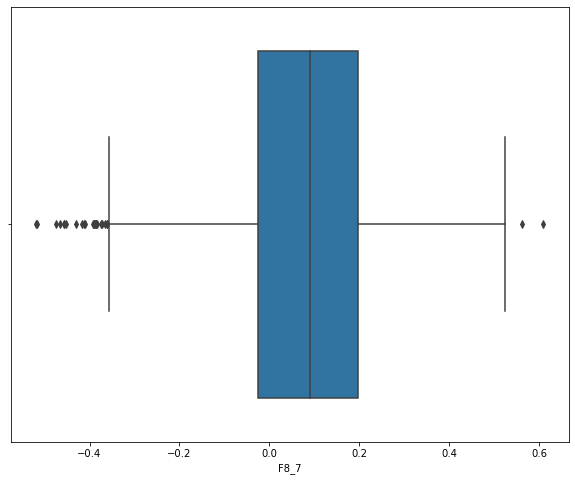

In [104]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F8_7))
print('Kurtosis is: ', stats.kurtosis(df.F8_7))

## Data Distribution
sns.distplot(df.F8_7)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_7)
plt.show()

In [105]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_7 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_7 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_7 < lower_limit) | (df.F8_7 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_7 >= lower_limit) & (df.F8_7 <= upper_limit) ]
df.head()

Q1:  -0.0244444444444445
Q3:  0.197333333333333
IQR:  0.2217777777777775
Lower limit is:  -0.3571111111111107
Upper limit is:  0.5299999999999992


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

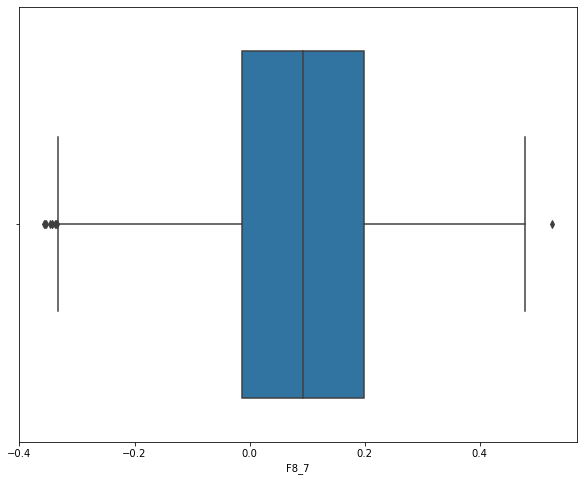

In [106]:
sns.boxplot(df.F8_7)
plt.show()

- Few Outliers are detected.

In [107]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_7 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_7 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_7 < lower_limit) | (df.F8_7 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_7 >= lower_limit) & (df.F8_7 <= upper_limit) ]
df.head()

Q1:  -0.013999999999999999
Q3:  0.19911111111111102
IQR:  0.21311111111111103
Lower limit is:  -0.33366666666666656
Upper limit is:  0.5187777777777776


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

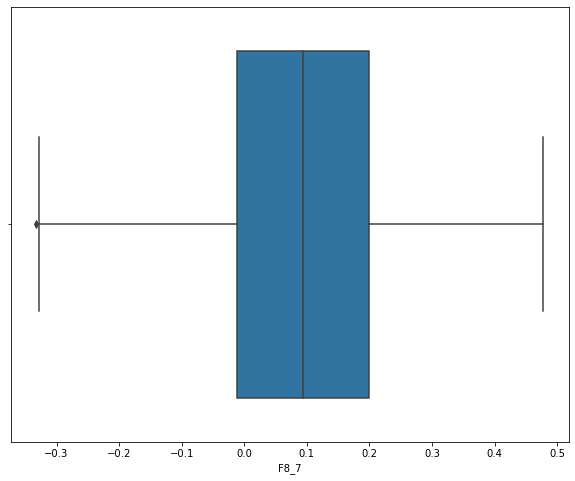

In [108]:
sns.boxplot(df.F8_7)
plt.show()

In [109]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_7 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_7 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_7 < lower_limit) | (df.F8_7 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_7 >= lower_limit) & (df.F8_7 <= upper_limit) ]
df.head()

Q1:  -0.012
Q3:  0.2
IQR:  0.21200000000000002
Lower limit is:  -0.33000000000000007
Upper limit is:  0.518


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.18639764682494264
Kurtosis after outlier removal is:  -0.3171016880355655


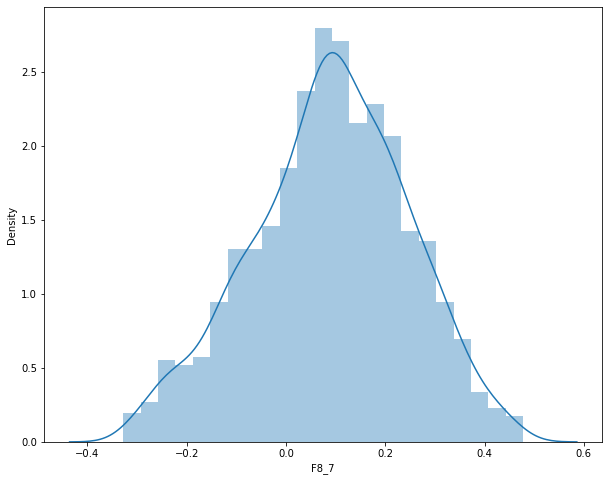

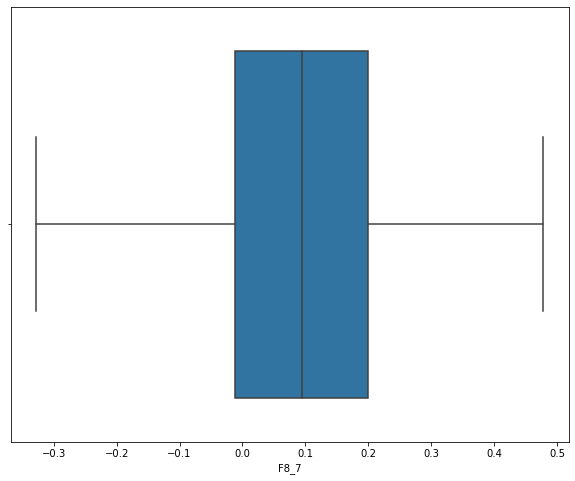

In [110]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F8_7))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F8_7))

## Data Distribution
sns.distplot(df.F8_7)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_7)
plt.show()

### F8_8 Outliers Detection and Removal

Skewness is:  -0.5311072722688378
Kurtosis is:  0.44002653929338376


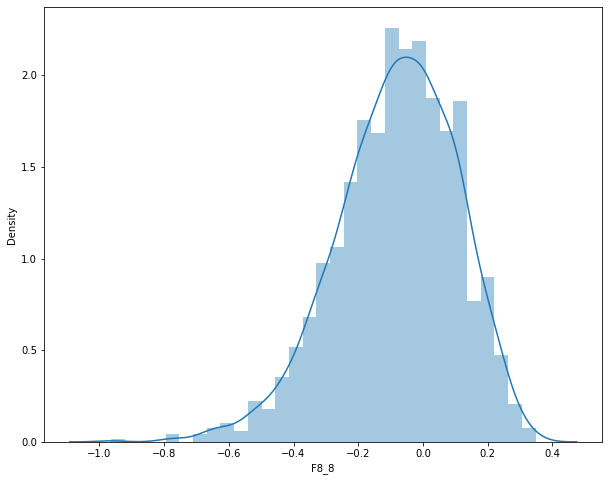

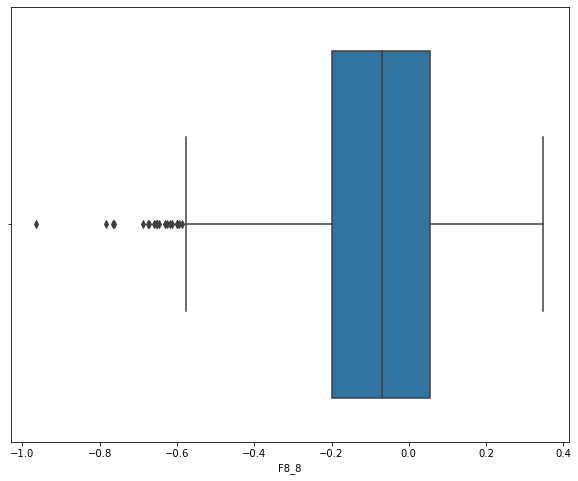

In [111]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F8_8))
print('Kurtosis is: ', stats.kurtosis(df.F8_8))

## Data Distribution
sns.distplot(df.F8_8)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_8)
plt.show()

In [112]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_8 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_8 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_8 < lower_limit) | (df.F8_8 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_8 >= lower_limit) & (df.F8_8 <= upper_limit) ]
df.head()

Q1:  -0.1988333333333335
Q3:  0.0546666666666667
IQR:  0.25350000000000017
Lower limit is:  -0.5790833333333337
Upper limit is:  0.43491666666666695


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

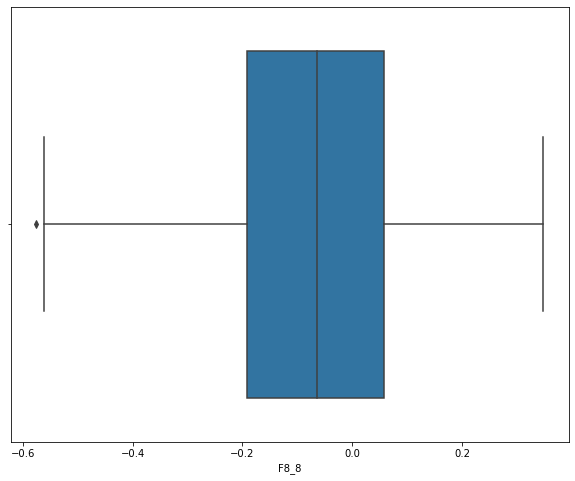

In [113]:
sns.boxplot(df.F8_8)
plt.show()

- A few Outliers are Detected.

In [114]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_8 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_8 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_8 < lower_limit) | (df.F8_8 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_8 >= lower_limit) & (df.F8_8 <= upper_limit) ]
df.head()

Q1:  -0.192666666666667
Q3:  0.0573333333333333
IQR:  0.25000000000000033
Lower limit is:  -0.5676666666666675
Upper limit is:  0.4323333333333338


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.2618154791909895
Kurtosis after outlier removal is:  -0.36767144990164713


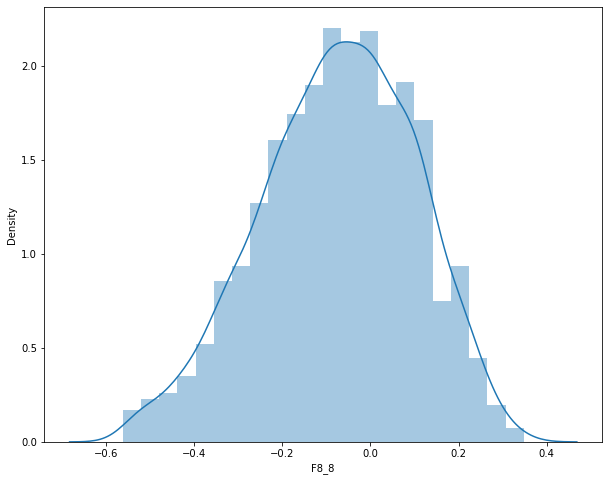

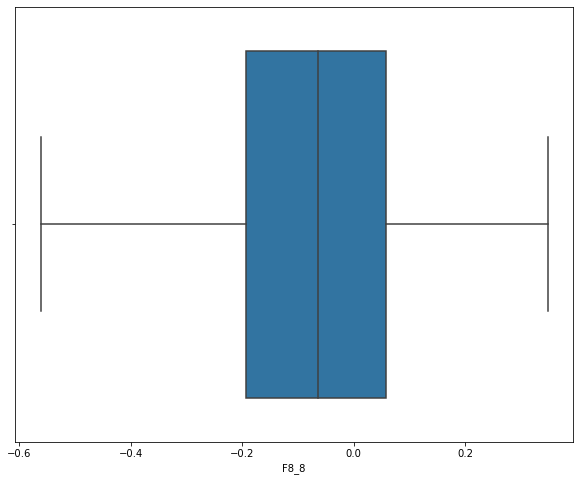

In [115]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F8_8))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F8_8))

## Data Distribution
sns.distplot(df.F8_8)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_8)
plt.show()

### F8_9 Outliers Detection and Removal

Skewness is:  0.22017279143580656
Kurtosis is:  0.018703984686075703


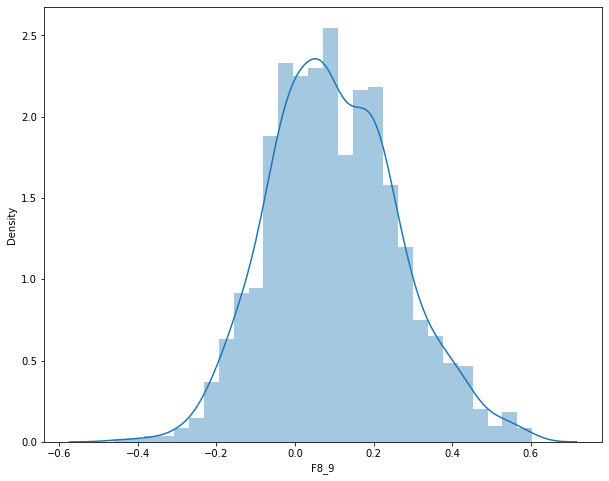

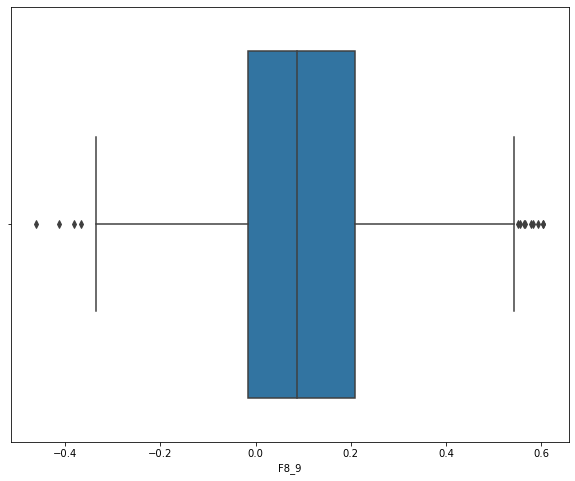

In [116]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F8_9))
print('Kurtosis is: ', stats.kurtosis(df.F8_9))

## Data Distribution
sns.distplot(df.F8_9)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_9)
plt.show()

In [117]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_9 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_9 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_9 < lower_limit) | (df.F8_9 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_9 >= lower_limit) & (df.F8_9 <= upper_limit) ]
df.head()

Q1:  -0.016
Q3:  0.2088333333333335
IQR:  0.2248333333333335
Lower limit is:  -0.3532500000000003
Upper limit is:  0.5460833333333338


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.19933771614423082
Kurtosis after outlier removal is:  -0.25022657639585244


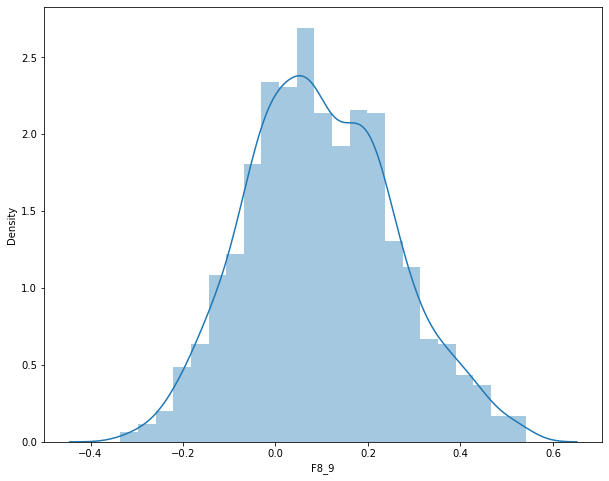

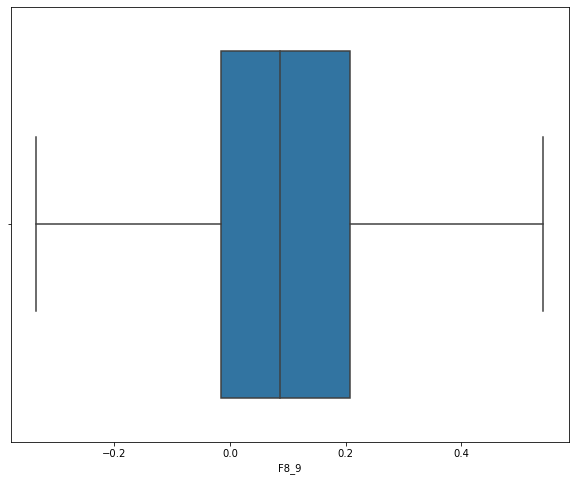

In [118]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F8_9))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F8_9))

## Data Distribution
sns.distplot(df.F8_9)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_9)
plt.show()

### F8_10 Outliers Detection and Removal

Skewness is:  -0.22478214313657263
Kurtosis is:  -0.3852729244177713


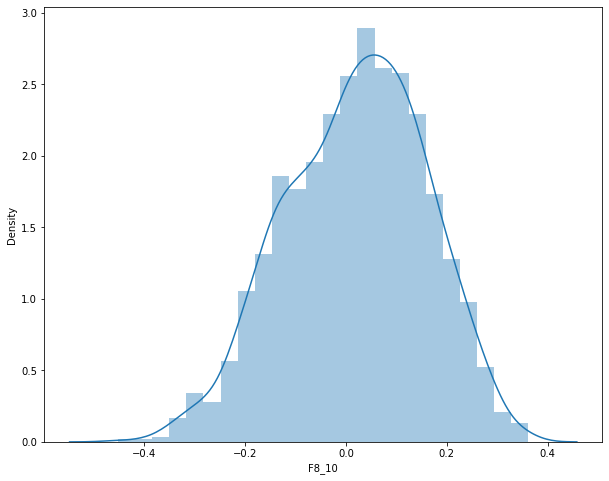

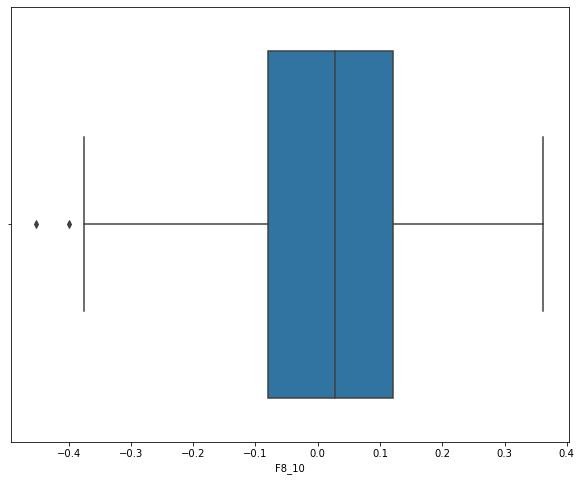

In [119]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F8_10))
print('Kurtosis is: ', stats.kurtosis(df.F8_10))

## Data Distribution
sns.distplot(df.F8_10)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_10)
plt.show()

In [120]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F8_10 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F8_10 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F8_10 < lower_limit) | (df.F8_10 > upper_limit) ]
## Removing Outliers
df = df [ (df.F8_10 >= lower_limit) & (df.F8_10 <= upper_limit) ]
df.head()

Q1:  -0.0805
Q3:  0.1203333333333335
IQR:  0.2008333333333335
Lower limit is:  -0.38175000000000026
Upper limit is:  0.42158333333333375


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
5      1  1434.56574   78.000000  57.233333  0.289333  0.456000 -0.015333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
5 -0.080000 -0.460000 -0.404667  ...   0.000   6.667 -1.459333  0.074000   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
5  0.257333 -0.294667 -0.455333  0.176667  0.305333  0.110667  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.19842667974621478
Kurtosis after outlier removal is:  -0.4555277310564074


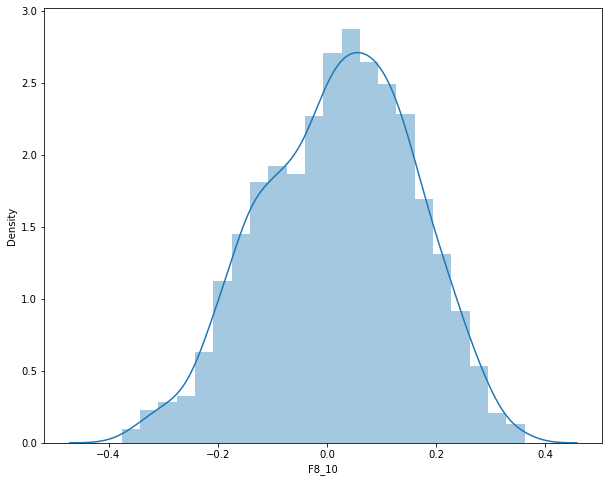

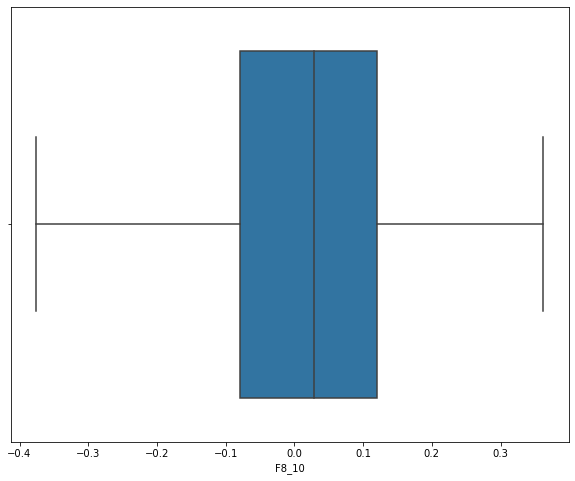

In [121]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F8_10))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F8_10))

## Data Distribution
sns.distplot(df.F8_10)
plt.show()

## Outliers Detection
sns.boxplot(df.F8_10)
plt.show()

### F9_1 Outliers Detection and Removal

Skewness is:  -0.01269073189160414
Kurtosis is:  -0.46691235516166874


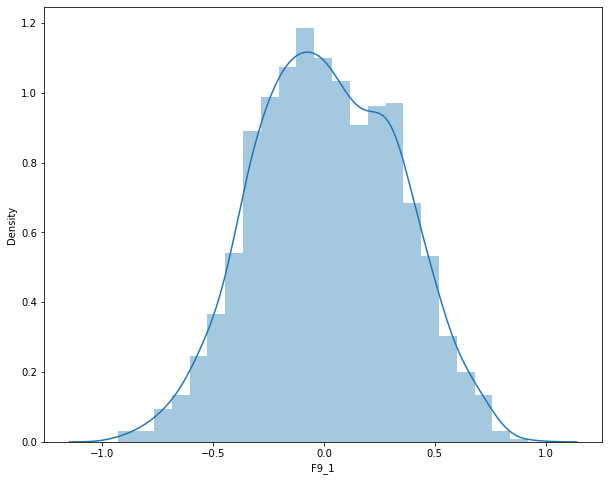

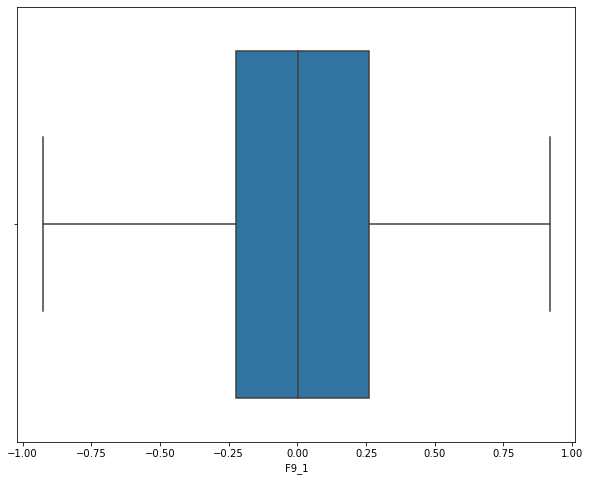

In [122]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F9_1))
print('Kurtosis is: ', stats.kurtosis(df.F9_1))

## Data Distribution
sns.distplot(df.F9_1)
plt.show()

## Outliers Detection
sns.boxplot(df.F9_1)
plt.show()

### F9_2 Outliers Detection and Removal

Skewness is:  -0.25768018702952067
Kurtosis is:  0.0658134849517591


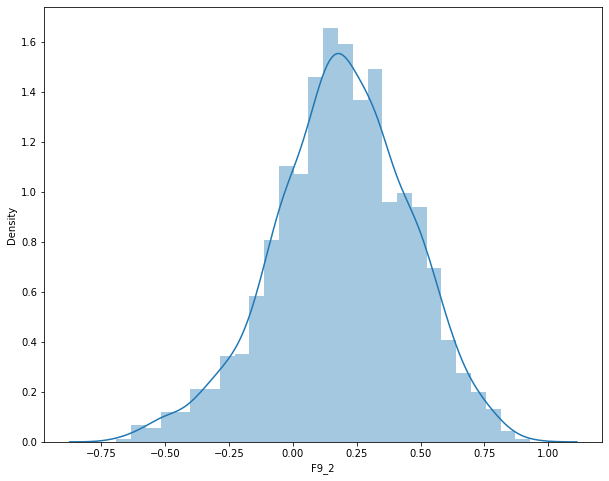

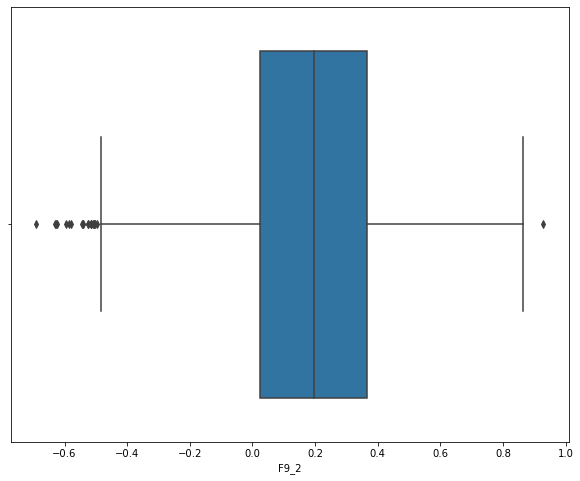

In [123]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F9_2))
print('Kurtosis is: ', stats.kurtosis(df.F9_2))

## Data Distribution
sns.distplot(df.F9_2)
plt.show()

## Outliers Detection
sns.boxplot(df.F9_2)
plt.show()

In [124]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F9_2 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F9_2 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F9_2 < lower_limit) | (df.F9_2 > upper_limit) ]
## Removing Outliers
df = df [ (df.F9_2 >= lower_limit) & (df.F9_2 <= upper_limit) ]
df.head()

Q1:  0.0232
Q3:  0.366866666666667
IQR:  0.343666666666667
Lower limit is:  -0.4923000000000005
Upper limit is:  0.8823666666666675


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
1      1  1588.79864   43.125000  35.856250  0.913750  0.263125 -0.215000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
1 -0.081250 -0.160625  0.064375  ...   6.250   6.250 -1.417500  0.362500   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
1  0.385000 -0.430625 -0.420000 -0.298125  0.476875  0.135000  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  

[5 rows x 43 columns]

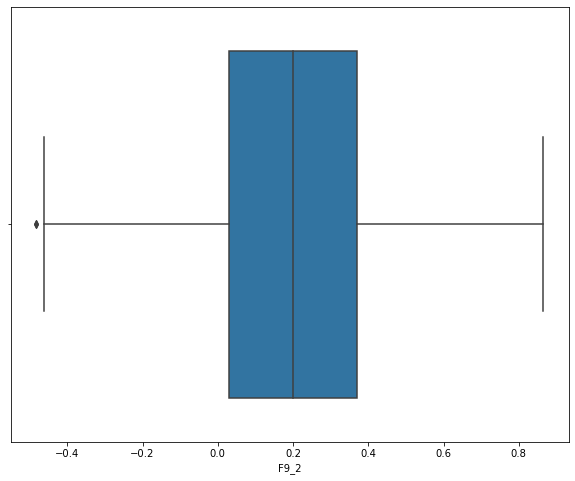

In [125]:
sns.boxplot(df.F9_2)
plt.show()

- A few Outliers are detected.

In [126]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F9_2 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F9_2 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F9_2 < lower_limit) | (df.F9_2 > upper_limit) ]
## Removing Outliers
df = df [ (df.F9_2 >= lower_limit) & (df.F9_2 <= upper_limit) ]
df.head()

Q1:  0.0292666666666667
Q3:  0.36918333333333325
IQR:  0.33991666666666653
Lower limit is:  -0.48060833333333314
Upper limit is:  0.879058333333333


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.07682054982361301
Kurtosis after outlier removal is:  -0.2802741310993935


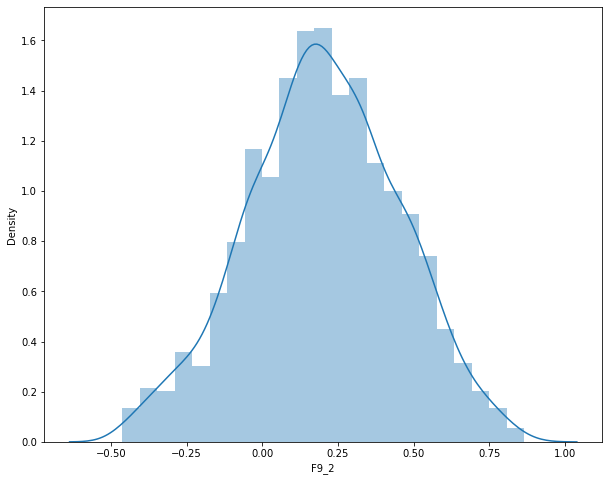

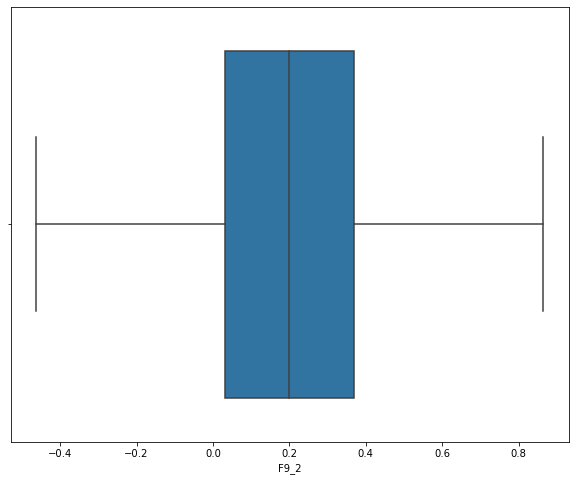

In [127]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F9_2))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F9_2))

## Data Distribution
sns.distplot(df.F9_2)
plt.show()

## Outliers Detection
sns.boxplot(df.F9_2)
plt.show()

### F9_3 Outliers Detection and Removal

Skewness is:  -0.04918431635483125
Kurtosis is:  -0.10972338742535648


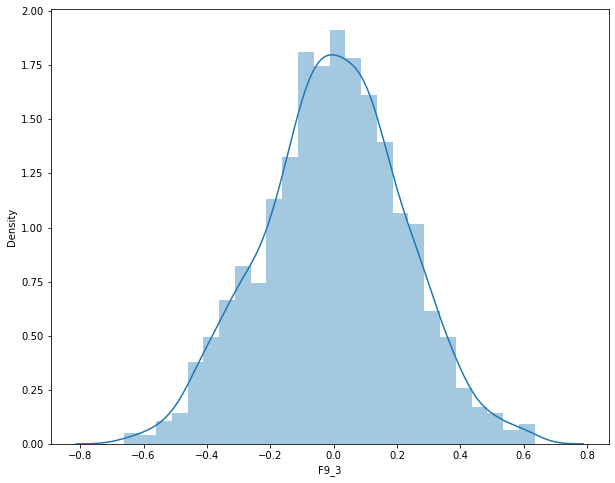

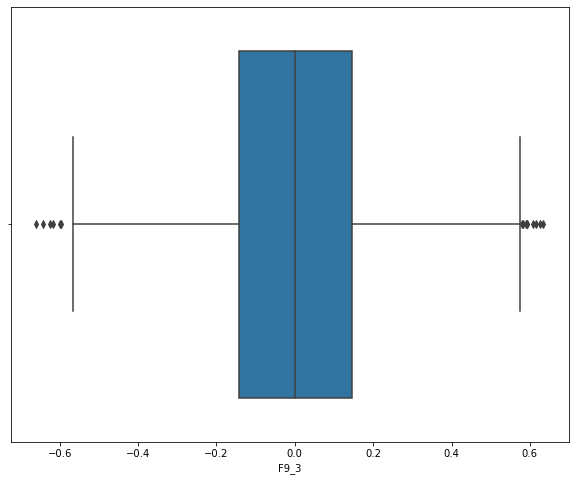

In [128]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F9_3))
print('Kurtosis is: ', stats.kurtosis(df.F9_3))

## Data Distribution
sns.distplot(df.F9_3)
plt.show()

## Outliers Detection
sns.boxplot(df.F9_3)
plt.show()

In [129]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F9_3 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F9_3 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F9_3 < lower_limit) | (df.F9_3 > upper_limit) ]
## Removing Outliers
df = df [ (df.F9_3 >= lower_limit) & (df.F9_3 <= upper_limit) ]
df.head()

Q1:  -0.14211666666666625
Q3:  0.14648333333333324
IQR:  0.2885999999999995
Lower limit is:  -0.5750166666666655
Upper limit is:  0.5793833333333325


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.07576605191948874
Kurtosis after outlier removal is:  -0.3209870696172743


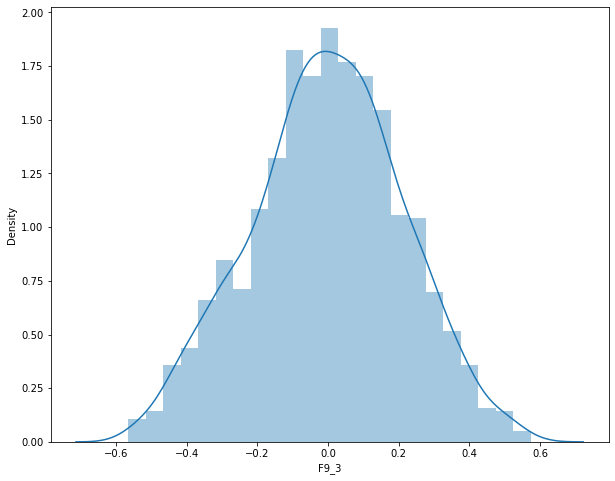

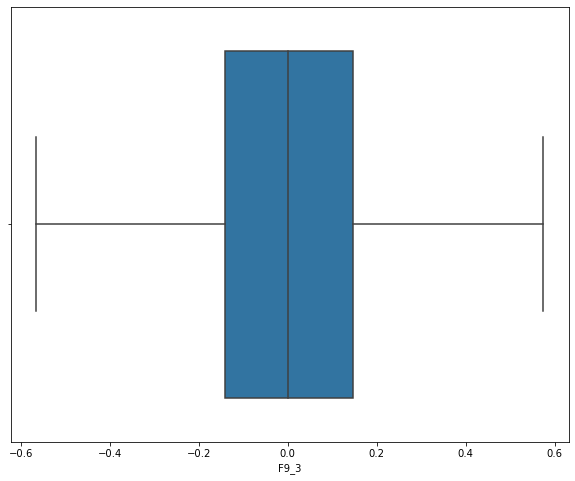

In [130]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F9_3))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F9_3))

## Data Distribution
sns.distplot(df.F9_3)
plt.show()

## Outliers Detection
sns.boxplot(df.F9_3)
plt.show()

### F9_4 Outliers Detection and Removal

Skewness is:  -0.04015785097799952
Kurtosis is:  -0.04175144644020401


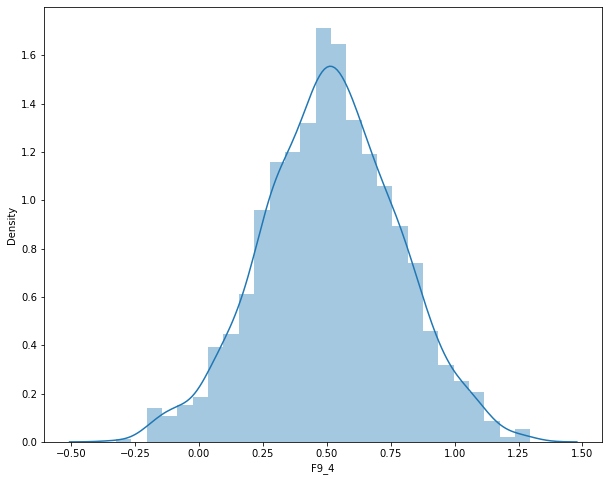

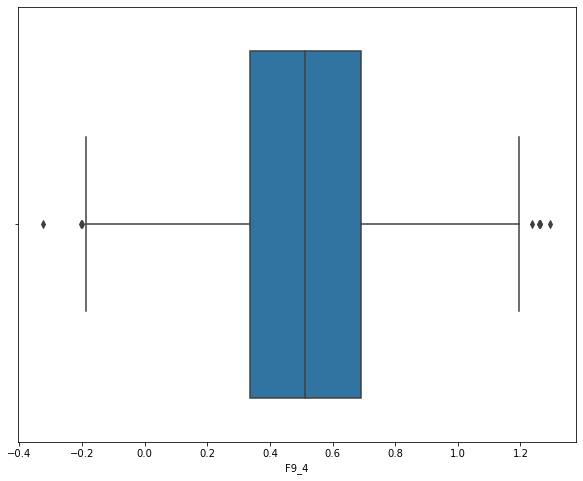

In [131]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F9_4))
print('Kurtosis is: ', stats.kurtosis(df.F9_4))

## Data Distribution
sns.distplot(df.F9_4)
plt.show()

## Outliers Detection
sns.boxplot(df.F9_4)
plt.show()

In [132]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F9_4 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F9_4 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F9_4 < lower_limit) | (df.F9_4 > upper_limit) ]
## Removing Outliers
df = df [ (df.F9_4 >= lower_limit) & (df.F9_4 <= upper_limit) ]
df.head()

Q1:  0.3360666666666665
Q3:  0.690211111111111
IQR:  0.3541444444444445
Lower limit is:  -0.19515000000000016
Upper limit is:  1.2214277777777776


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.06149540084415207
Kurtosis after outlier removal is:  -0.17517964684351117


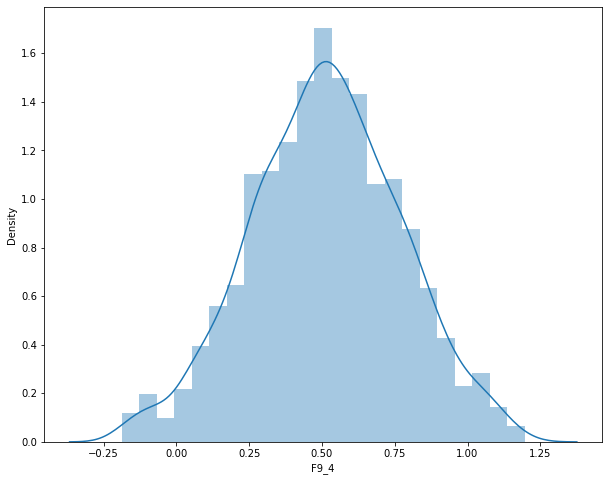

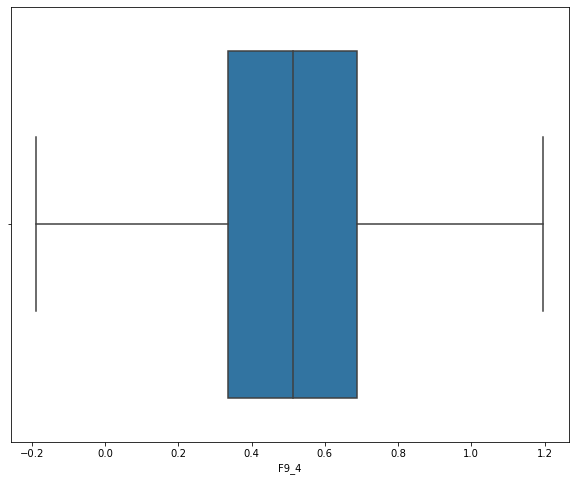

In [133]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F9_4))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F9_4))

## Data Distribution
sns.distplot(df.F9_4)
plt.show()

## Outliers Detection
sns.boxplot(df.F9_4)
plt.show()

### F9_5 Outliers Detection and Removal

Skewness is:  0.6050623464340223
Kurtosis is:  -0.06583493458658074


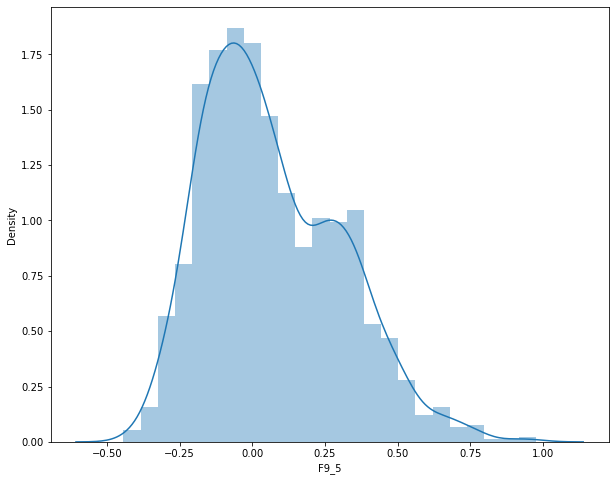

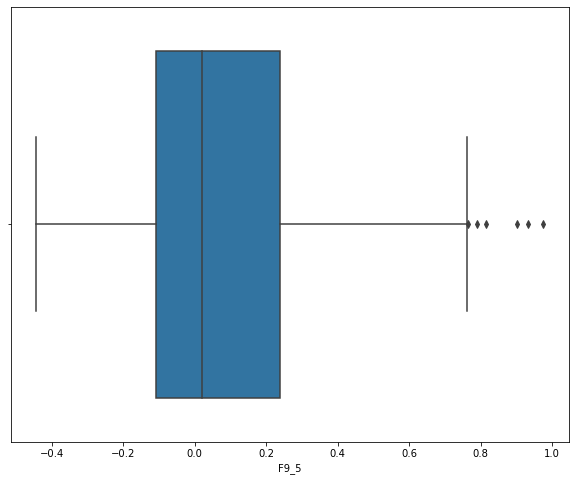

In [134]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F9_5))
print('Kurtosis is: ', stats.kurtosis(df.F9_5))

## Data Distribution
sns.distplot(df.F9_5)
plt.show()

## Outliers Detection
sns.boxplot(df.F9_5)
plt.show()

In [135]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F9_5 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F9_5 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F9_5 < lower_limit) | (df.F9_5 > upper_limit) ]
## Removing Outliers
df = df [ (df.F9_5 >= lower_limit) & (df.F9_5 <= upper_limit) ]
df.head()

Q1:  -0.109422222222222
Q3:  0.2398
IQR:  0.349222222222222
Lower limit is:  -0.6332555555555549
Upper limit is:  0.7636333333333329


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  

[5 rows x 43 columns]

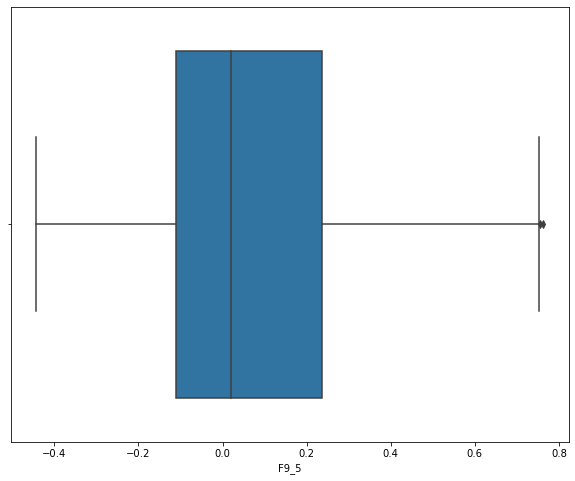

In [136]:
sns.boxplot(df.F9_5)
plt.show()

- A few Outliers are detected.

In [137]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F9_5 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F9_5 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F9_5 < lower_limit) | (df.F9_5 > upper_limit) ]
## Removing Outliers
df = df [ (df.F9_5 >= lower_limit) & (df.F9_5 <= upper_limit) ]
df.head()

Q1:  -0.109933333333333
Q3:  0.2358
IQR:  0.345733333333333
Lower limit is:  -0.6285333333333325
Upper limit is:  0.7543999999999995


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.5063784474547078
Kurtosis after outlier removal is:  -0.3971246241297801


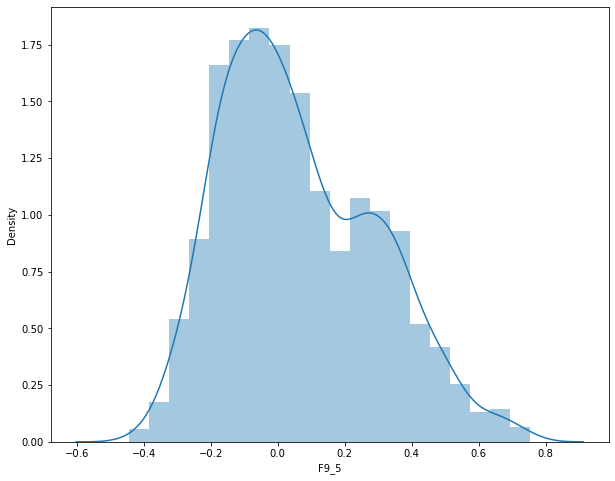

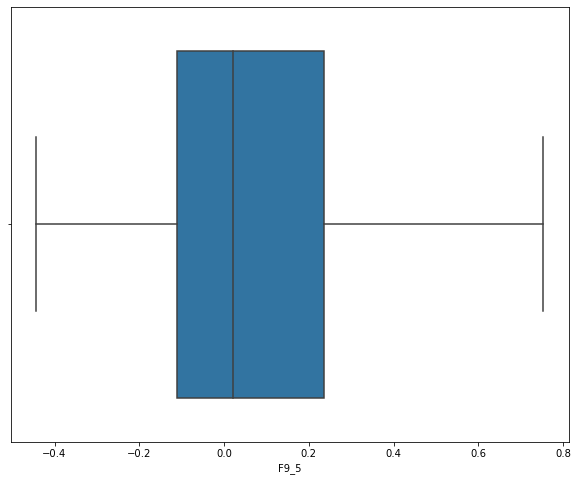

In [138]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F9_5))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F9_5))

## Data Distribution
sns.distplot(df.F9_5)
plt.show()

## Outliers Detection
sns.boxplot(df.F9_5)
plt.show()

### F9_6 Outliers Detection and Removal

Skewness is:  0.29152717841852244
Kurtosis is:  -0.022090520389860924


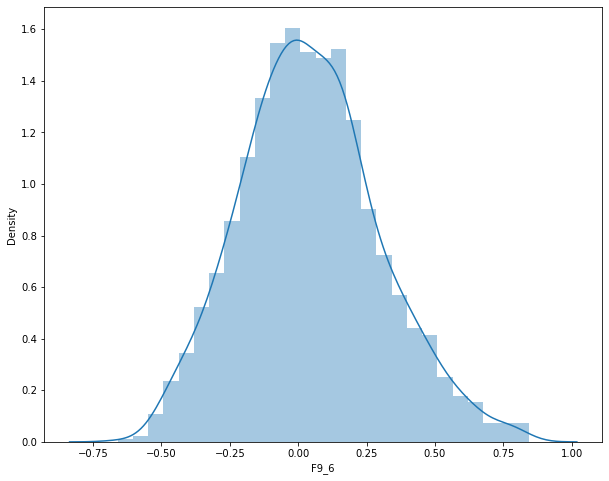

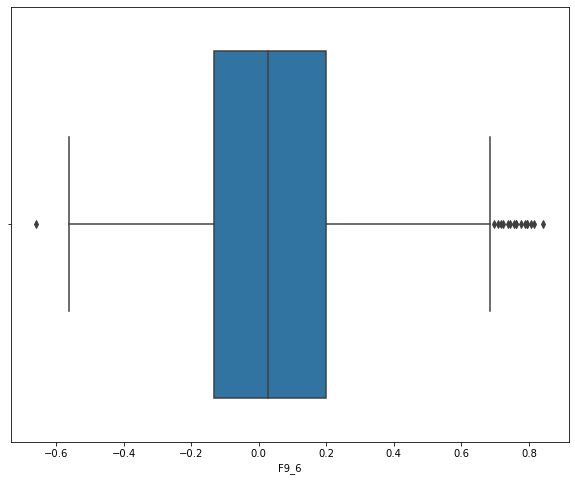

In [139]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F9_6))
print('Kurtosis is: ', stats.kurtosis(df.F9_6))

## Data Distribution
sns.distplot(df.F9_6)
plt.show()

## Outliers Detection
sns.boxplot(df.F9_6)
plt.show()

In [140]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F9_6 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F9_6 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F9_6 < lower_limit) | (df.F9_6 > upper_limit) ]
## Removing Outliers
df = df [ (df.F9_6 >= lower_limit) & (df.F9_6 <= upper_limit) ]
df.head()

Q1:  -0.1316666666666665
Q3:  0.19958888888888898
IQR:  0.33125555555555547
Lower limit is:  -0.6285499999999997
Upper limit is:  0.6964722222222222


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.1603082975305519
Kurtosis after outlier removal is:  -0.30237208242201996


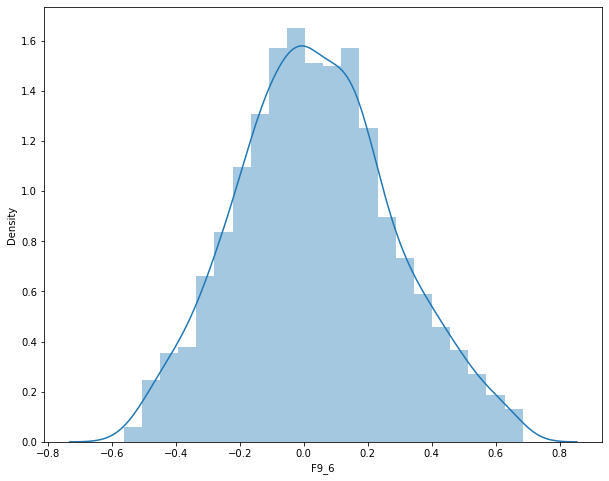

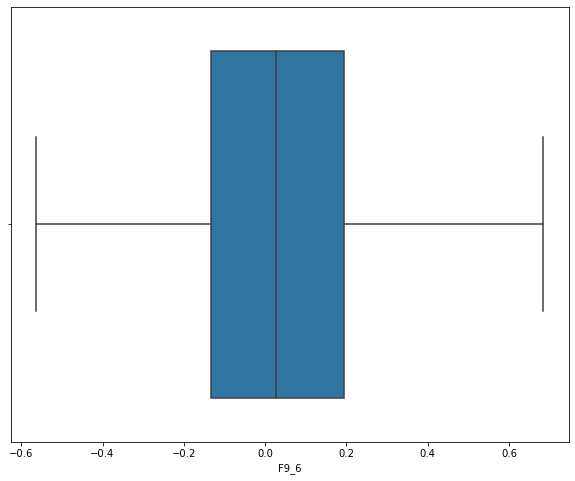

In [141]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F9_6))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F9_6))

## Data Distribution
sns.distplot(df.F9_6)
plt.show()

## Outliers Detection
sns.boxplot(df.F9_6)
plt.show()

### F10_1 Outliers Detection and Removal

Skewness is:  0.16389044806158662
Kurtosis is:  -0.16096510922330065


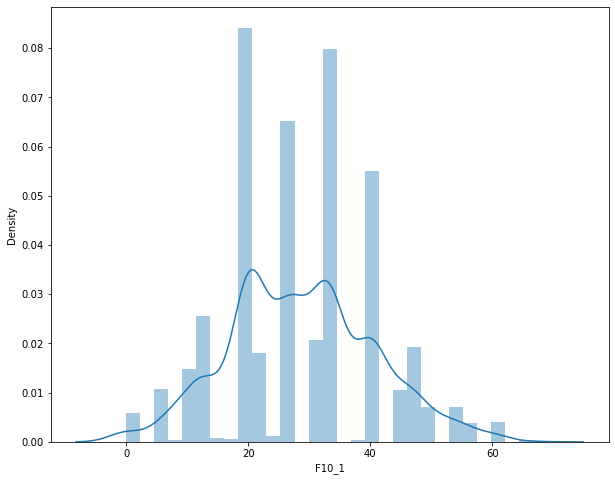

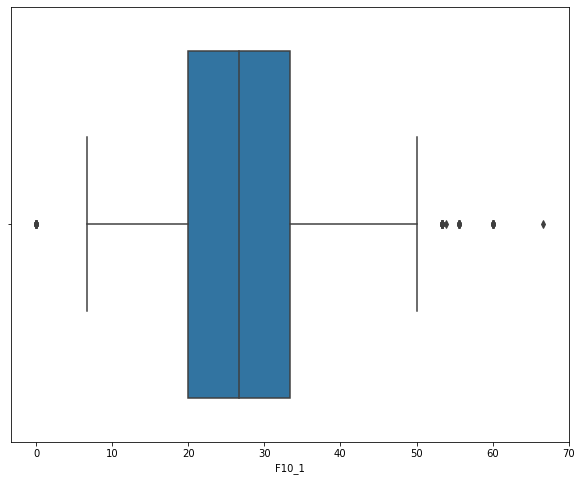

In [142]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F10_1))
print('Kurtosis is: ', stats.kurtosis(df.F10_1))

## Data Distribution
sns.distplot(df.F10_1)
plt.show()

## Outliers Detection
sns.boxplot(df.F10_1)
plt.show()

In [143]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F10_1 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F10_1 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F10_1 < lower_limit) | (df.F10_1 > upper_limit) ]
## Removing Outliers
df = df [ (df.F10_1 >= lower_limit) & (df.F10_1 <= upper_limit) ]
df.head()

Q1:  20.0
Q3:  33.333
IQR:  13.332999999999998
Lower limit is:  0.0005000000000023874
Upper limit is:  53.332499999999996


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.03819373685130635
Kurtosis after outlier removal is:  -0.6723103601824207


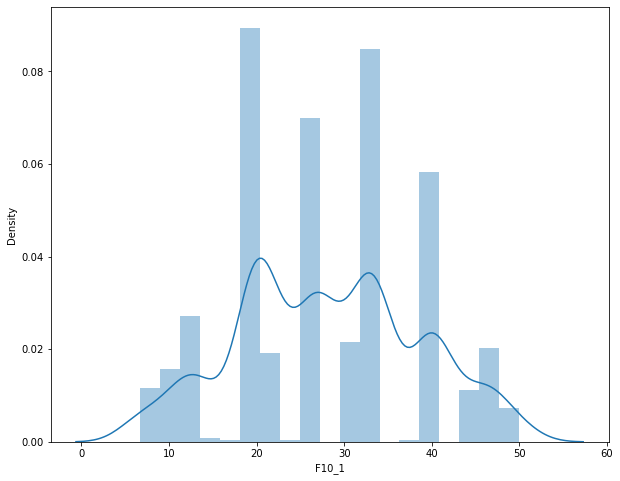

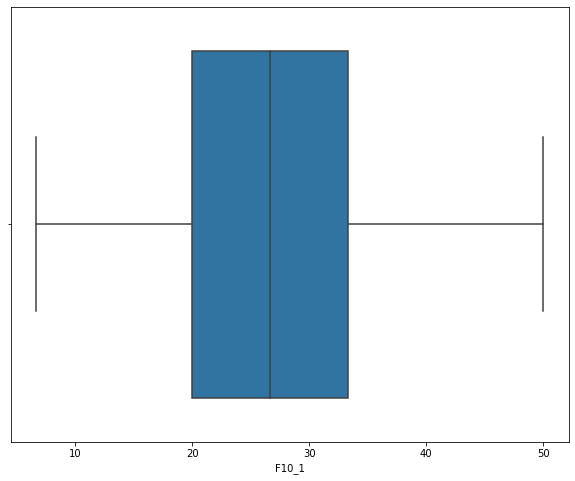

In [144]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F10_1))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F10_1))

## Data Distribution
sns.distplot(df.F10_1)
plt.show()

## Outliers Detection
sns.boxplot(df.F10_1)
plt.show()

### F10_2 Outliers Detection and Removal

Skewness is:  0.11441197348031848
Kurtosis is:  -0.5304610491449706


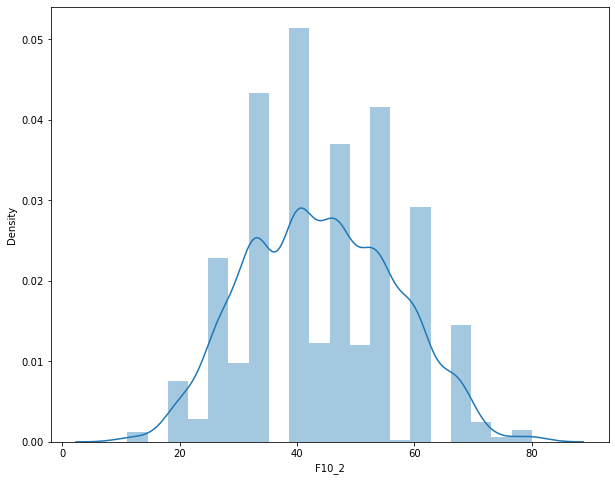

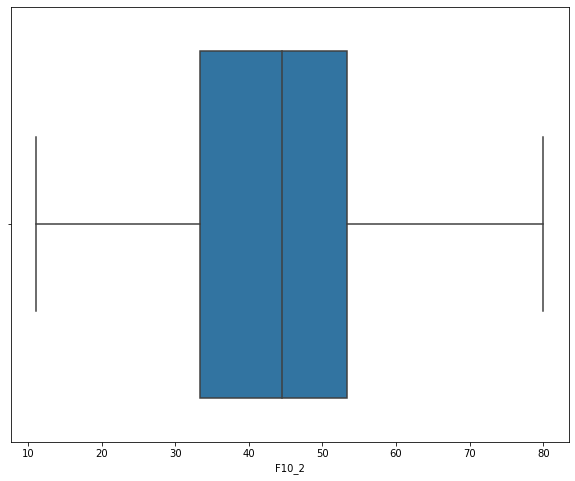

In [145]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F10_2))
print('Kurtosis is: ', stats.kurtosis(df.F10_2))

## Data Distribution
sns.distplot(df.F10_2)
plt.show()

## Outliers Detection
sns.boxplot(df.F10_2)
plt.show()

### F10_4 Outliers Detection and Removal

Skewness is:  0.6371861403010113
Kurtosis is:  0.14762182314662065


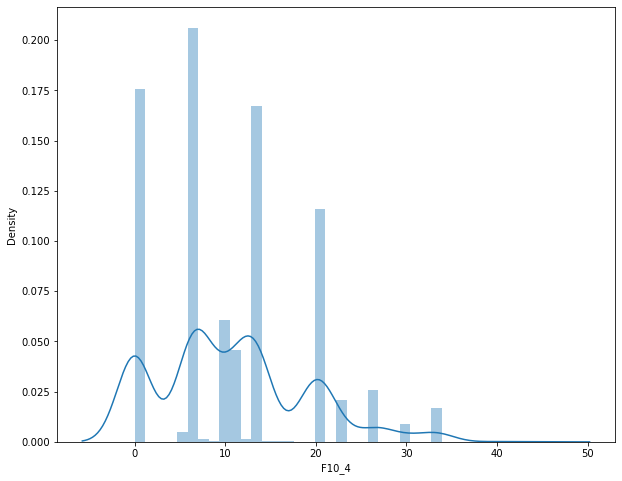

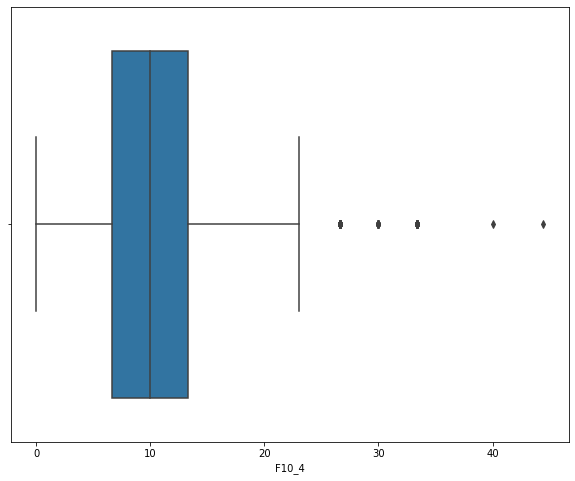

In [146]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F10_4))
print('Kurtosis is: ', stats.kurtosis(df.F10_4))

## Data Distribution
sns.distplot(df.F10_4)
plt.show()

## Outliers Detection
sns.boxplot(df.F10_4)
plt.show()

In [147]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F10_4 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F10_4 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F10_4 < lower_limit) | (df.F10_4 > upper_limit) ]
## Removing Outliers
df = df [ (df.F10_4 >= lower_limit) & (df.F10_4 <= upper_limit) ]
df.head()

Q1:  6.667
Q3:  13.333
IQR:  6.666
Lower limit is:  -3.3320000000000007
Upper limit is:  23.332


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  

[5 rows x 43 columns]

Skewness is:  0.14832984344510597
Kurtosis is:  -0.9171737194706462


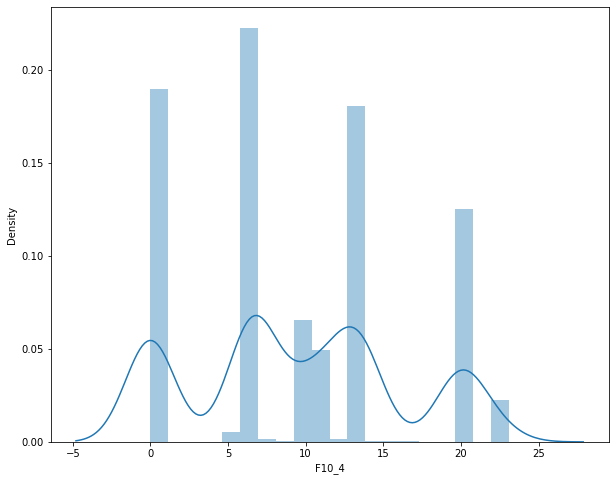

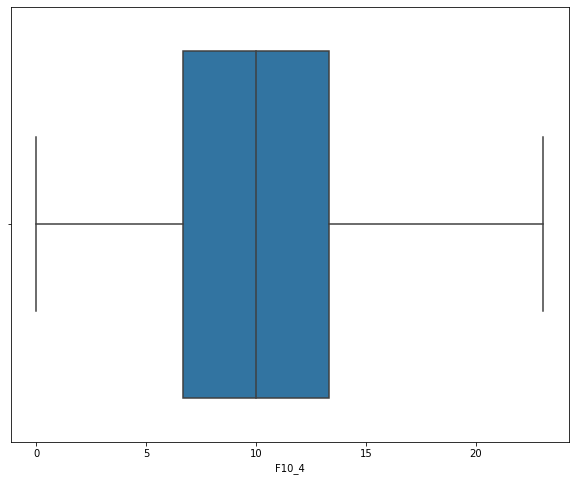

In [148]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F10_4))
print('Kurtosis is: ', stats.kurtosis(df.F10_4))

## Data Distribution
sns.distplot(df.F10_4)
plt.show()

## Outliers Detection
sns.boxplot(df.F10_4)
plt.show()

### F10_5 Outliers Detection and Removal

Skewness is:  0.10739869540176702
Kurtosis is:  -0.6017709303851033


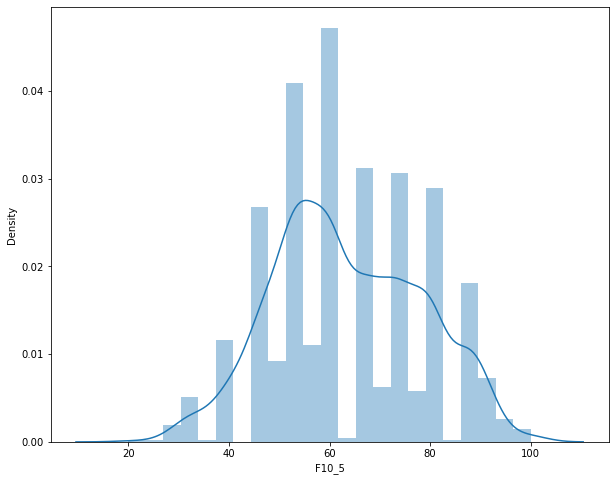

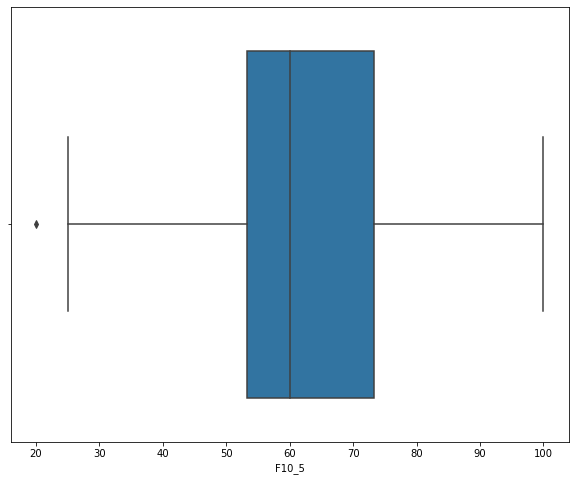

In [149]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F10_5))
print('Kurtosis is: ', stats.kurtosis(df.F10_5))

## Data Distribution
sns.distplot(df.F10_5)
plt.show()

## Outliers Detection
sns.boxplot(df.F10_5)
plt.show()

In [150]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F10_5 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F10_5 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F10_5 < lower_limit) | (df.F10_5 > upper_limit) ]
## Removing Outliers
df = df [ (df.F10_5 >= lower_limit) & (df.F10_5 <= upper_limit) ]
df.head()

Q1:  53.333
Q3:  73.333
IQR:  20.0
Lower limit is:  23.333
Upper limit is:  103.333


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.1214819469556369
Kurtosis after outlier removal is:  -0.6314773453314051


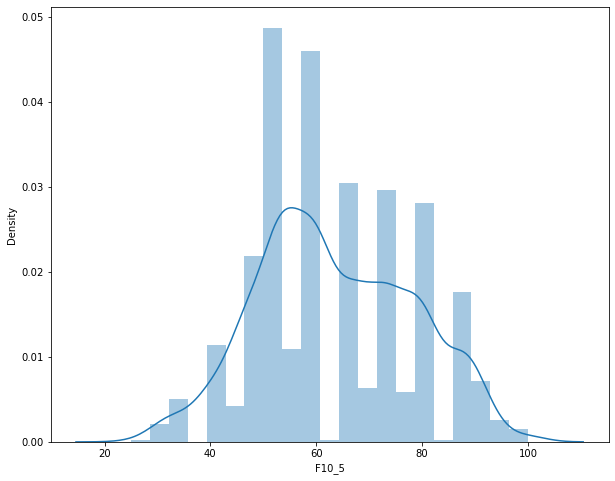

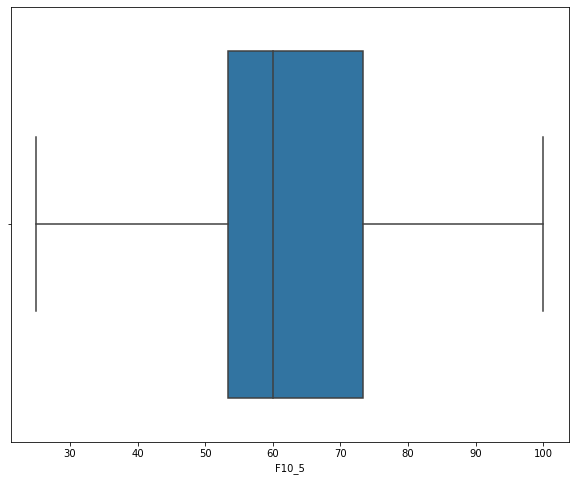

In [151]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F10_5))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F10_5))

## Data Distribution
sns.distplot(df.F10_5)
plt.show()

## Outliers Detection
sns.boxplot(df.F10_5)
plt.show()

### F10_7 Outliers Detection and Removal

Skewness is:  0.4365998979002073
Kurtosis is:  -0.546998549456593


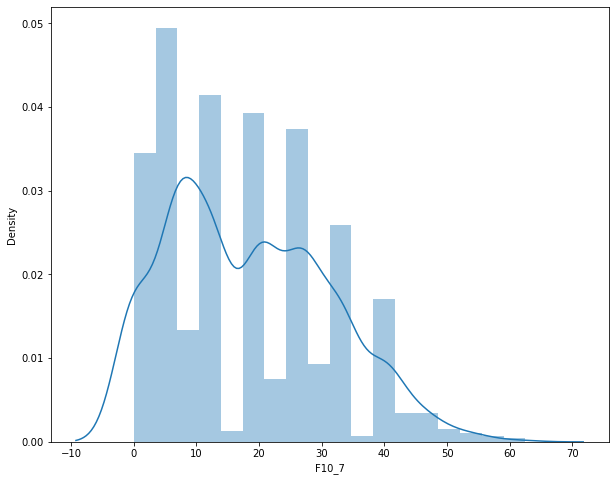

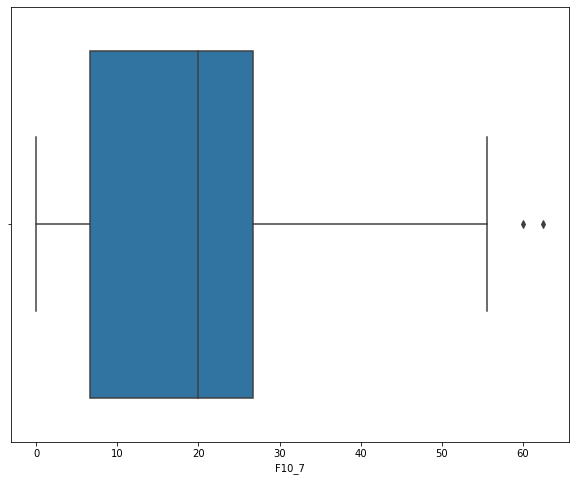

In [152]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F10_7))
print('Kurtosis is: ', stats.kurtosis(df.F10_7))

## Data Distribution
sns.distplot(df.F10_7)
plt.show()

## Outliers Detection
sns.boxplot(df.F10_7)
plt.show()

In [153]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F10_7 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F10_7 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F10_7 < lower_limit) | (df.F10_7 > upper_limit) ]
## Removing Outliers
df = df [ (df.F10_7 >= lower_limit) & (df.F10_7 <= upper_limit) ]
df.head()

Q1:  6.667
Q3:  26.667
IQR:  20.0
Lower limit is:  -23.333
Upper limit is:  56.667


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.4068642431390348
Kurtosis after outlier removal is:  -0.6448804209345762


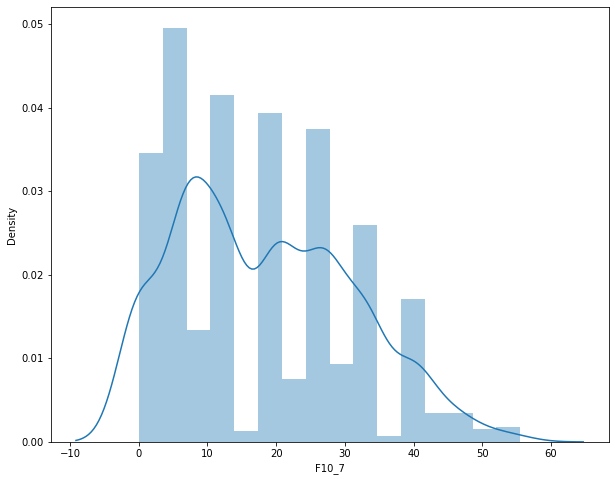

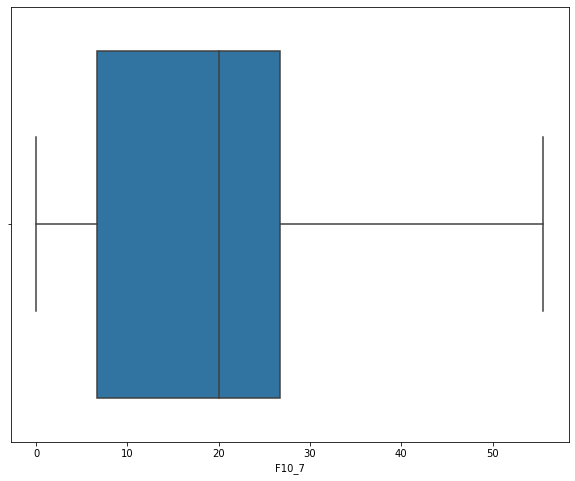

In [154]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F10_7))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F10_7))

## Data Distribution
sns.distplot(df.F10_7)
plt.show()

## Outliers Detection
sns.boxplot(df.F10_7)
plt.show()

### F10_8 Outliers Detection and Removal

Skewness is:  0.6830133328606028
Kurtosis is:  -0.29042018389513036


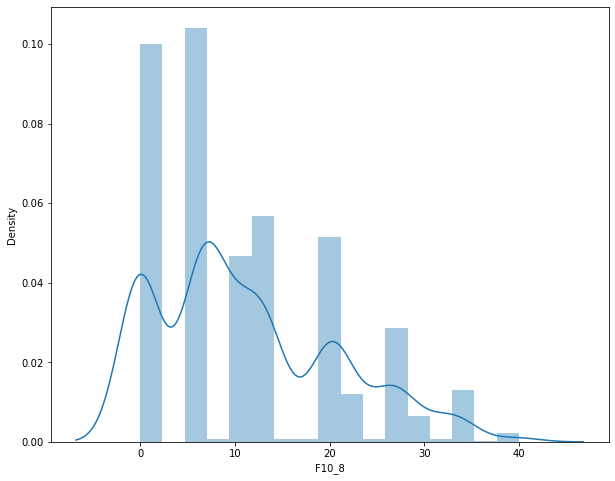

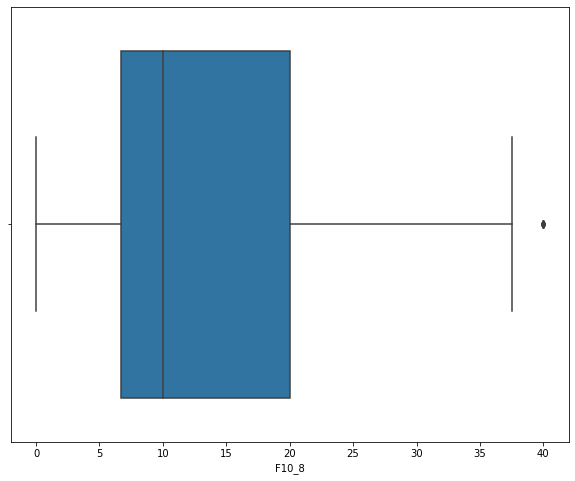

In [155]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F10_8))
print('Kurtosis is: ', stats.kurtosis(df.F10_8))

## Data Distribution
sns.distplot(df.F10_8)
plt.show()

## Outliers Detection
sns.boxplot(df.F10_8)
plt.show()

In [156]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F10_8 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F10_8 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F10_8 < lower_limit) | (df.F10_8 > upper_limit) ]
## Removing Outliers
df = df [ (df.F10_8 >= lower_limit) & (df.F10_8 <= upper_limit) ]
df.head()

Q1:  6.667
Q3:  20.0
IQR:  13.333
Lower limit is:  -13.332500000000001
Upper limit is:  39.9995


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.41162423651071156
Kurtosis after outlier removal is:  -0.6223069524813454


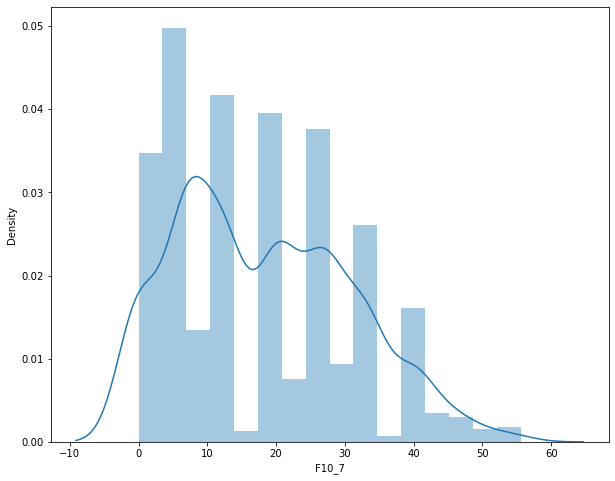

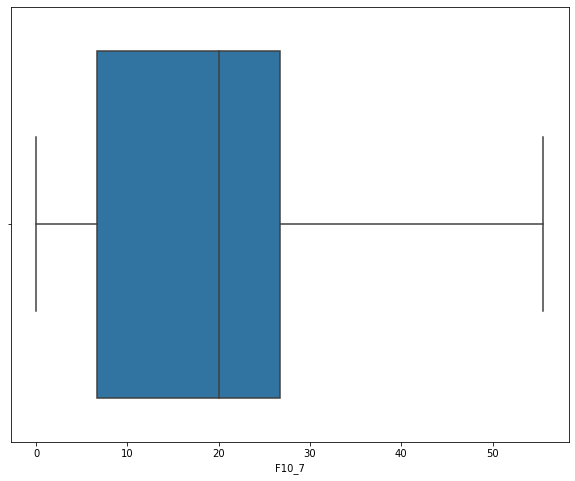

In [157]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F10_7))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F10_7))

## Data Distribution
sns.distplot(df.F10_7)
plt.show()

## Outliers Detection
sns.boxplot(df.F10_7)
plt.show()

### F10_9 Outliers Detection and Removal

Skewness is:  1.1043992194264673
Kurtosis is:  0.6167608910615341


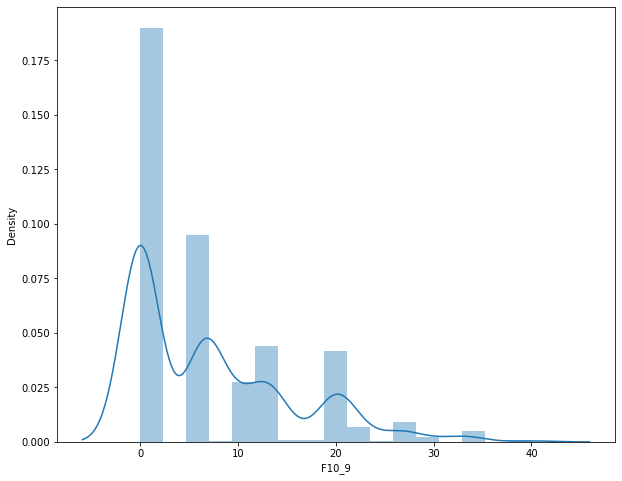

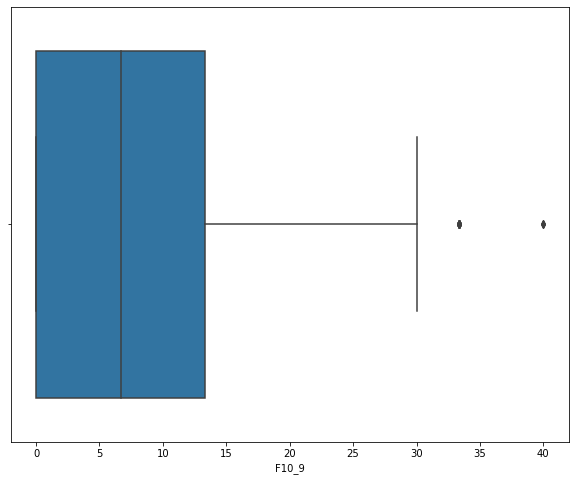

In [158]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F10_9))
print('Kurtosis is: ', stats.kurtosis(df.F10_9))

## Data Distribution
sns.distplot(df.F10_9)
plt.show()

## Outliers Detection
sns.boxplot(df.F10_9)
plt.show()

In [159]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F10_9 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F10_9 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F10_9 < lower_limit) | (df.F10_9 > upper_limit) ]
## Removing Outliers
df = df [ (df.F10_9 >= lower_limit) & (df.F10_9 <= upper_limit) ]
df.head()

Q1:  0.0
Q3:  13.333
IQR:  13.333
Lower limit is:  -19.9995
Upper limit is:  33.3325


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.9252160207595386
Kurtosis after outlier removal is:  -0.14507591474145798


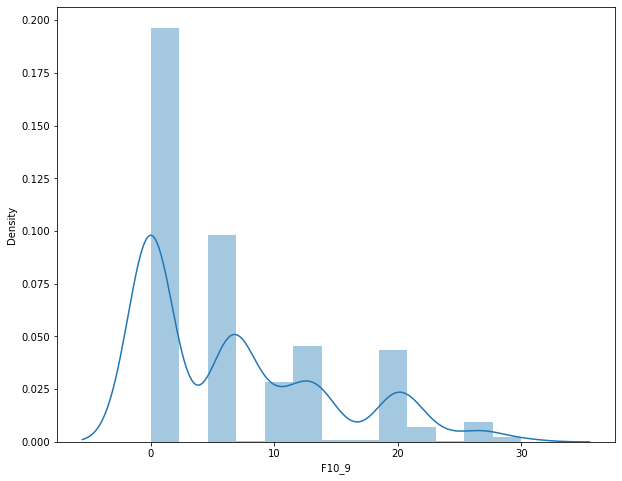

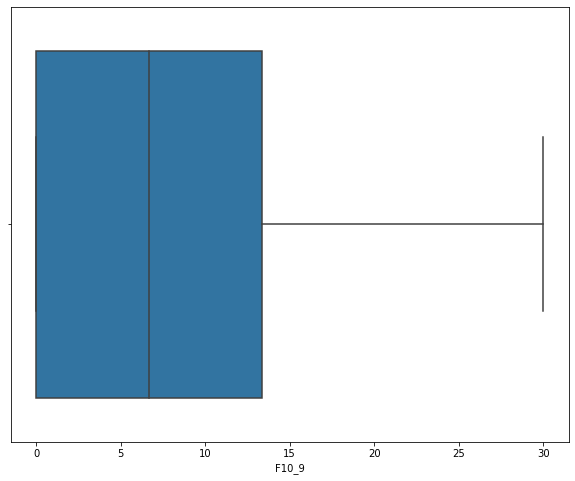

In [160]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F10_9))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F10_9))

## Data Distribution
sns.distplot(df.F10_9)
plt.show()

## Outliers Detection
sns.boxplot(df.F10_9)
plt.show()

### F11_1 Outliers Detection and Removal

Skewness is:  0.17074564613795354
Kurtosis is:  -0.6561913816838647


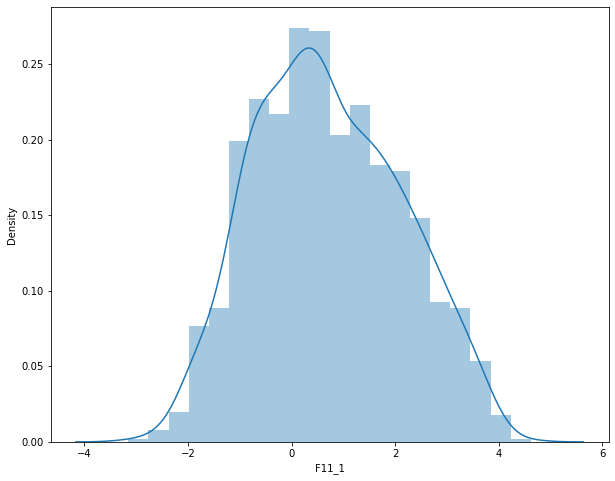

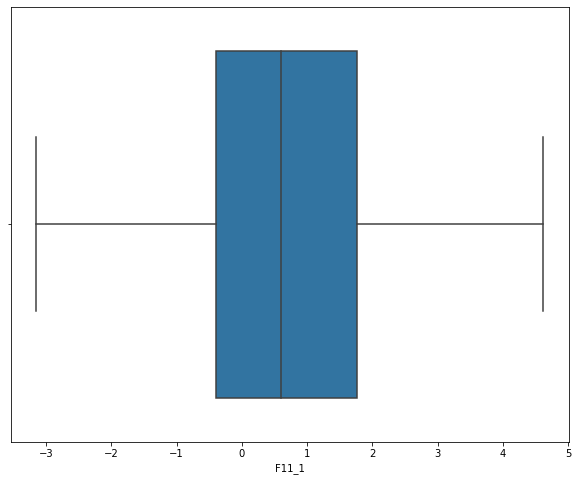

In [161]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F11_1))
print('Kurtosis is: ', stats.kurtosis(df.F11_1))

## Data Distribution
sns.distplot(df.F11_1)
plt.show()

## Outliers Detection
sns.boxplot(df.F11_1)
plt.show()

### F11_3 Outliers Detection and Removal

Skewness is:  0.2802569508073784
Kurtosis is:  -0.2613538278946441


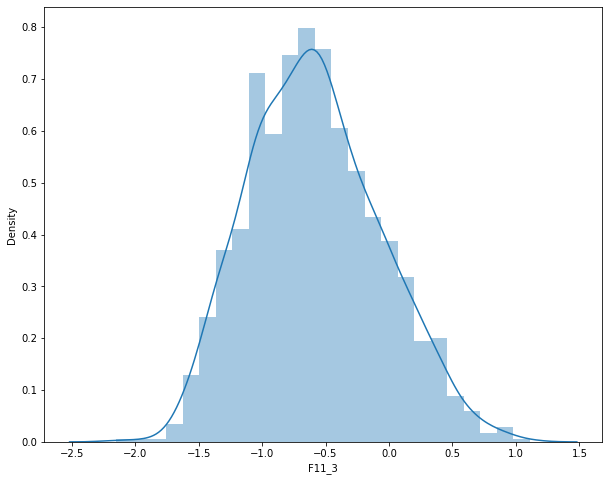

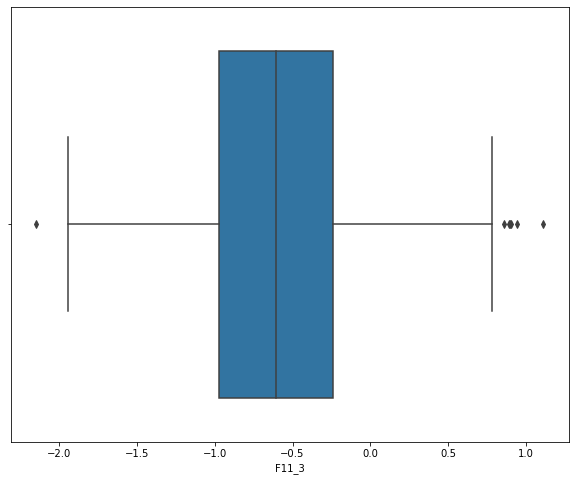

In [162]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F11_3))
print('Kurtosis is: ', stats.kurtosis(df.F11_3))

## Data Distribution
sns.distplot(df.F11_3)
plt.show()

## Outliers Detection
sns.boxplot(df.F11_3)
plt.show()

In [163]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F11_3 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F11_3 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F11_3 < lower_limit) | (df.F11_3 > upper_limit) ]
## Removing Outliers
df = df [ (df.F11_3 >= lower_limit) & (df.F11_3 <= upper_limit) ]
df.head()

Q1:  -0.9704166666666667
Q3:  -0.23825
IQR:  0.7321666666666667
Lower limit is:  -2.068666666666667
Upper limit is:  0.8600000000000002


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.23081322047263006
Kurtosis after outlier removal is:  -0.4464685386266143


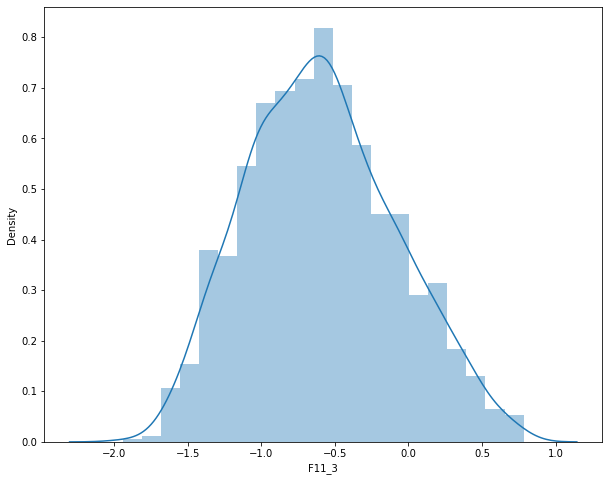

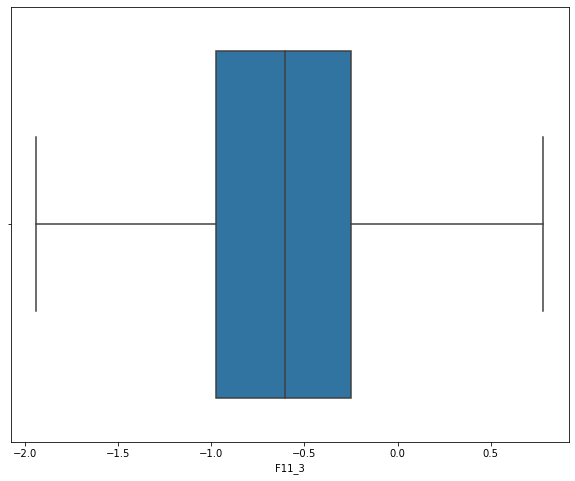

In [164]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F11_3))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F11_3))

## Data Distribution
sns.distplot(df.F11_3)
plt.show()

## Outliers Detection
sns.boxplot(df.F11_3)
plt.show()

### F11_4 Outliers Detection and Removal

Skewness is:  -0.4979784752976061
Kurtosis is:  -0.005901234278866241


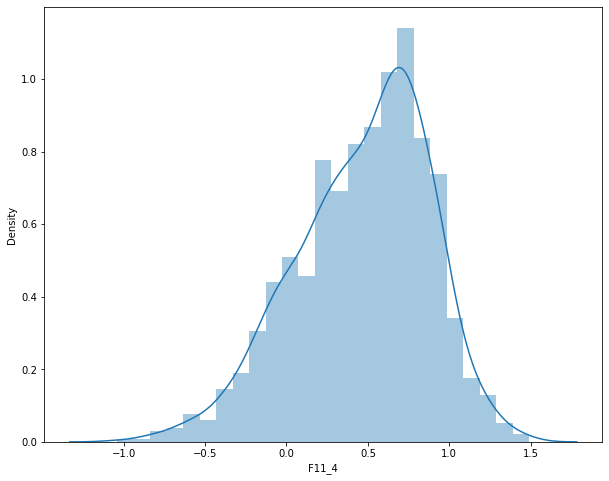

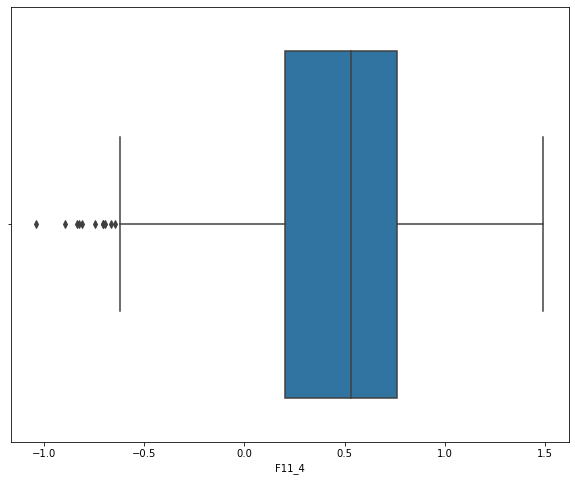

In [165]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F11_4))
print('Kurtosis is: ', stats.kurtosis(df.F11_4))

## Data Distribution
sns.distplot(df.F11_4)
plt.show()

## Outliers Detection
sns.boxplot(df.F11_4)
plt.show()

In [166]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F11_4 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F11_4 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F11_4 < lower_limit) | (df.F11_4 > upper_limit) ]
## Removing Outliers
df = df [ (df.F11_4 >= lower_limit) & (df.F11_4 <= upper_limit) ]
df.head()

Q1:  0.202
Q3:  0.762333333333333
IQR:  0.5603333333333329
Lower limit is:  -0.6384999999999994
Upper limit is:  1.6028333333333324


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
4      1   972.10324  141.111111  71.000000  0.335556 -0.494444 -0.521111   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
4 -0.514444 -0.755556  0.156667  ...   0.000  22.222 -0.378889 -1.373333   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
4  0.244444 -1.215556  0.014444 -0.216667 -0.131111 -0.168889  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.3660652523788056
Kurtosis after outlier removal is:  -0.3559783715144156


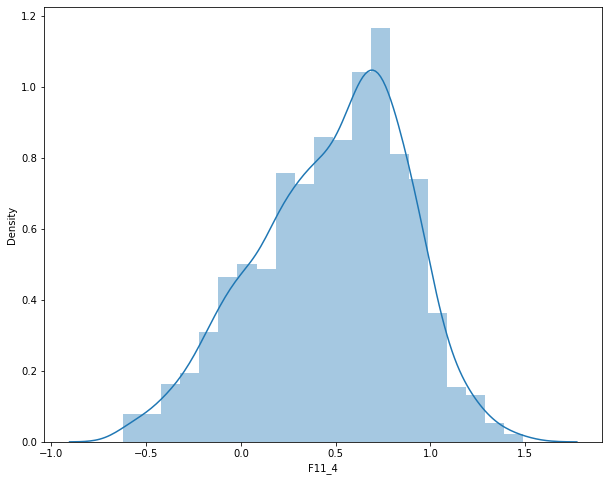

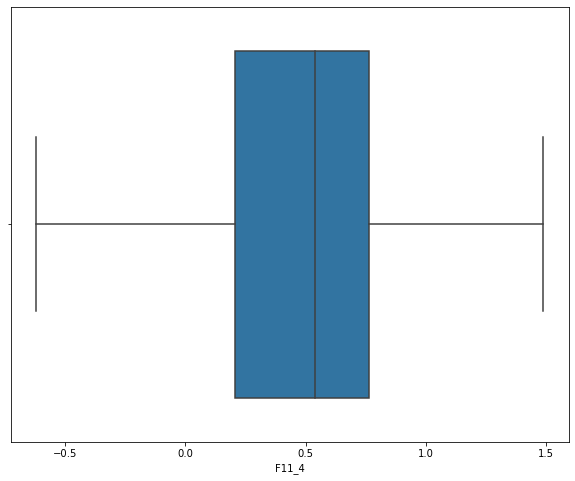

In [167]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F11_4))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F11_4))

## Data Distribution
sns.distplot(df.F11_4)
plt.show()

## Outliers Detection
sns.boxplot(df.F11_4)
plt.show()

### F11_5 Outliers Detection and Removal

Skewness is:  0.04653386512850656
Kurtosis is:  0.21874258679141745


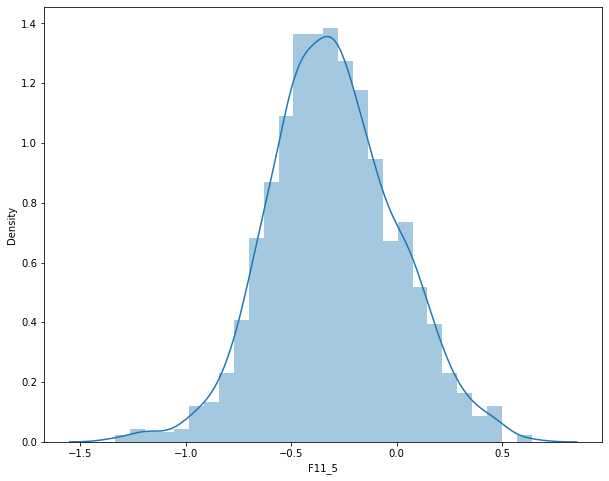

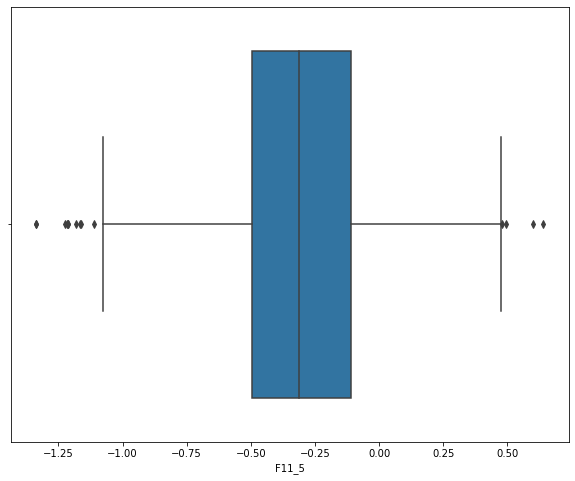

In [168]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F11_5))
print('Kurtosis is: ', stats.kurtosis(df.F11_5))

## Data Distribution
sns.distplot(df.F11_5)
plt.show()

## Outliers Detection
sns.boxplot(df.F11_5)
plt.show()

In [169]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F11_5 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F11_5 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F11_5 < lower_limit) | (df.F11_5 > upper_limit) ]
## Removing Outliers
df = df [ (df.F11_5 >= lower_limit) & (df.F11_5 <= upper_limit) ]
df.head()

Q1:  -0.49683333333333346
Q3:  -0.1079444444444445
IQR:  0.38888888888888895
Lower limit is:  -1.080166666666667
Upper limit is:  0.47538888888888897


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   
9      1  1024.23134  141.111111  42.255556  2.126667 -0.206667  0.010000   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   
9 -0.700000 -0.454444  0.487778  ...  22.222  11.111 -0.244444 -0.175556   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  
9  0.620000 -0.717778  0.493333 -0.001111 -0.227778  0.117778  

[5 rows x 43 columns]

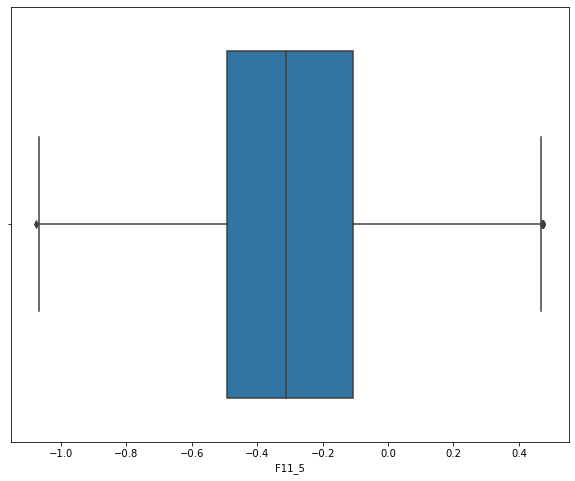

In [170]:
sns.boxplot(df.F11_5)
plt.show()

- Few Outliers are detected.

In [171]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F11_5 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F11_5 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F11_5 < lower_limit) | (df.F11_5 > upper_limit) ]
## Removing Outliers
df = df [ (df.F11_5 >= lower_limit) & (df.F11_5 <= upper_limit) ]
df.head()

Q1:  -0.493333333333333
Q3:  -0.10825
IQR:  0.385083333333333
Lower limit is:  -1.0709583333333326
Upper limit is:  0.4693749999999995


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   
9      1  1024.23134  141.111111  42.255556  2.126667 -0.206667  0.010000   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   
9 -0.700000 -0.454444  0.487778  ...  22.222  11.111 -0.244444 -0.175556   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  
9  0.620000 -0.717778  0.493333 -0.001111 -0.227778  0.117778  

[5 rows x 43 columns]

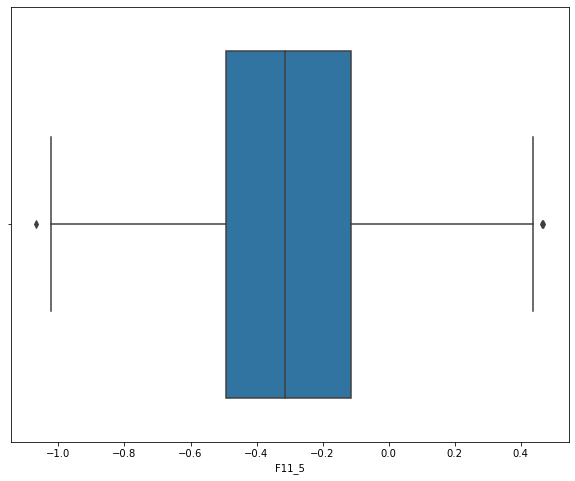

In [172]:
sns.boxplot(df.F11_5)
plt.show()

- Still Outliers are present.

In [173]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F11_5 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F11_5 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F11_5 < lower_limit) | (df.F11_5 > upper_limit) ]
## Removing Outliers
df = df [ (df.F11_5 >= lower_limit) & (df.F11_5 <= upper_limit) ]
df.head()

Q1:  -0.494
Q3:  -0.11399999999999999
IQR:  0.38
Lower limit is:  -1.064
Upper limit is:  0.45600000000000007


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   
9      1  1024.23134  141.111111  42.255556  2.126667 -0.206667  0.010000   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   
9 -0.700000 -0.454444  0.487778  ...  22.222  11.111 -0.244444 -0.175556   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  
9  0.620000 -0.717778  0.493333 -0.001111 -0.227778  0.117778  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.13699587719514533
Kurtosis after outlier removal is:  -0.34228786126721245


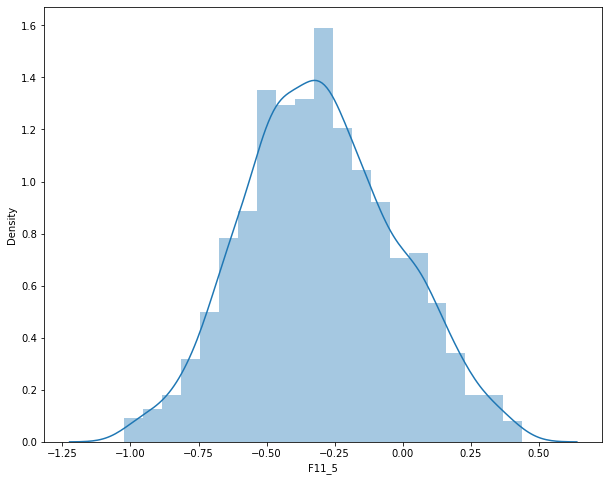

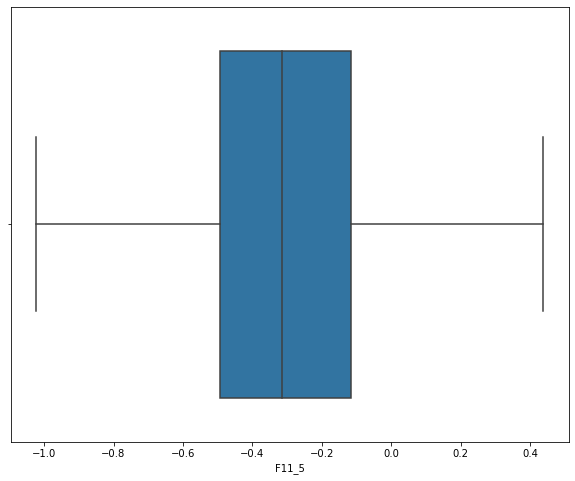

In [174]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F11_5))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F11_5))

## Data Distribution
sns.distplot(df.F11_5)
plt.show()

## Outliers Detection
sns.boxplot(df.F11_5)
plt.show()

### F11_6 Outliers Detection and Removal

Skewness is:  -0.09249301823826177
Kurtosis is:  -0.20860709261168386


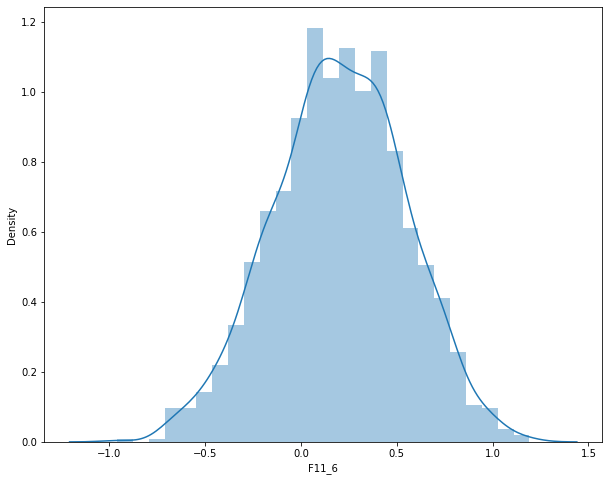

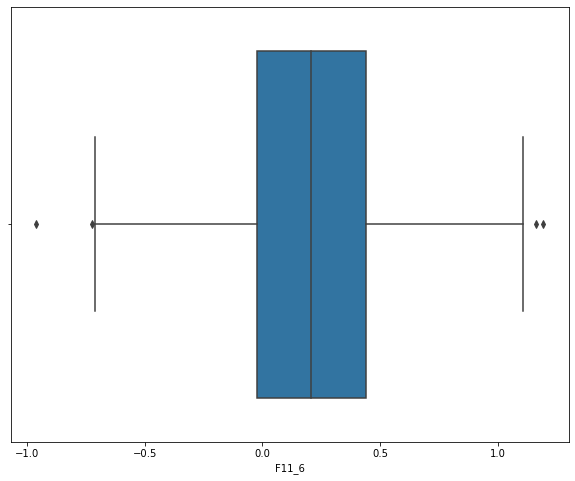

In [175]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F11_6))
print('Kurtosis is: ', stats.kurtosis(df.F11_6))

## Data Distribution
sns.distplot(df.F11_6)
plt.show()

## Outliers Detection
sns.boxplot(df.F11_6)
plt.show()

In [176]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F11_6 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F11_6 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F11_6 < lower_limit) | (df.F11_6 > upper_limit) ]
## Removing Outliers
df = df [ (df.F11_6 >= lower_limit) & (df.F11_6 <= upper_limit) ]
df.head()

Q1:  -0.024
Q3:  0.43816666666666676
IQR:  0.4621666666666668
Lower limit is:  -0.7172500000000002
Upper limit is:  1.131416666666667


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   
9      1  1024.23134  141.111111  42.255556  2.126667 -0.206667  0.010000   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   
9 -0.700000 -0.454444  0.487778  ...  22.222  11.111 -0.244444 -0.175556   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  
9  0.620000 -0.717778  0.493333 -0.001111 -0.227778  0.117778  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.08738719335839906
Kurtosis after outlier removal is:  -0.3189406789553755


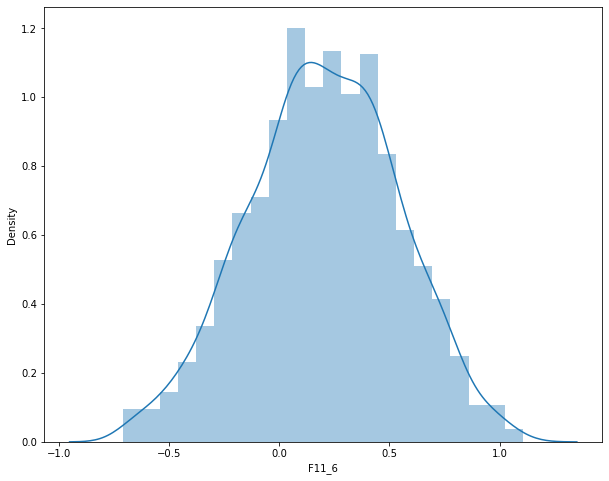

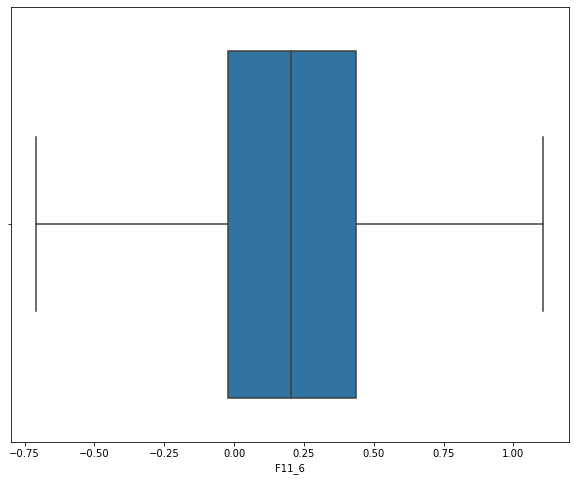

In [177]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F11_6))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F11_6))

## Data Distribution
sns.distplot(df.F11_6)
plt.show()

## Outliers Detection
sns.boxplot(df.F11_6)
plt.show()

### F11_7 Outliers Detection and Removal

Skewness is:  -0.17518351902573204
Kurtosis is:  0.2302965873959364


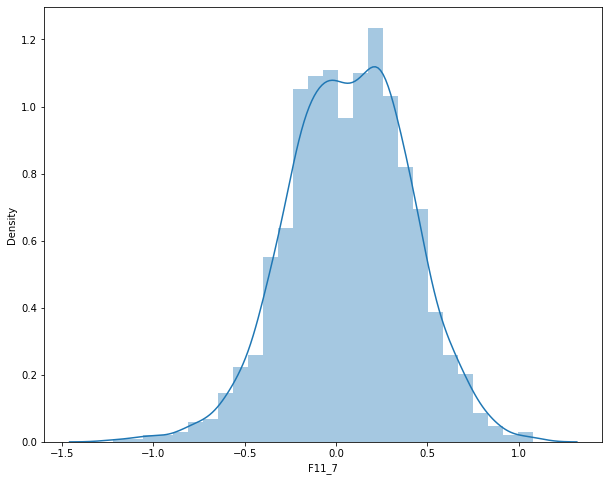

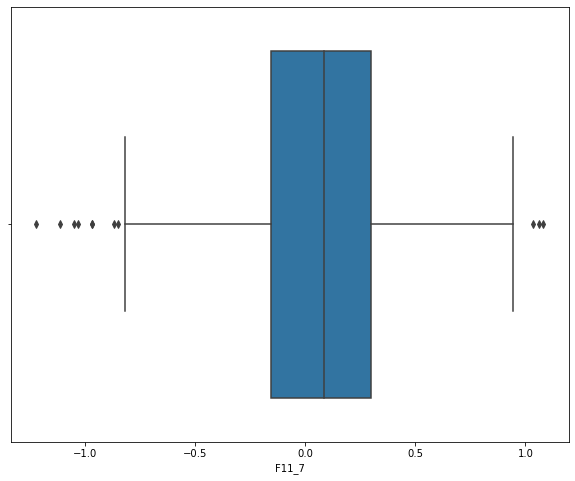

In [178]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F11_7))
print('Kurtosis is: ', stats.kurtosis(df.F11_7))

## Data Distribution
sns.distplot(df.F11_7)
plt.show()

## Outliers Detection
sns.boxplot(df.F11_7)
plt.show()

In [179]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F11_7 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F11_7 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F11_7 < lower_limit) | (df.F11_7 > upper_limit) ]
## Removing Outliers
df = df [ (df.F11_7 >= lower_limit) & (df.F11_7 <= upper_limit) ]
df.head()

Q1:  -0.157333333333333
Q3:  0.299833333333333
IQR:  0.457166666666666
Lower limit is:  -0.843083333333332
Upper limit is:  0.9855833333333319


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   
9      1  1024.23134  141.111111  42.255556  2.126667 -0.206667  0.010000   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   
9 -0.700000 -0.454444  0.487778  ...  22.222  11.111 -0.244444 -0.175556   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  
9  0.620000 -0.717778  0.493333 -0.001111 -0.227778  0.117778  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.05305317300691512
Kurtosis after outlier removal is:  -0.29022664470778636


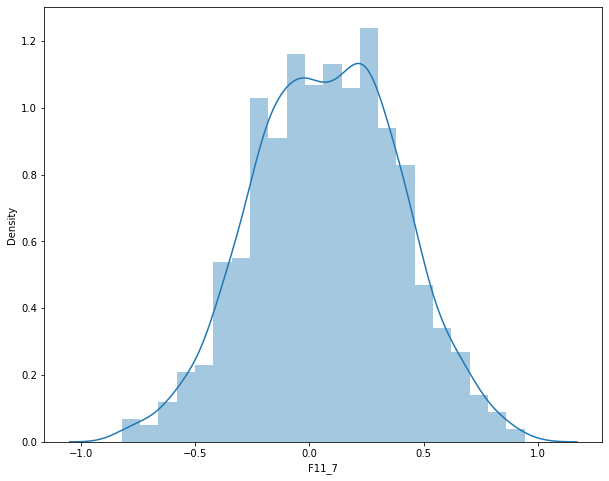

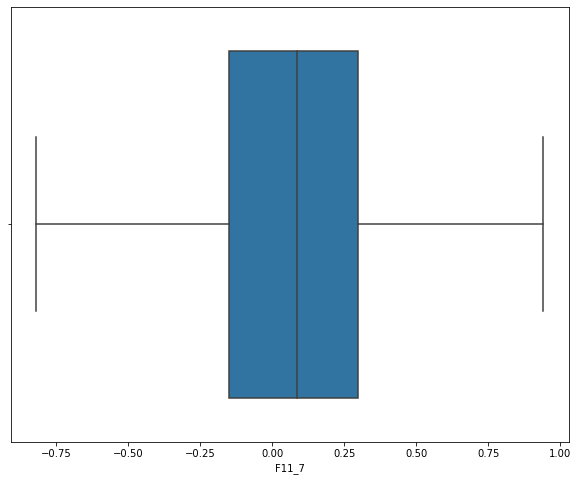

In [180]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F11_7))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F11_7))

## Data Distribution
sns.distplot(df.F11_7)
plt.show()

## Outliers Detection
sns.boxplot(df.F11_7)
plt.show()

### F11_8 Outliers Detection and Removal

Skewness is:  -0.1891825676711443
Kurtosis is:  0.3666242791215395


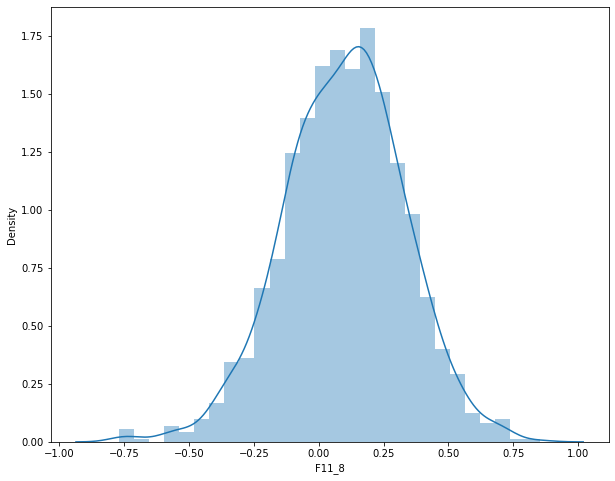

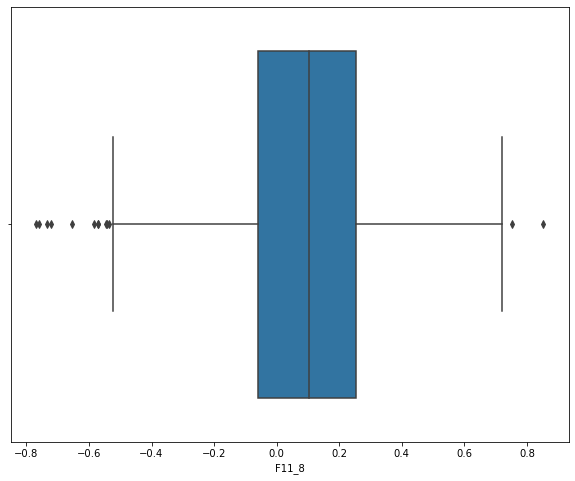

In [181]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F11_8))
print('Kurtosis is: ', stats.kurtosis(df.F11_8))

## Data Distribution
sns.distplot(df.F11_8)
plt.show()

## Outliers Detection
sns.boxplot(df.F11_8)
plt.show()

In [182]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F11_8 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F11_8 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F11_8 < lower_limit) | (df.F11_8 > upper_limit) ]
## Removing Outliers
df = df [ (df.F11_8 >= lower_limit) & (df.F11_8 <= upper_limit) ]
df.head()

Q1:  -0.06
Q3:  0.254
IQR:  0.314
Lower limit is:  -0.5309999999999999
Upper limit is:  0.725


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   
9      1  1024.23134  141.111111  42.255556  2.126667 -0.206667  0.010000   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   
9 -0.700000 -0.454444  0.487778  ...  22.222  11.111 -0.244444 -0.175556   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  
9  0.620000 -0.717778  0.493333 -0.001111 -0.227778  0.117778  

[5 rows x 43 columns]

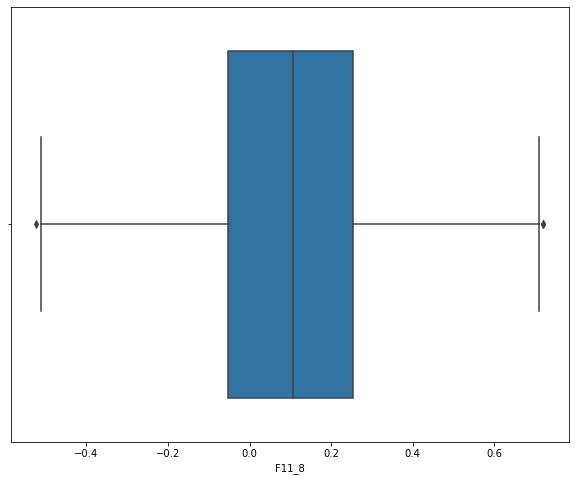

In [183]:
sns.boxplot(df.F11_8)
plt.show()

- Few Outliers are detected.

In [184]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F11_8 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F11_8 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F11_8 < lower_limit) | (df.F11_8 > upper_limit) ]
## Removing Outliers
df = df [ (df.F11_8 >= lower_limit) & (df.F11_8 <= upper_limit) ]
df.head()

Q1:  -0.054
Q3:  0.254
IQR:  0.308
Lower limit is:  -0.516
Upper limit is:  0.716


Class          F2          F4         F5        F6      F7_1      F7_3  \
0      1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
3      1  1027.27834  141.111111  47.644444  2.272222 -0.283333  0.425556   
6      1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8      1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   
9      1  1024.23134  141.111111  42.255556  2.126667 -0.206667  0.010000   

       F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0  0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
3 -0.492222 -0.605556  0.604444  ...  33.333   0.000 -0.030000 -0.160000   
6  0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8 -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   
9 -0.700000 -0.454444  0.487778  ...  22.222  11.111 -0.244444 -0.175556   

      F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0 -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
3  1.206667 -0.141111  0.760000  0.192222  0.231111  0.387778  
6  0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8  0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  
9  0.620000 -0.717778  0.493333 -0.001111 -0.227778  0.117778  

[5 rows x 43 columns]

Skewness after outlier removal is:  -0.018988078354916404
Kurtosis after outlier removal is:  -0.25497459266170885


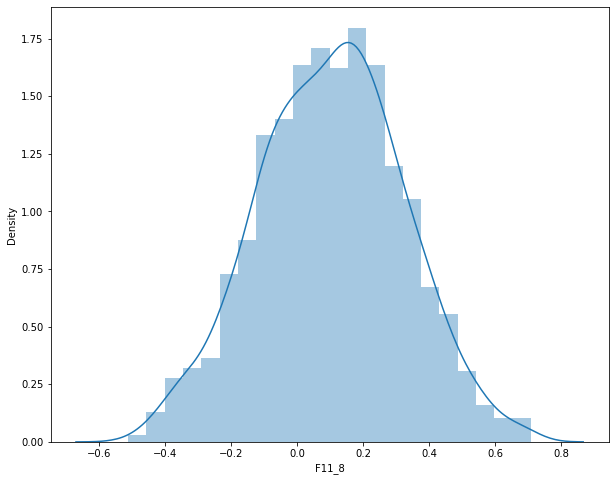

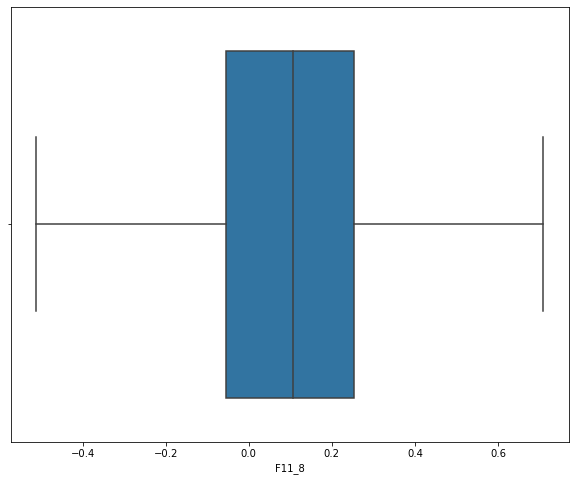

In [185]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F11_8))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F11_8))

## Data Distribution
sns.distplot(df.F11_8)
plt.show()

## Outliers Detection
sns.boxplot(df.F11_8)
plt.show()

### F12_3 Outliers Detection and Removal

Skewness is:  0.13044818674928355
Kurtosis is:  0.0006280300081114021


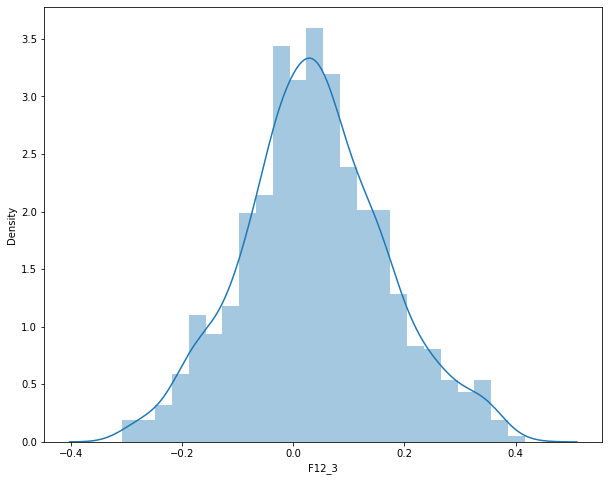

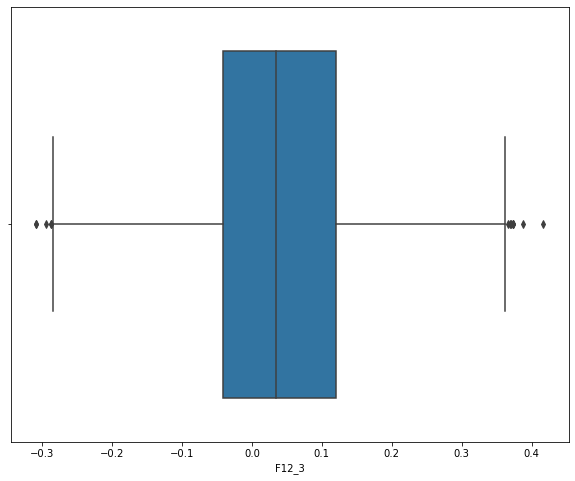

In [186]:
## Data Normalization
print('Skewness is: ', stats.skew(df.F12_3))
print('Kurtosis is: ', stats.kurtosis(df.F12_3))

## Data Distribution
sns.distplot(df.F12_3)
plt.show()

## Outliers Detection
sns.boxplot(df.F12_3)
plt.show()

In [187]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F12_3 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F12_3 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F12_3 < lower_limit) | (df.F12_3 > upper_limit) ]
## Removing Outliers
df = df [ (df.F12_3 >= lower_limit) & (df.F12_3 <= upper_limit) ]
df.head()

Q1:  -0.042
Q3:  0.120666666666667
IQR:  0.16266666666666701
Lower limit is:  -0.28600000000000053
Upper limit is:  0.3646666666666675


Class          F2          F4         F5        F6      F7_1      F7_3  \
0       1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
6       1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8       1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   
9       1  1024.23134  141.111111  42.255556  2.126667 -0.206667  0.010000   
10      1  2002.34694   79.375000  28.137500  3.070625 -0.129375 -0.231875   

        F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0   0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
6   0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8  -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   
9  -0.700000 -0.454444  0.487778  ...  22.222  11.111 -0.244444 -0.175556   
10 -0.316875 -0.531875  0.348125  ...  31.250  18.750 -1.150625 -0.055625   

       F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0  -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
6   0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8   0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  
9   0.620000 -0.717778  0.493333 -0.001111 -0.227778  0.117778  
10  0.253750 -0.809375  0.591250  0.151875  0.067500  0.087500  

[5 rows x 43 columns]

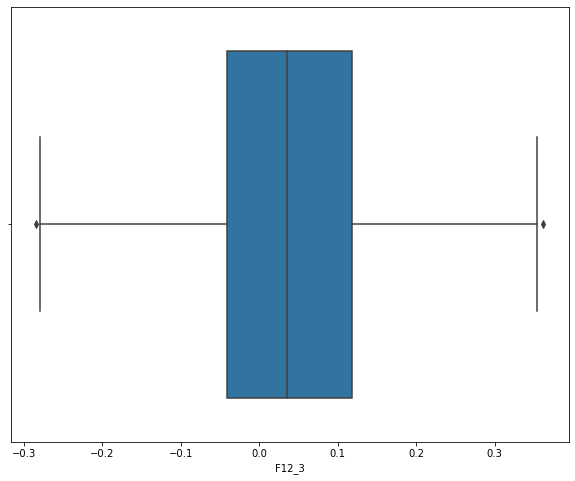

In [188]:
sns.boxplot(df.F12_3)
plt.show()

- Few Outliers are detected.

In [189]:
### Detecting outliers through IQR
Q1 = np.percentile(df.F12_3 , 25)
print('Q1: ', Q1)
Q3 = np.percentile(df.F12_3 , 75)
print('Q3: ', Q3)
IQR = Q3 - Q1
print('IQR: ', IQR)
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is: ', lower_limit)
print('Upper limit is: ', upper_limit)
## Detecting Outliers
df [ (df.F12_3 < lower_limit) | (df.F12_3 > upper_limit) ]
## Removing Outliers
df = df [ (df.F12_3 >= lower_limit) & (df.F12_3 <= upper_limit) ]
df.head()

Q1:  -0.041499999999999974
Q3:  0.118666666666667
IQR:  0.16016666666666698
Lower limit is:  -0.28175000000000044
Upper limit is:  0.35891666666666744


Class          F2          F4         F5        F6      F7_1      F7_3  \
0       1  1636.86804   78.000000  20.773333  1.119333  0.196000 -0.112000   
6       1   943.15454  107.777778 -38.277778  1.165556 -0.004444  0.123333   
8       1  1605.72704   52.666667  -1.720000  1.676000 -0.151333 -0.250667   
9       1  1024.23134  141.111111  42.255556  2.126667 -0.206667  0.010000   
10      1  2002.34694   79.375000  28.137500  3.070625 -0.129375 -0.231875   

        F7_5      F7_6      F7_7  ...   F10_8   F10_9     F11_1     F11_3  \
0   0.012667 -0.602667  0.036667  ...  20.000  13.333 -1.474000  0.299333   
6   0.483333 -0.955556  0.376667  ...  33.333  11.111 -1.904444  0.125556   
8  -0.379333 -0.222667 -0.247333  ...  13.333  13.333 -0.956000 -0.375333   
9  -0.700000 -0.454444  0.487778  ...  22.222  11.111 -0.244444 -0.175556   
10 -0.316875 -0.531875  0.348125  ...  31.250  18.750 -1.150625 -0.055625   

       F11_4     F11_5     F11_6     F11_7     F11_8     F12_3  
0  -0.132000 -0.412000  0.776000  0.425333  0.324000  0.141333  
6   0.567778 -0.601111  1.067778  0.537778  0.228889  0.273333  
8   0.214667 -0.184000  0.046000 -0.257333  0.224000  0.067333  
9   0.620000 -0.717778  0.493333 -0.001111 -0.227778  0.117778  
10  0.253750 -0.809375  0.591250  0.151875  0.067500  0.087500  

[5 rows x 43 columns]

Skewness after outlier removal is:  0.11528600167782141
Kurtosis after outlier removal is:  -0.13593424940182341


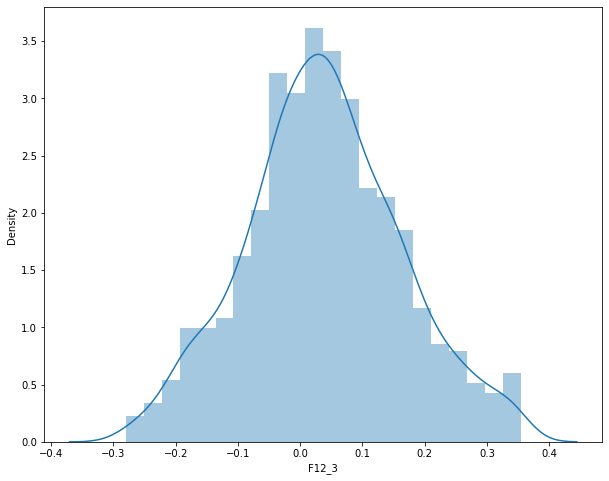

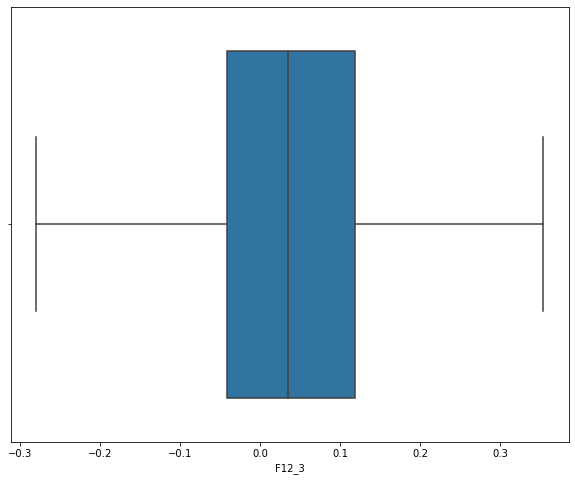

In [190]:
## Data Normalization
print('Skewness after outlier removal is: ', stats.skew(df.F12_3))
print('Kurtosis after outlier removal is: ', stats.kurtosis(df.F12_3))

## Data Distribution
sns.distplot(df.F12_3)
plt.show()

## Outliers Detection
sns.boxplot(df.F12_3)
plt.show()

### Separating Predictors and Target

In [191]:
X = df.drop(['Class'], axis = 1)
y = df.Class.values

## **Scaling the Data**

In [192]:
X_scaled = StandardScaler().fit_transform(X)

### **Spliting the Train and test**

In [193]:
X_train , X_test, y_train , y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=10)

## **Model Creation** 

### Random Forest

In [194]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

### Evaluate the model

In [195]:
y_predict = model.predict(X_test)

In [196]:
RFaccuracy = accuracy_score(y_test, y_predict)
print(RFaccuracy)

0.6762295081967213


In [197]:
pd.crosstab(y_test, y_predict)

col_0    0   1
row_0         
0      135  26
1       53  30

In [198]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77       161
           1       0.54      0.36      0.43        83

    accuracy                           0.68       244
   macro avg       0.63      0.60      0.60       244
weighted avg       0.66      0.68      0.66       244



- As we can see that we are getting Accuracy of 70% with all the features.

### Feature Selection

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (1218, 43)
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No variables were removed since no ID or 

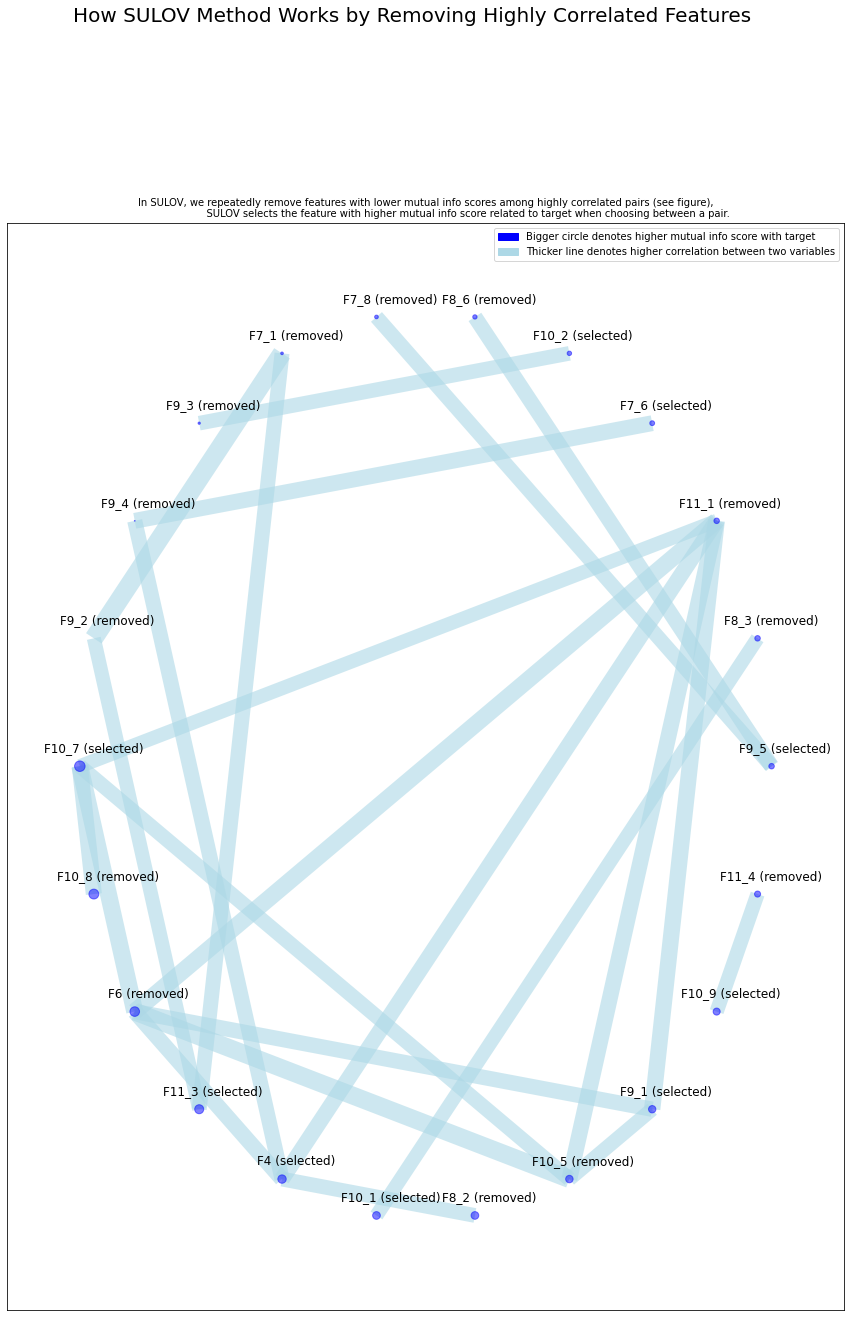

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 29
Final list of selected 29 vars after SULOV = ['F10_4', 'F11_5', 'F11_6', 'F11_7', 'F11_8', 'F12_3', 'F2', 'F5', 'F7_10', 'F7_3', 'F7_5', 'F7_7', 'F7_9', 'F8_10', 'F8_4', 'F8_5', 'F8_7', 'F8_8', 'F8_9', 'F9_6', 'F10_7', 'F11_3', 'F4', 'F10_1', 'F9_1', 'F10_9', 'F9_5', 'F7_6', 'F10_2']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 29 
    Taking top 10 features per iteration...
    XGBoost version using 1.6.2 as tree method: hist
Number of booster rounds = 100
        using 29 variables...
            Time taken for regul

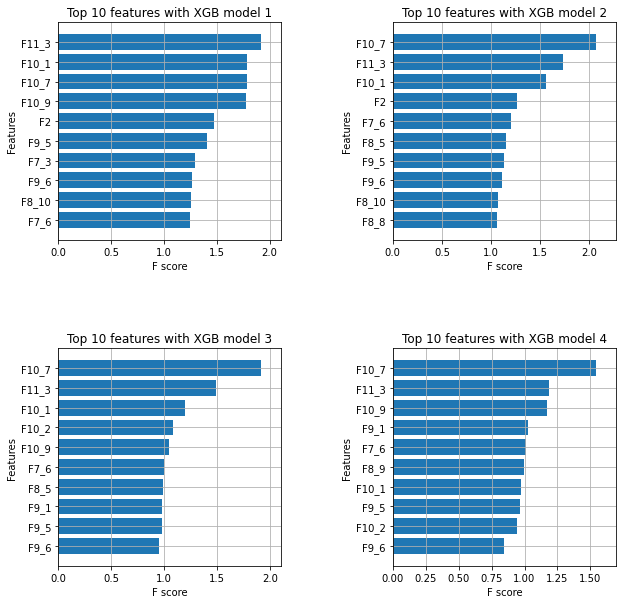

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 15 important features:
['F11_3', 'F10_1', 'F10_7', 'F10_9', 'F2', 'F9_5', 'F7_3', 'F9_6', 'F8_10', 'F7_6', 'F8_5', 'F8_8', 'F10_2', 'F9_1', 'F8_9']
Total Time taken for featurewiz selection = 3 seconds
Output contains a list of 15 important features and a train dataframe


In [199]:
target = 'Class'
features, y = featurewiz(df, target, corr_limit=0.7, verbose=2, sep=",",
                            header=0, test_data="",feature_engg="",category_encoders="")

### Important Feature Selected

In [200]:
print(features)

['F11_3', 'F10_1', 'F10_7', 'F10_9', 'F2', 'F9_5', 'F7_3', 'F9_6', 'F8_10', 'F7_6', 'F8_5', 'F8_8', 'F10_2', 'F9_1', 'F8_9']


- Creating new Dataframe so that we can do train-test split on the selected features.

### Dropping columns that are not important

In [201]:
df.drop(columns=['F4', 'F5', 'F6', 'F7_1', 'F7_3', 'F7_5', 'F7_7',
       'F7_9', 'F7_10', 'F8_2', 'F8_3', 'F8_4', 'F8_5', 'F8_7',
       'F8_8','F9_2', 'F9_3', 'F9_4', 'F9_5',
       'F10_5', 'F10_7', 'F11_1', 'F11_4', 'F11_5'], inplace=True)
df.head()

Class          F2      F7_6      F7_8      F8_6      F8_9     F8_10  \
0       1  1636.86804 -0.602667  0.466000  0.344000  0.146667 -0.076000   
6       1   943.15454 -0.955556  0.478889  0.372222  0.052222 -0.127778   
8       1  1605.72704 -0.222667  0.067333  0.018667  0.462000  0.023333   
9       1  1024.23134 -0.454444 -0.158889  0.071111  0.020000 -0.033333   
10      1  2002.34694 -0.531875 -0.011875  0.039375  0.106250 -0.161250   

        F9_1      F9_6   F10_1   F10_2   F10_4   F10_8   F10_9     F11_3  \
0  -0.339667 -0.195067  33.333  53.333  13.333  20.000  13.333  0.299333   
6  -0.814778  0.150222  22.222  55.556   0.000  33.333  11.111  0.125556   
8  -0.090467 -0.240800  46.667  60.000  20.000  13.333  13.333 -0.375333   
9  -0.032000  0.160444  22.222  33.333   0.000  22.222  11.111 -0.175556   
10 -0.370188  0.109937  12.500  25.000  12.500  31.250  18.750 -0.055625   

       F11_6     F11_7     F11_8     F12_3  
0   0.776000  0.425333  0.324000  0.141333  
6   1.067778  0.537778  0.228889  0.273333  
8   0.046000 -0.257333  0.224000  0.067333  
9   0.493333 -0.001111 -0.227778  0.117778  
10  0.591250  0.151875  0.067500  0.087500

In [202]:
df.columns

Index(['Class', 'F2', 'F7_6', 'F7_8', 'F8_6', 'F8_9', 'F8_10', 'F9_1', 'F9_6',
       'F10_1', 'F10_2', 'F10_4', 'F10_8', 'F10_9', 'F11_3', 'F11_6', 'F11_7',
       'F11_8', 'F12_3'],
      dtype='object')

In [203]:
X = df.drop(['Class'], axis =1)
y = df.Class

### Scaling the Data

In [204]:
X_scaled = StandardScaler().fit_transform(X)

### Train - Test Split

In [205]:
X_train , X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=1)

### Model Building Random Forest

In [206]:
model_nf = RandomForestClassifier()
model_nf.fit(X_train, y_train)

RandomForestClassifier()

### Evaluate the Model

In [207]:
y_predict = model_nf.predict(X_test)

In [208]:
RFaccuracy_nf = accuracy_score(y_test, y_predict)
print(RFaccuracy_nf)

0.7459016393442623


- As we can see that after feature selection Accuracy hits till 72%.

In [209]:
pd.crosstab(y_test, y_predict)

col_0    0   1
Class         
0      150  11
1       51  32

In [210]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       161
           1       0.74      0.39      0.51        83

    accuracy                           0.75       244
   macro avg       0.75      0.66      0.67       244
weighted avg       0.75      0.75      0.72       244



### Checking Imbalance Data

- If Data is Imbalance we'll try to make it Balance and try to build other models.

In [211]:
y.value_counts()

0    805
1    413
Name: Class, dtype: int64

- Here 805 values belong to Class 0 .i.e. Negative class and 413 values belong to Class 1 .i.e. Positive class

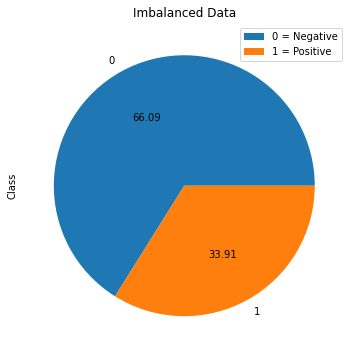

In [212]:
rcParams['figure.figsize']= 8,6
y.value_counts().plot.pie(autopct ='%.2f')
plt.title('Imbalanced Data')
plt.legend(['0 = Negative', '1 = Positive'])
plt.show()

- As we can see that the difference in between the distribution of Two Classes.

- We can balance the data using 3 methods:- 
    - Under Sampling
    - Over Sampling
    - SMOTE
- We'll balance our data using SMOTE method.

### SMOTE 

In [213]:
smote = SMOTE(random_state=10)

X_train_smote , y_train_smote = smote.fit_resample(X_train, y_train)

In [214]:
y_train_smote.value_counts()

0    644
1    644
Name: Class, dtype: int64

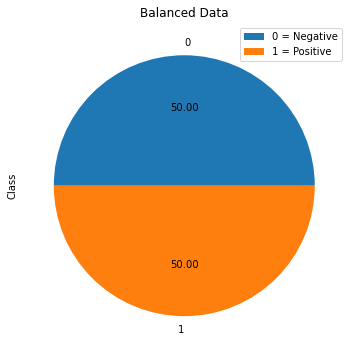

In [215]:
rcParams['figure.figsize']= 8,6
y_train_smote.value_counts().plot.pie(autopct ='%.2f')
plt.title('Balanced Data')
plt.legend(['0 = Negative', '1 = Positive'])
plt.show()

### Plot showing Balanced and Imbalanced Data.

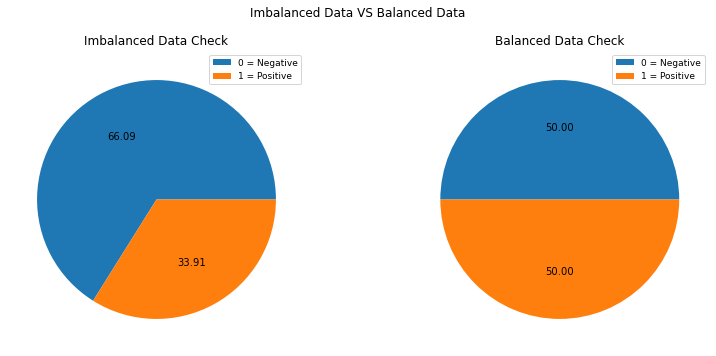

In [216]:
rcParams['figure.figsize']= 15,5
fig, (ax1 , ax2)= plt.subplots(1,2)

ax1.pie( y.value_counts() ,autopct ='%.2f')
ax1.set_title('Imbalanced Data Check')
ax1.legend(['0 = Negative', '1 = Positive'],fontsize=9, title_fontsize=9)

ax2.pie(y_train_smote.value_counts(),autopct ='%.2f')
ax2.set_title('Balanced Data Check')
ax2.legend(['0 = Negative', '1 = Positive'],fontsize=9, title_fontsize=9)
fig.suptitle('Imbalanced Data VS Balanced Data')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.2, 
                    wspace=0.4, 
                    hspace=0.4)
fig.tight_layout()
plt.show()

### Model Building (Random Forest SMOTE)

In [217]:
RFmodel_smote = RandomForestClassifier(n_estimators=500, max_features= 2)
RFmodel_smote.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_features=2, n_estimators=500)

### Evaluate the model

In [218]:
y_smote_predict = RFmodel_smote.predict(X_test)

In [219]:
RFaccuracy_smote= accuracy_score(y_test, y_smote_predict)
print(RFaccuracy_smote)

0.7131147540983607


In [220]:
pd.crosstab(y_test, y_smote_predict)

col_0    0   1
Class         
0      135  26
1       44  39

### Model Building 

In [221]:
DTmodel = DecisionTreeClassifier()
DTmodel.fit(X_train, y_train)

DecisionTreeClassifier()

### Evaluate the Model

In [222]:
y_predict = DTmodel.predict(X_test)

In [223]:
DTaccuracy = accuracy_score(y_test, y_predict)
print(DTaccuracy)

0.6680327868852459


In [224]:
pd.crosstab(y_test, y_predict)

col_0    0   1
Class         
0      117  44
1       37  46

In [225]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       161
           1       0.51      0.55      0.53        83

    accuracy                           0.67       244
   macro avg       0.64      0.64      0.64       244
weighted avg       0.68      0.67      0.67       244



### Checking accuracy on SMOTE data

In [226]:
DTmodel_smote = DecisionTreeClassifier()
DTmodel_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier()

### Evaluate the Model

In [227]:
y_smote_predict = DTmodel_smote.predict(X_test)

In [228]:
DTaccuracy_smote = accuracy_score(y_test, y_smote_predict)
print(DTaccuracy_smote)

0.6352459016393442


In [229]:
pd.crosstab(y_test, y_smote_predict)

col_0    0   1
Class         
0      113  48
1       41  42

In [230]:
print(classification_report(y_test, y_smote_predict))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       161
           1       0.47      0.51      0.49        83

    accuracy                           0.64       244
   macro avg       0.60      0.60      0.60       244
weighted avg       0.64      0.64      0.64       244



### Model Building (XG Boost)

In [231]:
XGmodel = XGBClassifier()
XGmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Evaluate the Model

In [232]:
y_predict = XGmodel.predict(X_test)

In [233]:
XGaccuracy = accuracy_score(y_test, y_predict)
print(XGaccuracy)

0.7131147540983607


In [234]:
pd.crosstab(y_test, y_predict)

col_0    0   1
Class         
0      135  26
1       44  39

In [235]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       161
           1       0.60      0.47      0.53        83

    accuracy                           0.71       244
   macro avg       0.68      0.65      0.66       244
weighted avg       0.70      0.71      0.70       244



### Checking accuracy on SMOTE data

In [236]:
XGmodel_smote = XGBClassifier()
XGmodel_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Evaluate the model

In [237]:
y_smote_predict = XGmodel_smote.predict(X_test)

In [238]:
XGaccuracy_smote = accuracy_score(y_test, y_smote_predict)
print(XGaccuracy_smote)

0.6967213114754098


In [239]:
pd.crosstab(y_test, y_smote_predict)

col_0    0   1
Class         
0      134  27
1       47  36

In [240]:
print(classification_report(y_test, y_smote_predict))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78       161
           1       0.57      0.43      0.49        83

    accuracy                           0.70       244
   macro avg       0.66      0.63      0.64       244
weighted avg       0.68      0.70      0.68       244



### Model Building (SVC)

In [241]:
SVCmodel = SVC(kernel='rbf', C = 250, gamma=0.1)
SVCmodel.fit(X_train, y_train)

SVC(C=250, gamma=0.1)

### Evaluate the model

In [242]:
y_predict = SVCmodel.predict(X_test)

In [243]:
SVCaccuracy = accuracy_score(y_test, y_predict)
print(SVCaccuracy)

0.6721311475409836


In [244]:
pd.crosstab(y_test, y_predict)

col_0    0   1
Class         
0      121  40
1       40  43

In [245]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       161
           1       0.52      0.52      0.52        83

    accuracy                           0.67       244
   macro avg       0.63      0.63      0.63       244
weighted avg       0.67      0.67      0.67       244



### Checking accuracy with SMOTE data

In [246]:
SVC_smote = SVC(kernel='rbf', C = 250, gamma=0.1)
SVC_smote.fit(X_train_smote, y_train_smote)

SVC(C=250, gamma=0.1)

### Evaluate the model

In [247]:
y_smote_predict = SVC_smote.predict(X_test)

In [248]:
SVCaccuracy_smote = accuracy_score(y_test, y_smote_predict)
print(SVCaccuracy_smote)

0.6639344262295082


In [249]:
pd.crosstab(y_test, y_smote_predict)

col_0    0   1
Class         
0      119  42
1       40  43

In [250]:
print(classification_report(y_test, y_smote_predict))

              precision    recall  f1-score   support

           0       0.75      0.74      0.74       161
           1       0.51      0.52      0.51        83

    accuracy                           0.66       244
   macro avg       0.63      0.63      0.63       244
weighted avg       0.67      0.66      0.66       244



### Model Building (ANN)

In [251]:
ANNmodel = MLPClassifier(hidden_layer_sizes=(512,128,64), max_iter=100, shuffle=False)
ANNmodel.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(512, 128, 64), max_iter=100, shuffle=False)

### Evaluate the model

In [252]:
y_predict = ANNmodel.predict(X_test)

In [253]:
ANNaccuracy = accuracy_score(y_test, y_predict)
print(ANNaccuracy)

0.7049180327868853


In [254]:
pd.crosstab(y_test, y_predict)

col_0    0   1
Class         
0      129  32
1       40  43

In [255]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       161
           1       0.57      0.52      0.54        83

    accuracy                           0.70       244
   macro avg       0.67      0.66      0.66       244
weighted avg       0.70      0.70      0.70       244



### Checking accuracy for SMOTE data

In [256]:
ANNmodel_smote = MLPClassifier(hidden_layer_sizes=(512,128,64), max_iter=100, shuffle=False)
ANNmodel_smote.fit(X_train_smote, y_train_smote)

MLPClassifier(hidden_layer_sizes=(512, 128, 64), max_iter=100, shuffle=False)

### Evaluate the model

In [257]:
y_smote_predict = ANNmodel_smote.predict(X_test)

In [258]:
ANNaccuracy_smote = accuracy_score(y_test, y_predict)
print(ANNaccuracy_smote)

0.7049180327868853


In [259]:
pd.crosstab(y_test, y_smote_predict)

col_0    0   1
Class         
0      129  32
1       46  37

In [260]:
print(classification_report(y_test, y_smote_predict))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       161
           1       0.54      0.45      0.49        83

    accuracy                           0.68       244
   macro avg       0.64      0.62      0.63       244
weighted avg       0.67      0.68      0.67       244



### ROC Curve

In [261]:
np.set_printoptions(suppress=True)
model_nf.predict_proba(X_test).astype('float')
probability = model_nf.predict_proba(X_test)[:,1]

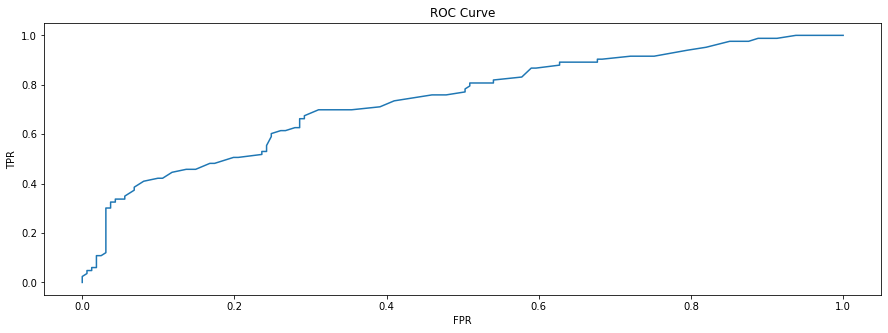

In [262]:
fpr, tpr, threshold = roc_curve(y_test, probability)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [263]:
roc_auc_score(y_test, probability)*100

73.74092643867395

### Deploying the Model

In [264]:
# joblib.dump(model_nf , 'deployment.pkl')

In [265]:
input_data = (2,5,0.8,4.5,78,2.5,5.3,6.96,98,105,454,45.23,23.87,89.00,789.56,12.3,15,0.01)
input_data_as_numpy_array = np.asarray(input_data)   # Conversion of Data into Numpy array

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) # Reshaping the array as we are predicting for one instance
prediction = model_nf.predict(input_data_reshaped)
print(prediction)

if (prediction) == 0:
    print('NO epitope is present')
else:
    print('Yes epitope is present')

[1]
Yes epitope is present


In [266]:
import pickle

In [267]:
filename = 'epitope_model.sav'

In [268]:
pickle.dump(model_nf, open(filename, 'wb' ))

In [269]:
loaded_model = pickle.load(open('epitope_model.sav', 'rb'))  # loading the saved model

### K-Fold Cross Validation

In [270]:
from sklearn.model_selection import cross_val_score
k_fold = cross_val_score(model_nf, X, y, cv=5, scoring='accuracy')

In [271]:
kfold = KFold(n_splits=950)
# create the sub models
estimators = []
model_nf = RandomForestClassifier()
estimators.append(('Random Forest', model_nf))
DTmodel = DecisionTreeClassifier()
estimators.append(('Decision Tree', DTmodel))
XGmodel = XGBClassifier()
estimators.append(('XG Boost', XGmodel))
SVCmodel = SVC()
estimators.append(('SVM', SVCmodel))
ANNmodel = MLPClassifier()
estimators.append(('ANN', ANNmodel))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.7963157894736842


- As we can see thaty we are getting mean accuracy of 79.63%.

In [272]:
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('Random Forest', RandomForestClassifier()),
                             ('Decision Tree', DecisionTreeClassifier()),
                             ('XG Boost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None, gamma=None,
                                            gpu_id=None, grow_poli...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None, ...)),
                             ('SVM', SVC()), ('ANN', MLPClassifier())])

In [273]:
y_predict = ensemble.predict(X_test)

In [274]:
ensembl_accuracy = accuracy_score(y_test, y_predict)
print(ensembl_accuracy)

0.7418032786885246


In [275]:
pd.crosstab(y_test, y_predict)

col_0    0   1
Class         
0      145  16
1       47  36

In [276]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       161
           1       0.69      0.43      0.53        83

    accuracy                           0.74       244
   macro avg       0.72      0.67      0.68       244
weighted avg       0.73      0.74      0.72       244



## Plotting different model accuracy

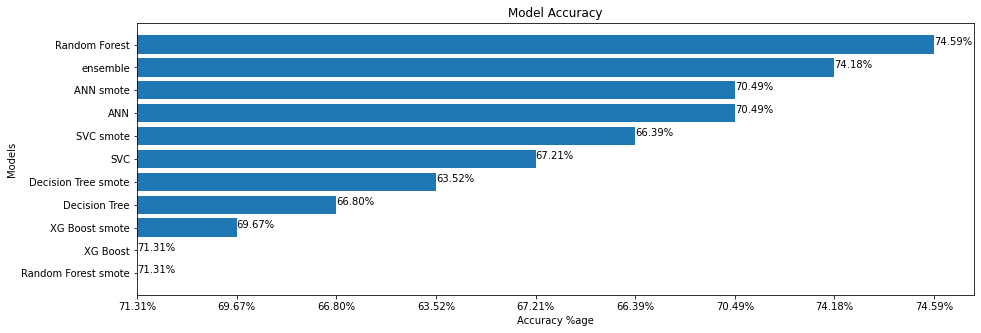

In [277]:
x = ['Random Forest smote', 'XG Boost', 'XG Boost smote', 'Decision Tree', 'Decision Tree smote', 'SVC', 'SVC smote', 'ANN', 'ANN smote', 'ensemble','Random Forest']
y = [ RFaccuracy_smote, XGaccuracy, XGaccuracy_smote, DTaccuracy, DTaccuracy_smote, SVCaccuracy, SVCaccuracy_smote, ANNaccuracy, ANNaccuracy_smote, ensembl_accuracy, RFaccuracy_nf]
z = [f'{i*100:.2f}%' for i in y]
plt.barh(x,z)
plt.title('Model Accuracy')
plt.ylabel("Models")
plt.xlabel("Accuracy %age")

for index, value in enumerate(z):
    plt.text(value, index, str(value))
plt.show()